In [1]:
import pandas as pd

import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

import re

​

df=pd.read_csv("~/Downloads/summary.csv",sep=",")

​

sns.set(style="whitegrid")

df["name"]

df.keys()

Index(['name', 'JHparams', 'lenA', 'lenB', 'msa', 'msaA', 'msaB', 'dockQ',
       'fnat', 'iRMS', 'LRMS', 'fnonnat', 'mm', 'tmA', 'tmB', 'long', 'med',
       'longPPV', 'medPPV', 'longA', 'medA', 'longPPVA', 'medPPVA', 'longB',
       'medB', 'longPPVB', 'medPPVB', 'auc', 'evalue', 'seqid', 'rank'],
      dtype='object')

​

df["code"]=df["name"].str[:4]

df["CODE"]=df["code"]

df["params"]=df["JHparams"]

r=re.compile("^PDB|^pdb|^TMd|gramm")

datasets=df.JHparams.unique()

notRosettaset=list(filter(r.match, datasets))

df2=df.loc[~df.JHparams.isin(notRosettaset)].copy()

df2.JHparams="trRosetta"

df2.params="trRosetta"

df2

	name 	JHparams 	lenA 	lenB 	msa 	msaA 	msaB 	dockQ 	fnat 	iRMS 	... 	medB 	longPPVB 	medPPVB 	auc 	evalue 	seqid 	rank 	code 	CODE 	params
0 	1ay7_u1_A-1ay7_u2_A 	trRosetta 	97 	90 	1060.0 	1485 	2034 	0.298 	0.222 	3.561 	... 	116 	0.985 	0.966 	0.40 	9999.0 	0.000 	1 	1ay7 	1ay7 	trRosetta
1 	1ay7_u2_A-1ay7_u1_A 	trRosetta 	90 	97 	1060.0 	2034 	1485 	0.254 	0.278 	4.395 	... 	150 	0.960 	0.987 	0.36 	9999.0 	0.000 	2 	1ay7 	1ay7 	trRosetta
2 	1b27_u1_A-1b27_u2_A 	trRosetta 	109 	90 	733.0 	1484 	2034 	0.223 	0.120 	4.508 	... 	113 	0.992 	0.965 	0.46 	4.3 	50.000 	1 	1b27 	1b27 	trRosetta
3 	1b27_u2_A-1b27_u1_A 	trRosetta 	90 	109 	733.0 	2034 	1484 	0.231 	0.160 	4.840 	... 	154 	0.971 	0.981 	0.46 	4.3 	50.000 	2 	1b27 	1b27 	trRosetta
4 	1bdj_u1_A-1bdj_u2_A 	trRosetta 	129 	118 	5651.0 	349880 	23051 	0.000 	0.000 	211.527 	... 	92 	0.996 	1.000 	0.00 	9999.0 	0.000 	1 	1bdj 	1bdj 	trRosetta
... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	...
9026 	4y5o_u1_A-4y5o_u2_A 	trRosetta 	94 	85 	34.0 	0. 	0. 	0.055 	0.000 	11.394 	... 	41 	0.972 	0.951 	0.00 	9999.0 	0.000 	1 	4y5o 	4y5o 	trRosetta
9027 	4zfr_u1_A-4zfr_u2_A 	trRosetta 	186 	77 	12.0 	0. 	0. 	0.048 	0.000 	14.464 	... 	37 	0.846 	0.946 	0.09 	9999.0 	0.000 	1 	4zfr 	4zfr 	trRosetta
9028 	5brr_u1_A-5brr_u2_A 	trRosetta 	378 	266 	107.0 	0. 	0. 	0.009 	0.000 	18.458 	... 	306 	0.995 	1.000 	0.00 	236.0 	66.667 	1 	5brr 	5brr 	trRosetta
9029 	5cec_u1_A-5cec_u2_A 	trRosetta 	403 	191 	7.0 	0. 	0. 	0.011 	0.000 	20.074 	... 	109 	0.737 	0.367 	0.00 	197.0 	33.333 	1 	5cec 	5cec 	trRosetta
9030 	5eg3_u1_A-5eg3_u2_A 	trRosetta 	303 	105 	7.0 	0. 	0. 	0.003 	0.000 	39.956 	... 	29 	0.858 	0.862 	0.00 	68.0 	40.000 	1 	5eg3 	5eg3 	trRosetta

3808 rows × 34 columns

df=pd.concat([df,df2], ignore_index=True,sort=False)

df.fillna(0)

df.JHparams.unique()

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       'N3-newdockA', 'N3-newdockB', 'N3-newdockC', 'N5-newdockA',
       'N5-newdockB', 'N5-newdockC', '-N 5 --cpu 8',
       'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3',
       'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard',
       'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1',
       'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1',
       'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax',
       'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2',
       'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1',
       'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax',
       'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B',
       'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2',
       'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1',
       'PDBNEWDOCK-B--dockC2', 'PDBNEWDOCK-B--dockC-relax',
       'PDBNEWDOCK-B--dockD1', 'PDBNEWDOCK-B--dockD2',
       'PDBNEWDOCK-B--dockD-relax', 'PDBNEWDOCK-B--starting',
       'PDBNEWDOCK-B--step1', 'PDBNEWDOCK-C', 'PDBNEWDOCK-C--dockB1',
       'PDBNEWDOCK-C--dockB2', 'PDBNEWDOCK-C--dockB-relax',
       'PDBNEWDOCK-C--dockC1', 'PDBNEWDOCK-C--dockC2',
       'PDBNEWDOCK-C--dockC-relax', 'PDBNEWDOCK-C--dockD1',
       'PDBNEWDOCK-C--dockD2', 'PDBNEWDOCK-C--dockD-relax',
       'PDBNEWDOCK-C--starting', 'PDBNEWDOCK-C--step1', 'PDBNEWDOCK-D',
       'PDBNEWDOCK-D--dockB1', 'PDBNEWDOCK-D--dockB2',
       'PDBNEWDOCK-D--dockB-relax', 'PDBNEWDOCK-D--dockC1',
       'PDBNEWDOCK-D--dockC2', 'PDBNEWDOCK-D--dockC-relax',
       'PDBNEWDOCK-D--dockD1', 'PDBNEWDOCK-D--dockD2',
       'PDBNEWDOCK-D--dockD-relax', 'PDBNEWDOCK-D--starting',
       'PDBNEWDOCK-D--step1', 'PDBNEWDOCK-repulsion',
       'PDBNEWDOCK-repulsion--starting', 'PDBNEWDOCK-repulsion--step1',
       'pdbsurface', 'rbh-jh', 'rbh-merged-pdb', 'rbh',
       'TMdock-nohomology-1.e-5', 'TMdock-double', 'TMdock-nohomology',
       'TMdock', 'trRosetta'], dtype=object)

​

r=re.compile("^PDB|^pdb")

datasets=df.JHparams.unique()

pdbset=list(filter(r.match, datasets))

df2=df.loc[df.JHparams.isin(pdbset)].copy()

df2.JHparams="PDB"

df2.params="PDB"

df2

	name 	JHparams 	lenA 	lenB 	msa 	msaA 	msaB 	dockQ 	fnat 	iRMS 	... 	medB 	longPPVB 	medPPVB 	auc 	evalue 	seqid 	rank 	code 	CODE 	params
5389 	1bdj_u1_A-1bdj_u2_A 	PDB 	129 	118 	5651.0 	0. 	0. 	0.827 	0.765 	0.902 	... 	0 	0.0 	0.0 	0.01 	9999.0 	0.000 	1 	1bdj 	1bdj 	PDB
5390 	1bdj_u2_A-1bdj_u1_A 	PDB 	118 	129 	5651.0 	0. 	0. 	0.140 	0.353 	11.440 	... 	0 	0.0 	0.0 	0.07 	9999.0 	0.000 	2 	1bdj 	1bdj 	PDB
5391 	1ewy_u1_A-1ewy_u2_A 	PDB 	304 	99 	4396.0 	0. 	0. 	0.608 	0.562 	2.140 	... 	0 	0.0 	0.0 	0.09 	20.0 	75.000 	1 	1ewy 	1ewy 	PDB
5392 	1ewy_u2_A-1ewy_u1_A 	PDB 	99 	304 	4396.0 	0. 	0. 	0.681 	0.750 	2.133 	... 	0 	0.0 	0.0 	0.04 	20.0 	75.000 	2 	1ewy 	1ewy 	PDB
5393 	1jtd_u1_A-1jtd_u2_A 	PDB 	270 	264 	176.0 	0. 	0. 	0.522 	0.397 	2.496 	... 	0 	0.0 	0.0 	0.04 	132.0 	66.667 	1 	1jtd 	1jtd 	PDB
... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	...
8427 	4gmj_u1_A-4gmj_u2_A 	PDB 	253 	236 	1189.0 	0. 	0. 	0.051 	0.122 	11.126 	... 	0 	0.0 	0.0 	0.00 	114.0 	50.000 	1 	4gmj 	4gmj 	PDB
8428 	4llo_u1_A-4llo_u2_A 	PDB 	147 	115 	6332.0 	0. 	0. 	0.081 	0.040 	10.485 	... 	0 	0.0 	0.0 	0.10 	41.0 	66.667 	1 	4llo 	4llo 	PDB
8429 	4llo_u2_A-4llo_u1_A 	PDB 	115 	147 	6332.0 	0. 	0. 	0.099 	0.200 	10.138 	... 	0 	0.0 	0.0 	0.01 	41.0 	66.667 	2 	4llo 	4llo 	PDB
8430 	5brr_u1_A-5brr_u2_A 	PDB 	378 	266 	611.0 	0. 	0. 	0.002 	0.000 	19.466 	... 	0 	0.0 	0.0 	0.05 	236.0 	66.667 	1 	5brr 	5brr 	PDB
8431 	5brr_u2_A-5brr_u1_A 	PDB 	266 	378 	593.0 	0. 	0. 	0.031 	0.055 	8.444 	... 	0 	0.0 	0.0 	0.02 	222.0 	66.667 	2 	5brr 	5brr 	PDB

3043 rows × 34 columns

df=pd.concat([df,df2], ignore_index=True,sort=False)

df.fillna(0)

df.JHparams.unique()

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       'N3-newdockA', 'N3-newdockB', 'N3-newdockC', 'N5-newdockA',
       'N5-newdockB', 'N5-newdockC', '-N 5 --cpu 8',
       'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3',
       'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard',
       'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1',
       'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1',
       'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax',
       'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2',
       'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1',
       'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax',
       'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B',
       'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2',
       'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1',
       'PDBNEWDOCK-B--dockC2', 'PDBNEWDOCK-B--dockC-relax',
       'PDBNEWDOCK-B--dockD1', 'PDBNEWDOCK-B--dockD2',
       'PDBNEWDOCK-B--dockD-relax', 'PDBNEWDOCK-B--starting',
       'PDBNEWDOCK-B--step1', 'PDBNEWDOCK-C', 'PDBNEWDOCK-C--dockB1',
       'PDBNEWDOCK-C--dockB2', 'PDBNEWDOCK-C--dockB-relax',
       'PDBNEWDOCK-C--dockC1', 'PDBNEWDOCK-C--dockC2',
       'PDBNEWDOCK-C--dockC-relax', 'PDBNEWDOCK-C--dockD1',
       'PDBNEWDOCK-C--dockD2', 'PDBNEWDOCK-C--dockD-relax',
       'PDBNEWDOCK-C--starting', 'PDBNEWDOCK-C--step1', 'PDBNEWDOCK-D',
       'PDBNEWDOCK-D--dockB1', 'PDBNEWDOCK-D--dockB2',
       'PDBNEWDOCK-D--dockB-relax', 'PDBNEWDOCK-D--dockC1',
       'PDBNEWDOCK-D--dockC2', 'PDBNEWDOCK-D--dockC-relax',
       'PDBNEWDOCK-D--dockD1', 'PDBNEWDOCK-D--dockD2',
       'PDBNEWDOCK-D--dockD-relax', 'PDBNEWDOCK-D--starting',
       'PDBNEWDOCK-D--step1', 'PDBNEWDOCK-repulsion',
       'PDBNEWDOCK-repulsion--starting', 'PDBNEWDOCK-repulsion--step1',
       'pdbsurface', 'rbh-jh', 'rbh-merged-pdb', 'rbh',
       'TMdock-nohomology-1.e-5', 'TMdock-double', 'TMdock-nohomology',
       'TMdock', 'trRosetta', 'PDB'], dtype=object)

# Divide data into datasets

​

​

df["tmAB"]=df[["tmA","tmB"]].mean(axis=1)

df["msaAB"]=df[["msaA","msaB"]].mean(axis=1)

df["tmAB_max"]=df[["tmA","tmB"]].max(axis=1)

df["msaAB_max"]=df[["msaA","msaB"]].max(axis=1)

df["tmAB_min"]=df[["tmA","tmB"]].min(axis=1)

df["msaAB_min"]=df[["msaA","msaB"]].min(axis=1)

df["numcorrect"]=df["longPPV"]*df["long"]

df["len"]=df["lenA"]+df["lenB"]

​

codes=df.code.unique()

df_mean=df.groupby(["JHparams","code"]).mean()

df_max=df.groupby(["JHparams","code"]).max()

df_min=df.groupby(["JHparams","code"]).min()

df_first=df.loc[df["rank"]==1]

df

​

	name 	JHparams 	lenA 	lenB 	msa 	msaA 	msaB 	dockQ 	fnat 	iRMS 	... 	CODE 	params 	tmAB 	msaAB 	tmAB_max 	msaAB_max 	tmAB_min 	msaAB_min 	numcorrect 	len
0 	1ay7_u1_A-1ay7_u2_A 	-N 3 --cpu 8 	97 	90 	1060.0 	1485 	2034 	0.298 	0.222 	3.561 	... 	1ay7 	-N 3 --cpu 8 	0.828190 	NaN 	0.84625 	2034 	0.81013 	1485 	53.985 	187
1 	1ay7_u2_A-1ay7_u1_A 	-N 3 --cpu 8 	90 	97 	1060.0 	2034 	1485 	0.254 	0.278 	4.395 	... 	1ay7 	-N 3 --cpu 8 	0.816405 	NaN 	0.84123 	2034 	0.79158 	1485 	43.992 	187
2 	1b27_u1_A-1b27_u2_A 	-N 3 --cpu 8 	109 	90 	733.0 	1484 	2034 	0.223 	0.120 	4.508 	... 	1b27 	-N 3 --cpu 8 	0.824750 	NaN 	0.85428 	2034 	0.79522 	1484 	49.025 	199
3 	1b27_u2_A-1b27_u1_A 	-N 3 --cpu 8 	90 	109 	733.0 	2034 	1484 	0.231 	0.160 	4.840 	... 	1b27 	-N 3 --cpu 8 	0.805310 	NaN 	0.82261 	2034 	0.78801 	1484 	46.020 	199
4 	1bdj_u1_A-1bdj_u2_A 	-N 3 --cpu 8 	129 	118 	5651.0 	349880 	23051 	0.000 	0.000 	211.527 	... 	1bdj 	-N 3 --cpu 8 	0.861435 	NaN 	0.92240 	349880 	0.80047 	23051 	0.000 	247
... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	...
24567 	4gmj_u1_A-4gmj_u2_A 	PDB 	253 	236 	1189.0 	0. 	0. 	0.051 	0.122 	11.126 	... 	4gmj 	PDB 	0.752945 	NaN 	0.89929 	0. 	0.60660 	0. 	0.000 	489
24568 	4llo_u1_A-4llo_u2_A 	PDB 	147 	115 	6332.0 	0. 	0. 	0.081 	0.040 	10.485 	... 	4llo 	PDB 	0.837265 	NaN 	0.86694 	0. 	0.80759 	0. 	0.000 	262
24569 	4llo_u2_A-4llo_u1_A 	PDB 	115 	147 	6332.0 	0. 	0. 	0.099 	0.200 	10.138 	... 	4llo 	PDB 	0.881585 	NaN 	0.92784 	0. 	0.83533 	0. 	0.000 	262
24570 	5brr_u1_A-5brr_u2_A 	PDB 	378 	266 	611.0 	0. 	0. 	0.002 	0.000 	19.466 	... 	5brr 	PDB 	0.246995 	NaN 	0.39490 	0. 	0.09909 	0. 	0.000 	644
24571 	5brr_u2_A-5brr_u1_A 	PDB 	266 	378 	593.0 	0. 	0. 	0.031 	0.055 	8.444 	... 	5brr 	PDB 	0.621840 	NaN 	0.95261 	0. 	0.29107 	0. 	0.000 	644

24572 rows × 42 columns

datasets=df.JHparams.unique()

data_mean={}

data_max={}

data_min={}

for d in datasets:

    data_mean[d]=df.loc[df.JHparams==d].groupby(["code"]).mean()

    data_max[d]=df.loc[df.JHparams==d].groupby(["code"]).max()

    data_min[d]=df.loc[df.JHparams==d].groupby(["code"]).min()

​

df.loc[ (df.JHparams=="trRosetta")  & (df["rank"]==1)]

	name 	JHparams 	lenA 	lenB 	msa 	msaA 	msaB 	dockQ 	fnat 	iRMS 	... 	CODE 	params 	tmAB 	msaAB 	tmAB_max 	msaAB_max 	tmAB_min 	msaAB_min 	numcorrect 	len
17721 	1ay7_u1_A-1ay7_u2_A 	trRosetta 	97 	90 	1060.0 	1485 	2034 	0.298 	0.222 	3.561 	... 	1ay7 	trRosetta 	0.828190 	NaN 	0.84625 	2034 	0.81013 	1485 	53.985 	187
17723 	1b27_u1_A-1b27_u2_A 	trRosetta 	109 	90 	733.0 	1484 	2034 	0.223 	0.120 	4.508 	... 	1b27 	trRosetta 	0.824750 	NaN 	0.85428 	2034 	0.79522 	1484 	49.025 	199
17725 	1bdj_u1_A-1bdj_u2_A 	trRosetta 	129 	118 	5651.0 	349880 	23051 	0.000 	0.000 	211.527 	... 	1bdj 	trRosetta 	0.861435 	NaN 	0.92240 	349880 	0.80047 	23051 	0.000 	247
17727 	1buh_u1_A-1buh_u2_A 	trRosetta 	291 	72 	1177.0 	555226 	1820 	0.000 	0.000 	523.917 	... 	1buh 	trRosetta 	0.560760 	NaN 	0.73259 	555226 	0.38893 	1820 	0.000 	363
17729 	1bvn_u1_A-1bvn_u2_A 	trRosetta 	496 	75 	95.0 	52623 	123 	0.006 	0.000 	27.357 	... 	1bvn 	trRosetta 	0.619740 	NaN 	0.70905 	52623 	0.53043 	123 	0.000 	571
... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	...
21524 	4y5o_u1_A-4y5o_u2_A 	trRosetta 	94 	85 	34.0 	0. 	0. 	0.055 	0.000 	11.394 	... 	4y5o 	trRosetta 	0.568465 	NaN 	0.71099 	0. 	0.42594 	0. 	0.000 	179
21525 	4zfr_u1_A-4zfr_u2_A 	trRosetta 	186 	77 	12.0 	0. 	0. 	0.048 	0.000 	14.464 	... 	4zfr 	trRosetta 	0.505235 	NaN 	0.64391 	0. 	0.36656 	0. 	3.000 	263
21526 	5brr_u1_A-5brr_u2_A 	trRosetta 	378 	266 	107.0 	0. 	0. 	0.009 	0.000 	18.458 	... 	5brr 	trRosetta 	0.332210 	NaN 	0.38444 	0. 	0.27998 	0. 	468.000 	644
21527 	5cec_u1_A-5cec_u2_A 	trRosetta 	403 	191 	7.0 	0. 	0. 	0.011 	0.000 	20.074 	... 	5cec 	trRosetta 	0.508770 	NaN 	0.70983 	0. 	0.30771 	0. 	2.006 	594
21528 	5eg3_u1_A-5eg3_u2_A 	trRosetta 	303 	105 	7.0 	0. 	0. 	0.003 	0.000 	39.956 	... 	5eg3 	trRosetta 	0.358330 	NaN 	0.41599 	0. 	0.30067 	0. 	0.000 	408

1863 rows × 42 columns

df.JHparams.unique()

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       'N3-newdockA', 'N3-newdockB', 'N3-newdockC', 'N5-newdockA',
       'N5-newdockB', 'N5-newdockC', '-N 5 --cpu 8',
       'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3',
       'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard',
       'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1',
       'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1',
       'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax',
       'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2',
       'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1',
       'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax',
       'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B',
       'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2',
       'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1',
       'PDBNEWDOCK-B--dockC2', 'PDBNEWDOCK-B--dockC-relax',
       'PDBNEWDOCK-B--dockD1', 'PDBNEWDOCK-B--dockD2',
       'PDBNEWDOCK-B--dockD-relax', 'PDBNEWDOCK-B--starting',
       'PDBNEWDOCK-B--step1', 'PDBNEWDOCK-C', 'PDBNEWDOCK-C--dockB1',
       'PDBNEWDOCK-C--dockB2', 'PDBNEWDOCK-C--dockB-relax',
       'PDBNEWDOCK-C--dockC1', 'PDBNEWDOCK-C--dockC2',
       'PDBNEWDOCK-C--dockC-relax', 'PDBNEWDOCK-C--dockD1',
       'PDBNEWDOCK-C--dockD2', 'PDBNEWDOCK-C--dockD-relax',
       'PDBNEWDOCK-C--starting', 'PDBNEWDOCK-C--step1', 'PDBNEWDOCK-D',
       'PDBNEWDOCK-D--dockB1', 'PDBNEWDOCK-D--dockB2',
       'PDBNEWDOCK-D--dockB-relax', 'PDBNEWDOCK-D--dockC1',
       'PDBNEWDOCK-D--dockC2', 'PDBNEWDOCK-D--dockC-relax',
       'PDBNEWDOCK-D--dockD1', 'PDBNEWDOCK-D--dockD2',
       'PDBNEWDOCK-D--dockD-relax', 'PDBNEWDOCK-D--starting',
       'PDBNEWDOCK-D--step1', 'PDBNEWDOCK-repulsion',
       'PDBNEWDOCK-repulsion--starting', 'PDBNEWDOCK-repulsion--step1',
       'pdbsurface', 'rbh-jh', 'rbh-merged-pdb', 'rbh',
       'TMdock-nohomology-1.e-5', 'TMdock-double', 'TMdock-nohomology',
       'TMdock', 'trRosetta', 'PDB'], dtype=object)

data_first={}

data_second={}

for d in datasets:

    data_first[d]=df.loc[ (df["JHparams"]==d)  & (df["rank"]==1)]

    data_second[d]=df.loc[ (df["JHparams"]==d)  & (df["rank"]==2)]

data_first[datasets[1]]

	name 	JHparams 	lenA 	lenB 	msa 	msaA 	msaB 	dockQ 	fnat 	iRMS 	... 	CODE 	params 	tmAB 	msaAB 	tmAB_max 	msaAB_max 	tmAB_min 	msaAB_min 	numcorrect 	len
436 	1ay7_u1_A-1ay7_u2_A 	confold 	97 	90 	1060.0 	1485 	2034 	0.337 	0.500 	4.038 	... 	1ay7 	confold 	0.596110 	NaN 	0.63915 	2034 	0.55307 	1485 	53.985 	187
441 	1b27_u1_A-1b27_u2_A 	confold 	109 	90 	733.0 	1484 	2034 	0.056 	0.040 	10.498 	... 	1b27 	confold 	0.450565 	NaN 	0.60440 	2034 	0.29673 	1484 	49.025 	199
446 	1bvn_u1_A-1bvn_u2_A 	confold 	496 	75 	95.0 	52623 	123 	0.010 	0.000 	18.578 	... 	1bvn 	confold 	0.313675 	NaN 	0.33139 	52623 	0.29596 	123 	0.000 	571
451 	1dfj_u1_A-1dfj_u2_A 	confold 	457 	125 	4.0 	377296 	1273 	0.016 	0.011 	20.677 	... 	1dfj 	confold 	0.302560 	NaN 	0.34193 	377296 	0.26319 	1273 	0.000 	582
456 	1gcq_u1_A-1gcq_u2_A 	confold 	66 	57 	1365.0 	77497 	77704 	0.022 	0.000 	10.381 	... 	1gcq 	confold 	0.283870 	NaN 	0.28721 	77704 	0.28053 	77497 	71.760 	123
... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	...
826 	4txv_u1_A-4txv_u2_A 	confold 	177 	139 	4953.0 	120607 	10071 	0.010 	0.000 	18.057 	... 	4txv 	confold 	0.572305 	NaN 	0.59428 	120607 	0.55033 	10071 	0.000 	316
831 	4xhu_u1_A-4xhu_u2_A 	confold 	352 	95 	410.0 	8381 	307 	0.020 	0.000 	16.234 	... 	4xhu 	confold 	0.361400 	NaN 	0.47265 	8381 	0.25015 	307 	0.000 	447
836 	4xkl_u1_A-4xkl_u2_A 	confold 	76 	34 	1262.0 	37951 	761 	0.022 	0.000 	12.861 	... 	4xkl 	confold 	0.356220 	NaN 	0.51666 	761 	0.19578 	37951 	0.000 	110
841 	4xs0_u1_A-4xs0_u2_A 	confold 	147 	141 	3395.0 	8885 	8771 	0.098 	0.222 	15.277 	... 	4xs0 	confold 	0.638185 	NaN 	0.64247 	8885 	0.63390 	8771 	224.928 	288
846 	5brr_u1_A-5brr_u2_A 	confold 	378 	266 	611.0 	13553 	45450 	0.010 	0.000 	15.986 	... 	5brr 	confold 	0.389945 	NaN 	0.47396 	45450 	0.30593 	13553 	2.000 	644

83 rows × 42 columns

datasets

​

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       'N3-newdockA', 'N3-newdockB', 'N3-newdockC', 'N5-newdockA',
       'N5-newdockB', 'N5-newdockC', '-N 5 --cpu 8',
       'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3',
       'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard',
       'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1',
       'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1',
       'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax',
       'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2',
       'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1',
       'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax',
       'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B',
       'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2',
       'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1',
       'PDBNEWDOCK-B--dockC2', 'PDBNEWDOCK-B--dockC-relax',
       'PDBNEWDOCK-B--dockD1', 'PDBNEWDOCK-B--dockD2',
       'PDBNEWDOCK-B--dockD-relax', 'PDBNEWDOCK-B--starting',
       'PDBNEWDOCK-B--step1', 'PDBNEWDOCK-C', 'PDBNEWDOCK-C--dockB1',
       'PDBNEWDOCK-C--dockB2', 'PDBNEWDOCK-C--dockB-relax',
       'PDBNEWDOCK-C--dockC1', 'PDBNEWDOCK-C--dockC2',
       'PDBNEWDOCK-C--dockC-relax', 'PDBNEWDOCK-C--dockD1',
       'PDBNEWDOCK-C--dockD2', 'PDBNEWDOCK-C--dockD-relax',
       'PDBNEWDOCK-C--starting', 'PDBNEWDOCK-C--step1', 'PDBNEWDOCK-D',
       'PDBNEWDOCK-D--dockB1', 'PDBNEWDOCK-D--dockB2',
       'PDBNEWDOCK-D--dockB-relax', 'PDBNEWDOCK-D--dockC1',
       'PDBNEWDOCK-D--dockC2', 'PDBNEWDOCK-D--dockC-relax',
       'PDBNEWDOCK-D--dockD1', 'PDBNEWDOCK-D--dockD2',
       'PDBNEWDOCK-D--dockD-relax', 'PDBNEWDOCK-D--starting',
       'PDBNEWDOCK-D--step1', 'PDBNEWDOCK-repulsion',
       'PDBNEWDOCK-repulsion--starting', 'PDBNEWDOCK-repulsion--step1',
       'pdbsurface', 'rbh-jh', 'rbh-merged-pdb', 'rbh',
       'TMdock-nohomology-1.e-5', 'TMdock-double', 'TMdock-nohomology',
       'TMdock', 'trRosetta', 'PDB'], dtype=object)

df_merged = pd.merge(data_first[datasets[0]],data_first[d], on=['code'],how="inner")

df_max

		name 	lenA 	lenB 	msa 	msaA 	msaB 	dockQ 	fnat 	iRMS 	LRMS 	... 	CODE 	params 	tmAB 	msaAB 	tmAB_max 	msaAB_max 	tmAB_min 	msaAB_min 	numcorrect 	len
JHparams 	code 																					
-N 1 -E 1.e-10 --cpu 8 	1ay7 	1ay7_u2_A-1ay7_u1_A 	97 	97 	2.0 	960 	960 	0.044 	0.083 	15.615 	44.621 	... 	1ay7 	-N 1 -E 1.e-10 --cpu 8 	0.468725 	NaN 	0.56969 	960 	0.36776 	46 	0.000 	187
1b27 	1b27_u2_A-1b27_u1_A 	109 	109 	35.0 	44 	44 	0.008 	0.000 	99.396 	197.381 	... 	1b27 	-N 1 -E 1.e-10 --cpu 8 	0.662735 	NaN 	0.66638 	44 	0.65909 	272 	0.000 	199
1bdj 	1bdj_u2_A-1bdj_u1_A 	129 	129 	201.0 	29395 	29395 	0.024 	0.000 	17.785 	35.086 	... 	1bdj 	-N 1 -E 1.e-10 --cpu 8 	0.824210 	NaN 	0.84941 	29395 	0.79901 	235 	0.000 	247
1buh 	1buh_u2_A-1buh_u1_A 	291 	291 	899.0 	255874 	255874 	0.061 	0.000 	491.316 	982.230 	... 	1buh 	-N 1 -E 1.e-10 --cpu 8 	0.650535 	NaN 	0.72158 	255874 	0.58000 	1676 	0.000 	363
1bvn 	1bvn_u2_A-1bvn_u1_A 	496 	496 	7.0 	6 	6 	0.038 	0.000 	19.311 	40.949 	... 	1bvn 	-N 1 -E 1.e-10 --cpu 8 	0.313205 	NaN 	0.33372 	6 	0.29684 	2041 	0.000 	571
... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	...
trRosetta 	4zfr 	4zfr_u2_A-4zfr_u1_A 	186 	186 	1358.0 	9290 	9290 	0.048 	0.000 	291.376 	659.927 	... 	4zfr 	trRosetta 	0.862735 	NaN 	0.90969 	9290 	0.81578 	38386 	3.000 	263
5brr 	5brr_u2_A-5brr_u1_A 	378 	378 	611.0 	45636 	45636 	0.035 	0.073 	642.702 	1343.860 	... 	5brr 	trRosetta 	0.848585 	NaN 	0.97832 	45636 	0.84460 	196 	468.000 	644
5cec 	5cec_u2_A-5cec_u1_A 	403 	403 	1594.0 	59695 	59695 	0.050 	0.075 	732.223 	1486.764 	... 	5cec 	trRosetta 	0.782885 	NaN 	0.86787 	59695 	0.71169 	312612 	2.006 	594
5cra 	5cra_u2_A-5cra_u1_A 	193 	193 	1.0 	42026 	42026 	0.103 	0.000 	22.323 	60.172 	... 	5cra 	trRosetta 	0.684675 	NaN 	0.91652 	42026 	0.45283 	11 	3.003 	270
5eg3 	5eg3_u2_A-5eg3_u1_A 	303 	303 	499.0 	565997 	565997 	0.016 	0.000 	542.531 	1105.630 	... 	5eg3 	trRosetta 	0.833605 	NaN 	0.86145 	565997 	0.80576 	26558 	0.000 	408

6150 rows × 40 columns

​

plt.scatter(df.dockQ,df.mm)

​

<matplotlib.collections.PathCollection at 0x7f53401fc970>

cutoff=0.2

f, ax = plt.subplots(figsize=(6.5, 6.5))

for d in datasets:

    if d == datasets[0]: continue

    if d=="gramm":continue   

    if d[0:3]=="PDB":continue   

    if d[0:3]=="pdb":continue   

    if d[0:3]=="TMd":continue   

    if d=="trRosetta":continue   

    #if d=="confold":continue   

    #if d=="rbh-merged-pdb":continue   

​

    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="outer")

    #print (df_merged)

    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]

    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)

    for i, txt in enumerate(df_merged.name_x):

        #print (i,txt)

        try: 

            sstr=txt[0:4] # +d

        except:

            sstr=df_merged.name_y[i][0:4] #+d

        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):

            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))

x=[0,0.1]

y=[0,0.1]

plt.plot(x,y)

ax.legend()

ax.set_title("DockQ scores best model ")

ax.set_xlabel("dockQ "+str(datasets[0]))

ax.set_ylabel("dockQ")

​

#cat.add_categories([1])

#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

cutoff=5

f, ax = plt.subplots(figsize=(6.5, 6.5))

for d in datasets:

    if d == datasets[0]: continue

    if d=="gramm":continue   

    if d=="trRosetta":continue 

    if d[0:3]=="PDB":continue   

    if d[0:3]=="pdb":continue   

    if d[0:3]=="TMd":continue   

        

    #if d=="confold":continue   

    #if d=="rbh-merged-pdb":continue   

​

    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="outer")

    #print (df_merged)

    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]

    plt.scatter(df_merged.numcorrect_x,df_merged.numcorrect_y,label=d)

    for i, txt in enumerate(df_merged.name_x):

        #print (i,txt)

        try: 

            sstr=txt[0:4]

        except:

            sstr=df_merged.name_y[i][0:4]

        if (df_merged.numcorrect_x[i]> cutoff or df_merged.numcorrect_y[i]>cutoff):

            ax.annotate(sstr, (df_merged.numcorrect_x[i], df_merged.numcorrect_y[i]))

x=[0,50]

y=[0,50]

plt.plot(x,y)

ax.legend()

ax.set_title("numcorrect scores best model ")

ax.set_xlabel("numcorrect "+str(datasets[0]))

ax.set_ylabel("numcorrect")

​

#cat.add_categories([1])

#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'numcorrect')

cutoff=0.2

f, ax = plt.subplots(figsize=(6.5, 6.5))

for d in datasets:

    if d == datasets[0]: continue

    if d=="gramm":continue   

    if d=="trRosetta":continue   

    if d=="confold":continue   

    #if d=="rbh-merged-pdb":continue   

    if d[0:3]=="PDB":continue   

    if d[0:3]=="pdb":continue   

    if d[0:3]=="TMd":continue   

    #if d!="N1-merged":continue   

    #print (d)

    df_merged = pd.merge(data_first[datasets[0]],data_first[d], on=['code'],how="outer")

    #print (df_merged)

    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]

    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)

    for i, txt in enumerate(df_merged.name_x):

        #print (i,txt)

        try: 

            sstr=txt[0:4]

        except:

            sstr=df_merged.name_y[i][0:4]

        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):

            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))

x=[0,0.3]

y=[0,0.3]

plt.plot(x,y)

ax.legend()

ax.set_title("DockQ scores (first ranked)  ")

ax.set_xlabel("dockQ "+str(datasets[0]))

ax.set_ylabel("dockQ")

​

#cat.add_categories([1])

#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

cutoff=0.1

f, ax = plt.subplots(figsize=(6.5, 6.5))

for d in datasets:

    if d == datasets[0]: continue

    if d=="gramm":continue   

    if d=="trRosetta":continue   

    if d=="rbh merge pdb ":continue   

    if d[0:3]=="PDB":continue   

    if d[0:3]=="pdb":continue   

    if d[0:3]=="TMd":continue   

        

    #if d!="N1-merged":continue   

    #print (d)

    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="outer")

    #print (df_merged)

    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]

    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)

    for i, txt in enumerate(df_merged.name_x):

        #print (i,txt)

        try: 

            sstr=txt[0:4]

        except:

            sstr=df_merged.name_y[i][0:4]

        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):

            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))

x=[0,0.3]

y=[0,0.3]

plt.plot(x,y)

ax.legend()

ax.set_title("DockQ scores (best)  ")

ax.set_xlabel("dockQ "+str(datasets[0]))

ax.set_ylabel("dockQ")

​

#cat.add_categories([1])

#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

cutoff=0.2

f, ax = plt.subplots(figsize=(6.5, 6.5))

for d in ["N1-top1000","-N 1 -E 1.e-10 --cpu 8 ","N1-merged-pdb"]:

    if d == datasets[0]: continue

    if d=="gramm":continue   

    if d=="trRosetta":continue   

    if d=="rbh merge pdb ":continue   

    if d[0:3]=="PDB":continue   

    if d[0:3]=="pdb":continue   

    if d[0:3]=="TMd":continue   

        

    #if d!="N1-merged":continue   

    #print (d)

    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="outer")

    #print (df_merged)

    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]

    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)

    for i, txt in enumerate(df_merged.name_x):

        #print (i,txt)

        try: 

            sstr=txt[0:4]

        except:

            sstr=df_merged.name_y[i][0:4]

        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):

            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))

x=[0,0.6]

y=[0,0.6]

plt.plot(x,y)

ax.legend()

ax.set_title("DockQ scores (best)  ")

ax.set_xlabel("dockQ "+str(datasets[0]))

ax.set_ylabel("dockQ")

​

#cat.add_categories([1])

#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

data_max.keys()

dict_keys(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred', '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb', 'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged', 'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock', 'N3-newdockA', 'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB', 'N5-newdockC', '-N 5 --cpu 8', 'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1', 'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B', 'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1', 'PDBNEWDOCK-B--dockC2', 'PDBNEWDOCK-B--dockC-relax', 'PDBNEWDOCK-B--dockD1', 'PDBNEWDOCK-B--dockD2', 'PDBNEWDOCK-B--dockD-relax', 'PDBNEWDOCK-B--starting', 'PDBNEWDOCK-B--step1', 'PDBNEWDOCK-C', 'PDBNEWDOCK-C--dockB1', 'PDBNEWDOCK-C--dockB2', 'PDBNEWDOCK-C--dockB-relax', 'PDBNEWDOCK-C--dockC1', 'PDBNEWDOCK-C--dockC2', 'PDBNEWDOCK-C--dockC-relax', 'PDBNEWDOCK-C--dockD1', 'PDBNEWDOCK-C--dockD2', 'PDBNEWDOCK-C--dockD-relax', 'PDBNEWDOCK-C--starting', 'PDBNEWDOCK-C--step1', 'PDBNEWDOCK-D', 'PDBNEWDOCK-D--dockB1', 'PDBNEWDOCK-D--dockB2', 'PDBNEWDOCK-D--dockB-relax', 'PDBNEWDOCK-D--dockC1', 'PDBNEWDOCK-D--dockC2', 'PDBNEWDOCK-D--dockC-relax', 'PDBNEWDOCK-D--dockD1', 'PDBNEWDOCK-D--dockD2', 'PDBNEWDOCK-D--dockD-relax', 'PDBNEWDOCK-D--starting', 'PDBNEWDOCK-D--step1', 'PDBNEWDOCK-repulsion', 'PDBNEWDOCK-repulsion--starting', 'PDBNEWDOCK-repulsion--step1', 'pdbsurface', 'rbh-jh', 'rbh-merged-pdb', 'rbh', 'TMdock-nohomology-1.e-5', 'TMdock-double', 'TMdock-nohomology', 'TMdock', 'trRosetta', 'PDB'])

cutoff=0.1

f, ax = plt.subplots(figsize=(6.5, 6.5))

for d in ["trRosetta"]:

    #if d!="N1-merged":continue   

    #print (d)

    df_merged = pd.merge(data_max["TMdock-double"],data_max[d], on=['code'],how="outer")

    #print (df_merged)

    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]

    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)

    for i, txt in enumerate(df_merged.name_x):

        #print (i,txt)

        try: 

            sstr=txt[0:4]

        except:

            sstr=df_merged.name_y[i][0:4]

        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):

            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))

x=[0,1.0]

y=[0,1.0]

plt.plot(x,y)

ax.legend()

ax.set_title("DockQ scores (best)  ")

ax.set_xlabel("dockQ - TMdock")

ax.set_ylabel("dockQ "+d)

​

#cat.add_categories([1])

#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ trRosetta')

cutoff=0.2

f, ax = plt.subplots(figsize=(6.5, 6.5))

for d in ["trRosetta"]:

    #if d!="N1-merged":continue   

    #print (d)

    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="outer")

    #print (df_merged)

    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]

    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)

    for i, txt in enumerate(df_merged.name_x):

        #print (i,txt)

        try: 

            sstr=txt[0:4]

        except:

            sstr=df_merged.name_y[i][0:4]

        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):

            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))

x=[0,1.0]

y=[0,1.0]

plt.plot(x,y)

ax.legend()

ax.set_title("DockQ scores (best)  ")

ax.set_xlabel("dockQ - gramm")

ax.set_ylabel("dockQ "+d)

​

#cat.add_categories([1])

#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ trRosetta')

cutoff=0.1

#f, ax = plt.subplots(figsize=(6.5, 6.5))

for d in ["TMdock"]:

    #if d!="N1-merged":continue   

    #print (d)

    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="outer")

    #print (df_merged)

    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]

    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)

    #sns.jointplot(x="dockQ_x", y="dockQ_y", data=df_merged)

    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)

    #print (cc)

    for i, txt in enumerate(df_merged.name_x):

        #print (i,txt)

        try: 

            sstr=txt[0:4]

        except:

            sstr=df_merged.name_y[i][0:4]

        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):

            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))

x=[0,1.0]

y=[0,1.0]

plt.plot(x,y)

ax.legend()

ax.set_title("dockQ scores (first model), CC=" + str(round(cc[0,1],3)) )

ax.set_xlabel("dockQ Gramm")

ax.set_ylabel("dockQ TMdock")

​

#cat.add_categories([1])

#df_merged.fillna(0, inplace =True)

Text(20.200000000000003, 0.5, 'dockQ TMdock')

cutoff=0.1

#f, ax = plt.subplots(figsize=(6.5, 6.5))

for d in ["TMdock-nohomology"]:

    #if d!="N1-merged":continue   

    #print (d)

    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="outer")

    #print (df_merged)

    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]

    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)

    #sns.jointplot(x="dockQ_x", y="dockQ_y", data=df_merged)

    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)

    #print (cc)

    for i, txt in enumerate(df_merged.name_x):

        #print (i,txt)

        try: 

            sstr=txt[0:4]

        except:

            sstr=df_merged.name_y[i][0:4]

        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):

            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))

x=[0,1.0]

y=[0,1.0]

plt.plot(x,y)

ax.legend()

ax.set_title("dockQ scores (first model), CC=" + str(round(cc[0,1],3)) )

ax.set_xlabel("dockQ Gramm")

ax.set_ylabel("dockQ TMdock-nohomology")

​

#cat.add_categories([1])

#df_merged.fillna(0, inplace =True)

Text(20.200000000000003, 0.5, 'dockQ TMdock-nohomology')

cutoff=0.2

f, ax = plt.subplots(figsize=(6.5, 6.5))

for d in ["TMdock-double"]:

    #if d!="N1-merged":continue   

    #print (d)

    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="outer")

    #print (df_merged)

    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]

    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)

    #print (cc)

    

    

    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)

    for i, txt in enumerate(df_merged.name_x):

        #print (i,txt)

        try: 

            sstr=txt[0:4]

        except:

            sstr=df_merged.name_y[i][0:4]

        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):

            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))

x=[0,0.9]

y=[0,0.9]

plt.plot(x,y)

ax.legend()

ax.set_title("dockQ scores (best model))" )

ax.set_xlabel("dockQ Gramm")

ax.set_ylabel("dockQ TMdock")

​

#cat.add_categories([1])

#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock')

cutoff=0.2

f, ax = plt.subplots(figsize=(6.5, 6.5))

for d in ["trRosetta","TMdock-double"]:

    #if d!="N1-merged":continue   

    #print (d)

    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="outer")

    #print (df_merged)

    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]

    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)

    #print (cc)

    

    

    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)

    for i, txt in enumerate(df_merged.name_x):

        #print (i,txt)

        try: 

            sstr=txt[0:4]

        except:

            sstr=df_merged.name_y[i][0:4]

        #if (sstr=="3qc8" or sstr=="2hqs" or sstr=="3bs5" ):

        if (sstr=="1ay7" ):

            #if (df_merged.dockQ_y[i]> cutoff and (df_merged.dockQ_y[i]>df_merged.dockQ_x[i])):

            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))

x=[0,0.9]

y=[0,0.9]

plt.plot(x,y)

ax.legend()

ax.set_title("dockQ scores (best model)") 

ax.set_xlabel("dockQ Gramm")

ax.set_ylabel("dockQ")

​

#cat.add_categories([1])

#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

df_merged = df_max[df_max["params"].isin(["trRosetta","gramm","TMdock-double"])]

df_merged.sort_values("dockQ")

		name 	lenA 	lenB 	msa 	msaA 	msaB 	dockQ 	fnat 	iRMS 	LRMS 	... 	CODE 	params 	tmAB 	msaAB 	tmAB_max 	msaAB_max 	tmAB_min 	msaAB_min 	numcorrect 	len
JHparams 	code 																					
trRosetta 	3l1z 	3l1z_u2_A-3l1z_u1_A 	153 	153 	1390.0 	48813 	48813 	0.000 	0.000 	261.906 	529.224 	... 	3l1z 	trRosetta 	0.776680 	NaN 	0.83424 	48813 	0.72778 	37715 	0.0 	239
4emj 	4emj_u2_A-4emj_u1_A 	403 	403 	6589.0 	35770 	35770 	0.000 	0.000 	687.538 	1470.821 	... 	4emj 	trRosetta 	0.886965 	NaN 	0.90839 	35770 	0.86941 	354953 	0.0 	509
3fap 	3fap_u2_A-3fap_u1_A 	108 	108 	1208.0 	35975 	35975 	0.000 	0.000 	187.525 	397.703 	... 	3fap 	trRosetta 	0.839040 	NaN 	0.87845 	35975 	0.80043 	1487 	0.0 	201
3rj3 	3rj3_u2_A-3rj3_u1_A 	295 	295 	359.0 	9332 	9332 	0.000 	0.000 	512.189 	1048.671 	... 	3rj3 	trRosetta 	0.635370 	NaN 	0.80210 	9332 	0.48427 	54903 	0.0 	421
3oed 	3oed_u2_A-3oed_u1_A 	295 	295 	360.0 	9332 	9332 	0.001 	0.000 	518.652 	1068.903 	... 	3oed 	trRosetta 	0.630830 	NaN 	0.76749 	9332 	0.50462 	41324 	0.0 	426
... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	...
gramm 	2hrk 	2hrk_u1_A-2hrk_u2_A 	181 	121 	0.0 	0. 	0. 	0.696 	0.978 	13.721 	37.969 	... 	2hrk 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.0 	302
3g3a 	3g3a_u1_A-3g3a_u2_A 	166 	130 	0.0 	0. 	0. 	0.708 	0.787 	11.568 	27.296 	... 	3g3a 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.0 	296
1nbf 	1nbf_u1_A-1nbf_u2_A 	340 	78 	0.0 	0. 	0. 	0.717 	0.649 	20.191 	45.946 	... 	1nbf 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.0 	418
4emj 	4emj_u1_A-4emj_u2_A 	403 	106 	0.0 	0. 	0. 	0.768 	0.762 	3.742 	10.650 	... 	4emj 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.0 	509
3qc8 	3qc8_u1_A-3qc8_u2_A 	169 	82 	0.0 	0. 	0. 	0.857 	0.977 	11.047 	18.799 	... 	3qc8 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.0 	251

652 rows × 40 columns

len(df_merged.loc[df_merged.dockQ>0.2]["CODE"].unique())

53

len(df_merged.loc[(df_merged.params=="trRosetta")&(df_merged.dockQ>0.2 )]["CODE"].unique())

13

len(df_merged.loc[(df_merged.params=="gramm")&(df_merged.dockQ>0.2 )]["CODE"].unique())

36

len(df_merged.loc[(df_merged.params=="TMdock-double")&(df_merged.dockQ>0.2 )]["CODE"].unique())

8

len(df_merged["CODE"].unique())

218

df.loc[df.params=="TMdock-double"].sort_values("dockQ")

	name 	JHparams 	lenA 	lenB 	msa 	msaA 	msaB 	dockQ 	fnat 	iRMS 	... 	CODE 	params 	tmAB 	msaAB 	tmAB_max 	msaAB_max 	tmAB_min 	msaAB_min 	numcorrect 	len
11703 	1y64_u1_A-1y64_u2_A 	TMdock-double 	412 	361 	0.0 	0. 	0. 	0.000 	0.000 	135.286 	... 	1y64 	TMdock-double 	1.0 	NaN 	1.0 	0. 	1.0 	0. 	0.000 	773
12402 	3hzi_u1_A-3hzi_u2_A 	TMdock-double 	410 	70 	0.0 	0. 	0. 	0.000 	0.000 	140.378 	... 	3hzi 	TMdock-double 	1.0 	NaN 	1.0 	0. 	1.0 	0. 	0.000 	480
12404 	3hzi_u1_A-3hzi_u2_A 	TMdock-double 	410 	70 	0.0 	0. 	0. 	0.000 	0.000 	125.318 	... 	3hzi 	TMdock-double 	1.0 	NaN 	1.0 	0. 	1.0 	0. 	0.000 	480
11460 	1jk9_u1_A-1jk9_u2_A 	TMdock-double 	218 	154 	0.0 	0. 	0. 	0.000 	0.000 	180.465 	... 	1jk9 	TMdock-double 	1.0 	NaN 	1.0 	0. 	1.0 	0. 	172.806 	372
11458 	1jk9_u1_A-1jk9_u2_A 	TMdock-double 	218 	154 	0.0 	0. 	0. 	0.000 	0.000 	199.118 	... 	1jk9 	TMdock-double 	1.0 	NaN 	1.0 	0. 	1.0 	0. 	172.806 	372
... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	...
12620 	3qlu_u1_A-3qlu_u2_A 	TMdock-double 	384 	374 	0.0 	0. 	0. 	0.398 	0.542 	3.667 	... 	3qlu 	TMdock-double 	1.0 	NaN 	1.0 	0. 	1.0 	0. 	404.022 	758
11213 	1ay7_u1_A-1ay7_u2_A 	TMdock-double 	97 	90 	0.0 	0. 	0. 	0.434 	0.417 	2.576 	... 	1ay7 	TMdock-double 	1.0 	NaN 	1.0 	0. 	1.0 	0. 	53.985 	187
12255 	3bs5_u1_A-3bs5_u2_A 	TMdock-double 	84 	76 	0.0 	0. 	0. 	0.539 	0.900 	2.876 	... 	3bs5 	TMdock-double 	1.0 	NaN 	1.0 	0. 	1.0 	0. 	34.196 	160
12251 	3bs5_u1_A-3bs5_u2_A 	TMdock-double 	84 	76 	0.0 	0. 	0. 	0.560 	0.700 	2.688 	... 	3bs5 	TMdock-double 	1.0 	NaN 	1.0 	0. 	1.0 	0. 	34.196 	160
12260 	3bs5_u1_A-3bs5_u2_A 	TMdock-double 	84 	76 	0.0 	0. 	0. 	0.628 	0.833 	2.384 	... 	3bs5 	TMdock-double 	1.0 	NaN 	1.0 	0. 	1.0 	0. 	34.196 	160

2160 rows × 42 columns

df_merged.groupby(["CODE"]).median().sort_values("dockQ")

​

	lenA 	lenB 	msa 	dockQ 	fnat 	iRMS 	LRMS 	fnonnat 	mm 	tmA 	... 	auc 	evalue 	seqid 	rank 	tmAB 	msaAB 	tmAB_max 	tmAB_min 	numcorrect 	len
CODE 																					
1ycs 	197.0 	195.0 	0.0 	0.0090 	0.000 	64.5590 	155.5760 	1.0000 	0.502560 	1.00000 	... 	0.000 	134.00 	66.667 	10.0 	0.669755 	NaN 	1.00000 	0.635710 	0.000 	392.0
3rj3 	295.0 	126.0 	0.0 	0.0090 	0.000 	56.4120 	155.5220 	1.0000 	0.701670 	1.00000 	... 	0.000 	9999.00 	0.000 	10.0 	1.000000 	NaN 	1.00000 	1.000000 	0.000 	421.0
2xwb 	711.0 	229.0 	0.0 	0.0100 	0.000 	121.5480 	284.2610 	1.0000 	0.756930 	1.00000 	... 	0.000 	352.00 	66.667 	10.0 	1.000000 	NaN 	1.00000 	1.000000 	0.000 	940.0
2v55 	388.0 	180.0 	0.0 	0.0110 	0.000 	65.6380 	133.8250 	1.0000 	0.683750 	1.00000 	... 	0.000 	69.00 	66.667 	10.0 	1.000000 	NaN 	1.00000 	1.000000 	0.000 	568.0
1te1 	275.0 	191.0 	0.0 	0.0110 	0.000 	96.5570 	218.1660 	1.0000 	0.590520 	1.00000 	... 	0.000 	220.00 	100.000 	10.0 	1.000000 	NaN 	1.00000 	1.000000 	0.000 	466.0
... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	...
1b27 	109.0 	90.0 	0.0 	0.2470 	0.160 	32.7470 	74.6080 	1.0000 	0.786140 	1.00000 	... 	0.460 	4.30 	50.000 	10.0 	1.000000 	NaN 	1.00000 	1.000000 	49.025 	199.0
2hrk 	181.0 	121.0 	0.0 	0.2570 	0.326 	26.7580 	75.1980 	1.0000 	0.600000 	1.00000 	... 	0.000 	0.36 	19.718 	10.0 	1.000000 	NaN 	1.00000 	1.000000 	0.000 	302.0
1vrs 	124.0 	120.5 	1045.5 	0.2735 	0.306 	119.8405 	249.2075 	0.9905 	0.694125 	0.99644 	... 	0.245 	3.00 	38.462 	6.0 	0.817912 	NaN 	0.99644 	0.639385 	26.994 	241.0
1v5i 	276.0 	78.0 	0.0 	0.2810 	0.191 	21.3190 	69.6880 	1.0000 	0.827360 	1.00000 	... 	0.160 	9999.00 	0.000 	10.0 	1.000000 	NaN 	1.00000 	1.000000 	1.000 	354.0
1ay7 	97.0 	90.0 	0.0 	0.3370 	0.417 	22.9850 	72.0320 	1.0000 	0.742480 	1.00000 	... 	0.400 	9999.00 	0.000 	10.0 	1.000000 	NaN 	1.00000 	1.000000 	53.985 	187.0

218 rows × 33 columns

​

​

cutoff=0.2

f, ax = plt.subplots(figsize=(6.5, 6.5))

for d in ["TMdock-double"]:

    #if d!="N1-merged":continue   

    #print (d)

    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="outer")

    #print (df_merged)

    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]

    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)

    #print (cc)

    

    

    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)

    for i, txt in enumerate(df_merged.name_x):

        #print (i,txt)

        try: 

            sstr=txt[0:4]

        except:

            sstr=df_merged.name_y[i][0:4]

        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):

            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))

x=[0,0.9]

y=[0,0.9]

plt.plot(x,y)

ax.legend()

ax.set_title("dockQ scores (first model), CC=" + str(round(cc[0,1],3)) )

ax.set_xlabel("dockQ Gramm")

ax.set_ylabel("dockQ TMdock")

​

#cat.add_categories([1])

#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock')

cutoff=0.2

f, ax = plt.subplots(figsize=(6.5, 6.5))

for d in ["TMdock-double"]:

    #if d!="N1-merged":continue   

    #print (d)

    df_merged = pd.merge(data_max["TMdock-nohomology"],data_max[d], on=['code'],how="outer")

    #print (df_merged)

    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]

    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)

    #print (cc)

    

    

    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)

    for i, txt in enumerate(df_merged.name_x):

        #print (i,txt)

        try: 

            sstr=txt[0:4]

        except:

            sstr=df_merged.name_y[i][0:4]

        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):

            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))

x=[0,0.9]

y=[0,0.9]

plt.plot(x,y)

ax.legend()

ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )

ax.set_xlabel("dockQ TMdock-nohomology")

ax.set_ylabel("dockQ TMdock "+d)

​

#cat.add_categories([1])

#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock TMdock-double')

cutoff=0.2

f, ax = plt.subplots(figsize=(6.5, 6.5))

for d in ["trRosetta"]:

    #if d!="N1-merged":continue   

    #print (d)

    df_merged = pd.merge(data_max["TMdock"],data_max[d], on=['code'],how="outer")

    #print (df_merged)

    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]

    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)

    #print (cc)

    

    

    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)

    for i, txt in enumerate(df_merged.name_x):

        #print (i,txt)

        try: 

            sstr=txt[0:4]

        except:

            sstr=df_merged.name_y[i][0:4]

        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):

            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))

x=[0,0.9]

y=[0,0.9]

plt.plot(x,y)

ax.legend()

ax.set_title("dockQ scores (best model), CC=" + str(round(cc[0,1],3)) )

ax.set_xlabel("dockQ TMdock")

ax.set_ylabel("dockQ TMdock "+d)

​

#cat.add_categories([1])

#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock trRosetta')

cutoff=0.2

f, ax = plt.subplots(figsize=(6.5, 6.5))

r=re.compile("^PDB|^pdb")

pdbset=list(filter(r.match, datasets))

​

for d in pdbset:

    #if d!="N1-merged":continue   

    #print (d)

    if d=="pdbcontacts":continue

    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="outer")

    #print (df_merged)

    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]

    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)

    #print (cc)

    

    

    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)

    for i, txt in enumerate(df_merged.name_x):

        #print (i,txt)

        try: 

            sstr=txt[0:4]

        except:

            sstr=df_merged.name_y[i][0:4]

        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):

            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))

x=[0,0.9]

y=[0,0.9]

plt.plot(x,y)

ax.legend()

ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )

ax.set_xlabel("dockQ ")

ax.set_ylabel("dockQ  "+d)

​

#cat.add_categories([1])

#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDB')

cutoff=0.2

f, ax = plt.subplots(figsize=(6.5, 6.5))

r=re.compile(".*step1.*")

pdbset=list(filter(r.match, datasets))

​

for d in pdbset:

    #if d!="N1-merged":continue   

    #print (d)

    if d=="pdbcontacts":continue

    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="outer")

    #print (df_merged)

    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]

    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)

    #print (cc)

    

    

    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)

    for i, txt in enumerate(df_merged.name_x):

        #print (i,txt)

        try: 

            sstr=txt[0:4]

        except:

            sstr=df_merged.name_y[i][0:4]

        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):

            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))

x=[0,0.9]

y=[0,0.9]

plt.plot(x,y)

ax.legend()

ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )

ax.set_xlabel("dockQ ")

ax.set_ylabel("dockQ  "+d)

​

#cat.add_categories([1])

#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-repulsion--step1')

cutoff=0.2

f, ax = plt.subplots(figsize=(6.5, 6.5))

r=re.compile("^PDBNEWDOCK-[ABCD]$")

pdbset=list(filter(r.match, datasets))

​

for d in pdbset:

    #if d!="N1-merged":continue   

    #print (d)

    if d=="pdbcontacts":continue

    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="outer")

    #print (df_merged)

    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]

    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)

    #print (cc)

    

    

    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)

    for i, txt in enumerate(df_merged.name_x):

        #print (i,txt)

        try: 

            sstr=txt[0:4]

        except:

            sstr=df_merged.name_y[i][0:4]

        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):

            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))

x=[0,0.9]

y=[0,0.9]

plt.plot(x,y)

ax.legend()

ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )

ax.set_xlabel("dockQ ")

ax.set_ylabel("dockQ  "+d)

​

#cat.add_categories([1])

#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-D')

cutoff=0.2

f, ax = plt.subplots(figsize=(6.5, 6.5))

r=re.compile(".*dockB-relax.*")

pdbset=list(filter(r.match, datasets))

​

for d in pdbset:

    #if d!="N1-merged":continue   

    #print (d)

    if d=="pdbcontacts":continue

    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="outer")

    #print (df_merged)

    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]

    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)

    #print (cc)

    

    

    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)

    for i, txt in enumerate(df_merged.name_x):

        #print (i,txt)

        try: 

            sstr=txt[0:4]

        except:

            sstr=df_merged.name_y[i][0:4]

        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):

            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))

x=[0,0.9]

y=[0,0.9]

plt.plot(x,y)

ax.legend()

ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )

ax.set_xlabel("dockQ ")

ax.set_ylabel("dockQ  "+d)

​

#cat.add_categories([1])

#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-D--dockB-relax')

cutoff=0.2

f, ax = plt.subplots(figsize=(6.5, 6.5))

r=re.compile(".*dockC-relax.*")

pdbset=list(filter(r.match, datasets))

​

for d in pdbset:

    #if d!="N1-merged":continue   

    #print (d)

    if d=="pdbcontacts":continue

    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="outer")

    #print (df_merged)

    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]

    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)

    #print (cc)

    

    

    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)

    for i, txt in enumerate(df_merged.name_x):

        #print (i,txt)

        try: 

            sstr=txt[0:4]

        except:

            sstr=df_merged.name_y[i][0:4]

        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):

            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))

x=[0,0.9]

y=[0,0.9]

plt.plot(x,y)

ax.legend()

ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )

ax.set_xlabel("dockQ ")

ax.set_ylabel("dockQ  "+d)

​

#cat.add_categories([1])

#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-D--dockC-relax')

cutoff=0.2

f, ax = plt.subplots(figsize=(6.5, 6.5))

r=re.compile(".*dockD-relax.*")

pdbset=list(filter(r.match, datasets))

​

for d in pdbset:

    #if d!="N1-merged":continue   

    #print (d)

    if d=="pdbcontacts":continue

    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="outer")

    #print (df_merged)

    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]

    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)

    #print (cc)

    

    

    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)

    for i, txt in enumerate(df_merged.name_x):

        #print (i,txt)

        try: 

            sstr=txt[0:4]

        except:

            sstr=df_merged.name_y[i][0:4]

        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):

            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))

x=[0,0.9]

y=[0,0.9]

plt.plot(x,y)

ax.legend()

ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )

ax.set_xlabel("dockQ ")

ax.set_ylabel("dockQ  "+d)

​

#cat.add_categories([1])

#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-D--dockD-relax')

cutoff=0.2

f, ax = plt.subplots(figsize=(6.5, 6.5))

r=re.compile("^PDBNEWDOCK-C.*-relax.*")

pdbset=list(filter(r.match, datasets))+["PDBNEWDOCK-C"]

​

for d in pdbset:

    #if d!="N1-merged":continue   

    #print (d)

    if d=="pdbcontacts":continue

    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="outer")

    #print (df_merged)

    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]

    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)

    #print (cc)

    

    

    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)

    for i, txt in enumerate(df_merged.name_x):

        #print (i,txt)

        try: 

            sstr=txt[0:4]

        except:

            sstr=df_merged.name_y[i][0:4]

        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):

            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))

x=[0,0.9]

y=[0,0.9]

plt.plot(x,y)

ax.legend()

ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )

ax.set_xlabel("dockQ ")

ax.set_ylabel("dockQ  "+d)

​

#cat.add_categories([1])

#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-C')

cutoff=0.2

f, ax = plt.subplots(figsize=(6.5, 6.5))

r=re.compile("^PDBNEWDOCK-C.*-relax.*")

pdbset=list(filter(r.match, datasets))+["PDBNEWDOCK-C"]

pdbset=["PDBNEWDOCK-B","PDBNEWDOCK-C","PDBNEWDOCK-A--dockC-relax",

        "PDBNEWDOCK-C--dockC-relax","PDBNEWDOCK-B--dockD-relax",

        "PDBNEWDOCK-C--dockD-relax"]

​

for d in pdbset:

    #if d!="N1-merged":continue   

    #print (d)

    if d=="pdbcontacts":continue

    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="outer")

    #print (df_merged)

    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]

    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)

    #print (cc)

    

    

    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)

    for i, txt in enumerate(df_merged.name_x):

        #print (i,txt)

        try: 

            sstr=txt[0:4]

        except:

            sstr=df_merged.name_y[i][0:4]

        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):

            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))

x=[0,0.9]

y=[0,0.9]

plt.plot(x,y)

ax.legend()

ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )

ax.set_xlabel("dockQ ")

ax.set_ylabel("dockQ  "+d)

​

#cat.add_categories([1])

#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-C--dockD-relax')

cutoff=0.2

f, ax = plt.subplots(figsize=(6.5, 6.5))

r=re.compile("^PDBNEWDOCK-C.*-relax.*")

pdbset=list(filter(r.match, datasets))+["PDBNEWDOCK-C"]

pdbset=["pdbcontacts","pdbnewcontacts","PDBNEWDOCK-standard","PDBNEWDOCK-repulsion"]

​

for d in pdbset:

    #if d!="N1-merged":continue   

    #print (d)

    #if d=="pdbcontacts":continue

    df_merged = pd.merge(data_max["PDB"],data_max[d], on=['code'],how="outer")

    #print (df_merged)

    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]

    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)

    #print (cc)

    

    

    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)

    for i, txt in enumerate(df_merged.name_x):

        #print (i,txt)

        try: 

            sstr=txt[0:4]

        except:

            sstr=df_merged.name_y[i][0:4]

        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):

            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))

x=[0,0.9]

y=[0,0.9]

plt.plot(x,y)

ax.legend()

ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )

ax.set_xlabel("dockQ ")

ax.set_ylabel("dockQ  "+d)

​

#cat.add_categories([1])

#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-repulsion')

r=re.compile(".*relax.*")

#pdbset=list(filter(r.match, datasets))+['PDBNEWDOCK-A','PDBNEWDOCK-B', 'PDBNEWDOCK-C', 'PDBNEWDOCK-D',"pdbcontacts"]

pdbset=sorted(["PDB","PDBNEWDOCK-B","PDBNEWDOCK-C","PDBNEWDOCK-A--dockC-relax",

        "PDBNEWDOCK-C--dockC-relax","PDBNEWDOCK-B--dockD-relax",

        "PDBNEWDOCK-C--dockD-relax","pdbcontacts","pdbnewcontacts","PDBNEWDOCK-standard","PDBNEWDOCK-repulsion"])

​

​

smallset=["1ay7", "1b27", "1bvn", "1gcq", "1gpw", "1he1", "1i4e", "1i8l",

"1jiw", "1k5g", "1nql", "1vg0", "2aq3", "2b4s", "2d5r", "2grx",

"2hj9", "2hrk", "2ido", "2nqd", "2nxn", "2o3b", "2sge", "2wbw",

"2x9a", "2xwb", "2zae", "3a1p", "3a8i", "3bs5", "3buz", "3cw2",

"3cw2", "3fpu", "3lwn", "3ona", "3rnk", "3vlb", "3w31", "3wkt",

"4bi8", "4bmp", "4gmj", "4hcn", "4k0v", "4kyi", "4o4b", "4rf0",

"4xhu", "4yoc"]

codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()

codes=smallset

codes=df_max.loc[(df_max.params=="PDBNEWDOCK-A--dockC-relax")&(df_max.params.isin(pdbset) )]["CODE"].unique()

codes=df_max.loc[(df_max.params=="PDBNEWDOCK-C")&(df_max.params.isin(pdbset) )]["CODE"].unique()

​

codes=smallset

cutoff=0.2

newdf=df_max.loc[df_max.dockQ>cutoff]

newdf=newdf.reset_index()

# FInd best method for each model.

#codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()

f, ax = plt.subplots(figsize=(6.5, 6.5))

tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

​

#best_df=newdf.sort_values("dockQ", ascending=False)

best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()

best_df.sort_values("JHparams")

​

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()

#plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")

#plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

​

​

all_df=df_max.loc[(df_max.CODE.isin(codes))&(df_max.params.isin(pdbset))].reset_index()

plt.scatter(all_df.dockQ,all_df.JHparams,color="red")

​

#cc=np.corrcoef(newdf.dockQ,newdf.len)

#ax.legend()

ax.set_title("Best models")

ax.set_ylabel("Method")

ax.set_xlabel("dockQ")

ax.set(xlim=[0,1])

done={}

average={}

length={}

pos=[]

i=0

data=[]

for d in sorted(pdbset):

    done[d]=0

    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()

    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])

    pos+=[i]

    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]

    i+=1

    print (d)

    

    

ax.violinplot(data,pos, points=80, vert=False, widths=0.7,

                      showmeans=True, showextrema=True, showmedians=False)    

for i, txt in enumerate(all_df.name):

    #print (i,txt)

    sstr=txt[0:4]

    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))

    #numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])

    #print (numhit,newdf.JHparams[i])

    if done[all_df.JHparams[i]]==0:

        done[all_df.JHparams[i]]=1

        #ax.annotate(str(numhit),(.0, best_df.JHparams[i]))

        ax.annotate(str(round(average[all_df.JHparams[i]],3))+"("+str(length[all_df.JHparams[i]])+")"

                    ,(1.0, all_df.JHparams[i]))

​

PDB
PDBNEWDOCK-A--dockC-relax
PDBNEWDOCK-B
PDBNEWDOCK-B--dockD-relax
PDBNEWDOCK-C
PDBNEWDOCK-C--dockC-relax
PDBNEWDOCK-C--dockD-relax
PDBNEWDOCK-repulsion
PDBNEWDOCK-standard
pdbcontacts
pdbnewcontacts

datasets

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       'N3-newdockA', 'N3-newdockB', 'N3-newdockC', 'N5-newdockA',
       'N5-newdockB', 'N5-newdockC', '-N 5 --cpu 8',
       'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3',
       'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard',
       'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1',
       'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1',
       'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax',
       'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2',
       'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1',
       'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax',
       'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B',
       'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2',
       'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1',
       'PDBNEWDOCK-B--dockC2', 'PDBNEWDOCK-B--dockC-relax',
       'PDBNEWDOCK-B--dockD1', 'PDBNEWDOCK-B--dockD2',
       'PDBNEWDOCK-B--dockD-relax', 'PDBNEWDOCK-B--starting',
       'PDBNEWDOCK-B--step1', 'PDBNEWDOCK-C', 'PDBNEWDOCK-C--dockB1',
       'PDBNEWDOCK-C--dockB2', 'PDBNEWDOCK-C--dockB-relax',
       'PDBNEWDOCK-C--dockC1', 'PDBNEWDOCK-C--dockC2',
       'PDBNEWDOCK-C--dockC-relax', 'PDBNEWDOCK-C--dockD1',
       'PDBNEWDOCK-C--dockD2', 'PDBNEWDOCK-C--dockD-relax',
       'PDBNEWDOCK-C--starting', 'PDBNEWDOCK-C--step1', 'PDBNEWDOCK-D',
       'PDBNEWDOCK-D--dockB1', 'PDBNEWDOCK-D--dockB2',
       'PDBNEWDOCK-D--dockB-relax', 'PDBNEWDOCK-D--dockC1',
       'PDBNEWDOCK-D--dockC2', 'PDBNEWDOCK-D--dockC-relax',
       'PDBNEWDOCK-D--dockD1', 'PDBNEWDOCK-D--dockD2',
       'PDBNEWDOCK-D--dockD-relax', 'PDBNEWDOCK-D--starting',
       'PDBNEWDOCK-D--step1', 'PDBNEWDOCK-repulsion',
       'PDBNEWDOCK-repulsion--starting', 'PDBNEWDOCK-repulsion--step1',
       'pdbsurface', 'rbh-jh', 'rbh-merged-pdb', 'rbh',
       'TMdock-nohomology-1.e-5', 'TMdock-double', 'TMdock-nohomology',
       'TMdock', 'trRosetta', 'PDB'], dtype=object)

pdbset=[ 'N3dock',

       'N3-newdockA', 'N3-newdockB', 'N3-newdockC', 'N5-newdockA','N5-newdockB',

       'N5-newdockC', '-N 5 --cpu 8',"-N 3 --cpu 8"]

codes=df_max.loc[(df_max.params=="N3-newdockC")&(df_max.params.isin(pdbset) )]["CODE"].unique()

codes

array(['1ay7', '1b27', '1bvn', '1gcq', '1gpw', '1he1', '1i4e', '1i8l',
       '2aq3', '2b4s', '2d5r', '2hj9', '2hrk', '2ido', '2nqd', '2nxn',
       '2o3b', '2sge', '2wbw', '2x9a', '2zae', '3a1p', '3a8i', '3bs5',
       '3cw2', '3fpu', '3lwn', '3ona', '3rnk', '3w31', '4bi8', '4bmp',
       '4gmj', '4hcn', '4xhu'], dtype=object)

cutoff=0.2

f, ax = plt.subplots(figsize=(6.5, 6.5))

​

for d in pdbset:

    #if d!="N1-merged":continue   

    #print (d)

    if d=="-N 3 --cpu 8":continue

    df_merged = pd.merge(data_max["-N 3 --cpu 8"],data_max[d], on=['code'],how="outer")

    #print (df_merged)

    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]

    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)

    #print (cc)

    

    

    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)

    for i, txt in enumerate(df_merged.name_x):

        #print (i,txt)

        try: 

            sstr=txt[0:4]

        except:

            sstr=df_merged.name_y[i][0:4]

        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):

            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))

x=[0,0.9]

y=[0,0.9]

plt.plot(x,y)

ax.legend()

ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )

ax.set_xlabel("dockQ ")

ax.set_ylabel("dockQ  "+d)

​

#cat.add_categories([1])

#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  -N 3 --cpu 8')

# FInd best method for each model.

#codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()

f, ax = plt.subplots(figsize=(6.5, 6.5))

tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

​

#best_df=newdf.sort_values("dockQ", ascending=False)

best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()

best_df.sort_values("JHparams")

​

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()

#plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")

#plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

​

​

all_df=df_max.loc[(df_max.CODE.isin(codes))&(df_max.params.isin(pdbset))].reset_index()

plt.scatter(all_df.dockQ,all_df.JHparams,color="red")

​

#cc=np.corrcoef(newdf.dockQ,newdf.len)

#ax.legend()

ax.set_title("Best models")

ax.set_ylabel("Method")

ax.set_xlabel("dockQ")

ax.set(xlim=[0,1])

done={}

average={}

length={}

pos=[]

i=0

data=[]

for d in sorted(pdbset):

    done[d]=0

    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()

    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])

    pos+=[i]

    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]

    print (d,len(data[i]))

    i+=1

    

    

ax.violinplot(data,pos, points=80, vert=False, widths=0.7,

                      showmeans=True, showextrema=True, showmedians=False)    

for i, txt in enumerate(all_df.name):

    #print (i,txt)

    sstr=txt[0:4]

    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))

    #numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])

    #print (numhit,newdf.JHparams[i])

    if done[all_df.JHparams[i]]==0:

        done[all_df.JHparams[i]]=1

        #ax.annotate(str(numhit),(.0, best_df.JHparams[i]))

        ax.annotate(str(round(average[all_df.JHparams[i]],3))+"("+str(length[all_df.JHparams[i]])+")"

                    ,(1.0, all_df.JHparams[i]))

​

-N 3 --cpu 8 35
-N 5 --cpu 8 35
N3-newdockA 34
N3-newdockB 30
N3-newdockC 35
N3dock 34
N5-newdockA 31
N5-newdockB 31
N5-newdockC 32

pdbset=sorted(["N1","N3"])

for d in pdbset:

    print (d,len(df_max.loc[(df_max.params==d)]["CODE"].unique()))

N1 0
N3 0

all_df

	JHparams 	code 	name 	lenA 	lenB 	msa 	msaA 	msaB 	dockQ 	fnat 	... 	CODE 	params 	tmAB 	msaAB 	tmAB_max 	msaAB_max 	tmAB_min 	msaAB_min 	numcorrect 	len
0 	-N 3 --cpu 8 	1ay7 	1ay7_u2_A-1ay7_u1_A 	97 	97 	1060.0 	2034 	2034 	0.298 	0.278 	... 	1ay7 	-N 3 --cpu 8 	0.828190 	NaN 	0.84625 	2034 	0.81013 	1485 	53.985 	187
1 	-N 3 --cpu 8 	1b27 	1b27_u2_A-1b27_u1_A 	109 	109 	733.0 	2034 	2034 	0.231 	0.160 	... 	1b27 	-N 3 --cpu 8 	0.824750 	NaN 	0.85428 	2034 	0.79522 	1484 	49.025 	199
2 	-N 3 --cpu 8 	1bvn 	1bvn_u2_A-1bvn_u1_A 	496 	496 	95.0 	52623 	52623 	0.014 	0.000 	... 	1bvn 	-N 3 --cpu 8 	0.619740 	NaN 	0.70905 	52623 	0.53043 	123 	0.000 	571
3 	-N 3 --cpu 8 	1gcq 	1gcq_u2_A-1gcq_u1_A 	66 	66 	1365.0 	77704 	77704 	0.117 	0.240 	... 	1gcq 	-N 3 --cpu 8 	0.555390 	NaN 	0.63426 	77704 	0.52080 	77497 	71.760 	123
4 	-N 3 --cpu 8 	1gpw 	1gpw_u2_A-1gpw_u1_A 	252 	252 	7137.0 	67629 	67629 	0.354 	0.320 	... 	1gpw 	-N 3 --cpu 8 	0.888935 	NaN 	0.89468 	67629 	0.88319 	58466 	130.000 	456
... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	...
292 	N5-newdockC 	4bi8 	4bi8_u1_A-4bi8_u2_A 	164 	94 	51.0 	291 	382 	0.026 	0.000 	... 	4bi8 	N5-newdockC 	0.695005 	NaN 	0.78100 	382 	0.60901 	291 	0.000 	258
293 	N5-newdockC 	4bmp 	4bmp_u1_A-4bmp_u2_A 	301 	118 	4607.0 	9429 	15729 	0.004 	0.000 	... 	4bmp 	N5-newdockC 	0.811060 	NaN 	0.86858 	9429 	0.75354 	15729 	0.000 	419
294 	N5-newdockC 	4gmj 	4gmj_u1_A-4gmj_u2_A 	253 	236 	1189.0 	6344 	1653 	0.414 	0.634 	... 	4gmj 	N5-newdockC 	0.831570 	NaN 	0.83593 	6344 	0.82721 	1653 	139.104 	489
295 	N5-newdockC 	4hcn 	4hcn_u1_A-4hcn_u2_A 	250 	77 	1.0 	20 	41925 	0.014 	0.000 	... 	4hcn 	N5-newdockC 	0.467315 	NaN 	0.61756 	41925 	0.31707 	20 	0.000 	327
296 	N5-newdockC 	4xhu 	4xhu_u1_A-4xhu_u2_A 	352 	95 	410.0 	9970 	548 	0.007 	0.000 	... 	4xhu 	N5-newdockC 	0.713510 	NaN 	0.72964 	9970 	0.69738 	548 	0.000 	447

297 rows × 42 columns

cutoff=0.2

newdf=df_max.loc[df_max.dockQ>cutoff]

newdf=newdf.reset_index()

​

datasets

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       'N3-newdockA', 'N3-newdockB', 'N3-newdockC', 'N5-newdockA',
       'N5-newdockB', 'N5-newdockC', '-N 5 --cpu 8',
       'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3',
       'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard',
       'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1',
       'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1',
       'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax',
       'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2',
       'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1',
       'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax',
       'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B',
       'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2',
       'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1',
       'PDBNEWDOCK-B--dockC2', 'PDBNEWDOCK-B--dockC-relax',
       'PDBNEWDOCK-B--dockD1', 'PDBNEWDOCK-B--dockD2',
       'PDBNEWDOCK-B--dockD-relax', 'PDBNEWDOCK-B--starting',
       'PDBNEWDOCK-B--step1', 'PDBNEWDOCK-C', 'PDBNEWDOCK-C--dockB1',
       'PDBNEWDOCK-C--dockB2', 'PDBNEWDOCK-C--dockB-relax',
       'PDBNEWDOCK-C--dockC1', 'PDBNEWDOCK-C--dockC2',
       'PDBNEWDOCK-C--dockC-relax', 'PDBNEWDOCK-C--dockD1',
       'PDBNEWDOCK-C--dockD2', 'PDBNEWDOCK-C--dockD-relax',
       'PDBNEWDOCK-C--starting', 'PDBNEWDOCK-C--step1', 'PDBNEWDOCK-D',
       'PDBNEWDOCK-D--dockB1', 'PDBNEWDOCK-D--dockB2',
       'PDBNEWDOCK-D--dockB-relax', 'PDBNEWDOCK-D--dockC1',
       'PDBNEWDOCK-D--dockC2', 'PDBNEWDOCK-D--dockC-relax',
       'PDBNEWDOCK-D--dockD1', 'PDBNEWDOCK-D--dockD2',
       'PDBNEWDOCK-D--dockD-relax', 'PDBNEWDOCK-D--starting',
       'PDBNEWDOCK-D--step1', 'PDBNEWDOCK-repulsion',
       'PDBNEWDOCK-repulsion--starting', 'PDBNEWDOCK-repulsion--step1',
       'pdbsurface', 'rbh-jh', 'rbh-merged-pdb', 'rbh',
       'TMdock-nohomology-1.e-5', 'TMdock-double', 'TMdock-nohomology',
       'TMdock', 'trRosetta', 'PDB'], dtype=object)

r=re.compile(".*relax.*")

pdbset=list(filter(r.match, datasets))+['PDBNEWDOCK-A','PDBNEWDOCK-B', 'PDBNEWDOCK-C', 'PDBNEWDOCK-D',"pdbcontacts"]

​

​

smallset=["1ay7", "1b27", "1bvn", "1gcq", "1gpw", "1he1", "1i4e", "1i8l",

"1jiw", "1k5g", "1nql", "1vg0", "2aq3", "2b4s", "2d5r", "2grx",

"2hj9", "2hrk", "2ido", "2nqd", "2nxn", "2o3b", "2sge", "2wbw",

"2x9a", "2xwb", "2zae", "3a1p", "3a8i", "3bs5", "3buz", "3cw2",

"3cw2", "3fpu", "3lwn", "3ona", "3rnk", "3vlb", "3w31", "3wkt",

"4bi8", "4bmp", "4gmj", "4hcn", "4k0v", "4kyi", "4o4b", "4rf0",

"4xhu", "4yoc"]

codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()

codes=smallset

codes=df_max.loc[(df_max.params=="PDBNEWDOCK-A")&(df_max.params.isin(pdbset) )]["CODE"].unique()

​

# FInd best method for each model.

#codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()

f, ax = plt.subplots(figsize=(6.5, 6.5))

tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

​

#best_df=newdf.sort_values("dockQ", ascending=False)

best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()

best_df.sort_values("JHparams")

​

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()

#plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")

#plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

​

​

all_df=df_max.loc[(df_max.CODE.isin(codes))&(df_max.params.isin(pdbset))].reset_index()

plt.scatter(all_df.dockQ,all_df.JHparams,color="red")

​

#cc=np.corrcoef(newdf.dockQ,newdf.len)

#ax.legend()

ax.set_title("Best models")

ax.set_ylabel("Method")

ax.set_xlabel("dockQ")

ax.set(xlim=[0,1])

done={}

average={}

length={}

pos=[]

i=0

data=[]

for d in sorted(pdbset):

    done[d]=0

    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()

    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])

    pos+=[i]

    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]

    i+=1

    #print (d)

    

    

ax.violinplot(data,pos, points=80, vert=False, widths=0.7,

                      showmeans=True, showextrema=True, showmedians=False)    

for i, txt in enumerate(all_df.name):

    #print (i,txt)

    sstr=txt[0:4]

    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))

    #numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])

    #print (numhit,newdf.JHparams[i])

    if done[all_df.JHparams[i]]==0:

        done[all_df.JHparams[i]]=1

        #ax.annotate(str(numhit),(.0, best_df.JHparams[i]))

        ax.annotate(str(round(average[all_df.JHparams[i]],3))+"("+str(length[all_df.JHparams[i]])+")"

                    ,(1.0, all_df.JHparams[i]))

​

codes

array(['1ay7', '1b27', '1bdj', '1buh', '1bvn', '1cc0', '1eay', '1eer',
       '1ewy', '1fle', '1fq1', '1g6v', '1g73', '1gcq', '1gpw', '1he1',
       '1i4e', '1i8l', '1jiw', '1k5g', '1kgy', '1lb2', '1lfd', '1nql',
       '1qav', '1rpq', '1vg0', '1vrs', '1wrd', '1xt9', '1y8x', '1z5y',
       '2aq3', '2b4s', '2bwe', '2c2v', '2d5r', '2ejf', '2g45', '2grx',
       '2gwf', '2hj9', '2hrk', '2i25', '2ido', '2iwt', '2nqd', '2o25',
       '2o2v', '2oob', '2qyi', '2sge', '2wbw', '2wy7', '2wy8', '2x9a',
       '2xgy', '2zae', '3a1p', '3bs5', '3cu1', '3d3c', '3f1p', '3fap',
       '3fn1', '3fpu', '3g3a', '3k1i', '3l1z', '3oj4', '3ona', '3onl',
       '3qc8', '3rj3', '3rnk', '4bi8', '4bmp', '4bos', '4boz', '4c6t',
       '4jqw', '4m3k', '4ml7', '4pj2', '4pou', '4r62', '4txo', '4xkl',
       '4xs0', '4y5o', '4zfr', '5cra', '5eg3'], dtype=object)

all_df

	JHparams 	code 	name 	lenA 	lenB 	msa 	msaA 	msaB 	dockQ 	fnat 	... 	CODE 	params 	tmAB 	msaAB 	tmAB_max 	msaAB_max 	tmAB_min 	msaAB_min 	numcorrect 	len
0 	PDBNEWDOCK-A 	1ay7 	1ay7_u2_A-1ay7_u1_A 	97 	97 	1060.0 	0. 	0. 	0.000 	0.000 	... 	1ay7 	PDBNEWDOCK-A 	0.998225 	NaN 	0.99846 	0. 	0.99799 	0. 	0.0 	187
1 	PDBNEWDOCK-A 	1b27 	1b27_u2_A-1b27_u1_A 	109 	109 	733.0 	0. 	0. 	0.000 	0.000 	... 	1b27 	PDBNEWDOCK-A 	0.996305 	NaN 	0.99634 	0. 	0.99627 	0. 	0.0 	199
2 	PDBNEWDOCK-A 	1bdj 	1bdj_u2_A-1bdj_u1_A 	129 	129 	5651.0 	0. 	0. 	0.000 	0.000 	... 	1bdj 	PDBNEWDOCK-A 	0.991110 	NaN 	0.99125 	0. 	0.99097 	0. 	0.0 	247
3 	PDBNEWDOCK-A 	1buh 	1buh_u2_A-1buh_u1_A 	291 	291 	1177.0 	0. 	0. 	0.001 	0.000 	... 	1buh 	PDBNEWDOCK-A 	0.914960 	NaN 	0.97371 	0. 	0.85621 	0. 	0.0 	363
4 	PDBNEWDOCK-A 	1bvn 	1bvn_u1_A-1bvn_u2_A 	496 	75 	95.0 	0. 	0. 	0.000 	0.000 	... 	1bvn 	PDBNEWDOCK-A 	0.882520 	NaN 	0.88313 	0. 	0.88191 	0. 	0.0 	571
... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	...
542 	pdbcontacts 	4bmp 	4bmp_u2_A-4bmp_u1_A 	301 	301 	4607.0 	0. 	0. 	0.361 	0.418 	... 	4bmp 	pdbcontacts 	0.898250 	NaN 	0.95078 	0. 	0.86669 	0. 	0.0 	419
543 	pdbcontacts 	4bos 	4bos_u2_A-4bos_u1_A 	77 	176 	1291.0 	0. 	0. 	0.799 	0.743 	... 	4bos 	pdbcontacts 	0.972910 	NaN 	0.98002 	0. 	0.96580 	0. 	0.0 	253
544 	pdbcontacts 	4boz 	4boz_u2_A-4boz_u1_A 	77 	176 	1291.0 	0. 	0. 	0.808 	0.782 	... 	4boz 	pdbcontacts 	0.956835 	NaN 	0.95927 	0. 	0.95440 	0. 	0.0 	253
545 	pdbcontacts 	4c6t 	4c6t_u2_A-4c6t_u1_A 	143 	163 	173.0 	0. 	0. 	0.160 	0.410 	... 	4c6t 	pdbcontacts 	0.961185 	NaN 	0.96206 	0. 	0.96031 	0. 	0.0 	306
546 	pdbcontacts 	5eg3 	5eg3_u1_A-5eg3_u2_A 	303 	105 	421.0 	0. 	0. 	0.094 	0.000 	... 	5eg3 	pdbcontacts 	0.909250 	NaN 	0.91808 	0. 	0.90042 	0. 	0.0 	408

547 rows × 42 columns

# FInd best method for each model.

codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()

f, ax = plt.subplots(figsize=(6.5, 6.5))

tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

​

#best_df=newdf.sort_values("dockQ", ascending=False)

best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()

best_df.sort_values("JHparams")

​

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()

plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")

plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

​

#cc=np.corrcoef(newdf.dockQ,newdf.len)

#ax.legend()

ax.set_title("Best models")

ax.set_ylabel("Method")

ax.set_xlabel("dockQ")

ax.set(xlim=[0,1])

done={}

average={}

length={}

pos=[]

i=0

data=[]

for d in sorted(pdbset):

    done[d]=0

    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()

    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])

    pos+=[i]

    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]

    i+=1

    #print (d)

    

    

ax.violinplot(data,pos, points=80, vert=False, widths=0.7,

                      showmeans=True, showextrema=True, showmedians=False)    

for i, txt in enumerate(best_df.name):

    #print (i,txt)

    sstr=txt[0:4]

    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))

    numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])

    #print (numhit,newdf.JHparams[i])

    if done[best_df.JHparams[i]]==0:

        done[best_df.JHparams[i]]=1

        ax.annotate(str(numhit),(.0, best_df.JHparams[i]))

        ax.annotate(str(round(average[best_df.JHparams[i]],3))+"("+str(length[good_df.JHparams[i]])+")"

                    ,(1.0, best_df.JHparams[i]))

for d in datasets:

    done[d]=0

for i, txt in enumerate(good_df.name):

    #print (i,txt)

    sstr=txt[0:4]

    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))

    numhit=len(good_df.loc[good_df.JHparams==good_df.JHparams[i]])

    #print (numhit,newdf.JHparams[i])

    if done[good_df.JHparams[i]]==0:

        done[good_df.JHparams[i]]=1

        ax.annotate(str(numhit),(.1, good_df.JHparams[i]))

        #ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))

        #ax.annotate("("+str(length[good_df.JHparams[i]])+")",(1.2, good_df.JHparams[i]))

​

compareset=["trRosetta","gramm","TMdock-double"]

codes=df_max.loc[df_max.params.isin(compareset)]["CODE"].unique()

f, ax = plt.subplots(figsize=(6.5, 6.5))

tempdf=newdf.loc[newdf.JHparams.isin(compareset)]

​

#best_df=newdf.sort_values("dockQ", ascending=False)

best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()

best_df.sort_values("JHparams")

​

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(compareset))].reset_index()

plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")

plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

​

#cc=np.corrcoef(newdf.dockQ,newdf.len)

#ax.legend()

ax.set_title("Best models")

ax.set_ylabel("Method")

ax.set_xlabel("dockQ")

ax.set(xlim=[0,1])

done={}

average={}

length={}

pos=[]

i=0

data=[]

for d in sorted(compareset):

    done[d]=0

    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()

    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])

    pos+=[i]

    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]

    i+=1

    #print (d)

    

    

ax.violinplot(data,pos, points=80, vert=False, widths=0.7,

                      showmeans=True, showextrema=True, showmedians=False)    

for i, txt in enumerate(best_df.name):

    #print (i,txt)

    sstr=txt[0:4]

    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))

    numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])

    #print (numhit,newdf.JHparams[i])

    if done[best_df.JHparams[i]]==0:

        done[best_df.JHparams[i]]=1

        ax.annotate(str(numhit),(.0, best_df.JHparams[i]))

        #ax.annotate(str(round(average[best_df.JHparams[i]],3))+

        #            "("+str(length[good_df.JHparams[i]])+")"

        #            ,(1.0, best_df.JHparams[i]))

for d in datasets:

    done[d]=0

for i, txt in enumerate(good_df.name):

    #print (i,txt)

    sstr=txt[0:4]

    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))

    numhit=len(good_df.loc[good_df.JHparams==good_df.JHparams[i]])

    #print (numhit,newdf.JHparams[i])

    if done[good_df.JHparams[i]]==0:

        done[good_df.JHparams[i]]=1

        #ax.annotate(str(numhit),(.1, good_df.JHparams[i]))

        #ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))

        #ax.annotate("("+str(length[good_df.JHparams[i]])+")",(1.2, good_df.JHparams[i]))

​

best_df

	index 	JHparams 	code 	name 	lenA 	lenB 	msa 	msaA 	msaB 	dockQ 	... 	CODE 	params 	tmAB 	msaAB 	tmAB_max 	msaAB_max 	tmAB_min 	msaAB_min 	numcorrect 	len
0 	1157 	gramm 	3qc8 	3qc8_u1_A-3qc8_u2_A 	169 	82 	0.0 	0. 	0. 	0.857 	... 	3qc8 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	251
1 	1162 	gramm 	4emj 	4emj_u1_A-4emj_u2_A 	403 	106 	0.0 	0. 	0. 	0.768 	... 	4emj 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	509
2 	1137 	gramm 	1nbf 	1nbf_u1_A-1nbf_u2_A 	340 	78 	0.0 	0. 	0. 	0.717 	... 	1nbf 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	418
3 	1152 	gramm 	3g3a 	3g3a_u1_A-3g3a_u2_A 	166 	130 	0.0 	0. 	0. 	0.708 	... 	3g3a 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	296
4 	1146 	gramm 	2hrk 	2hrk_u1_A-2hrk_u2_A 	181 	121 	0.0 	0. 	0. 	0.696 	... 	2hrk 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	302
5 	1166 	gramm 	4zfr 	4zfr_u1_A-4zfr_u2_A 	186 	77 	0.0 	0. 	0. 	0.695 	... 	4zfr 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	263
6 	1134 	gramm 	1clv 	1clv_u1_A-1clv_u2_A 	471 	33 	0.0 	0. 	0. 	0.684 	... 	1clv 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	504
7 	1139 	gramm 	1uug 	1uug_u1_A-1uug_u2_A 	230 	83 	0.0 	0. 	0. 	0.656 	... 	1uug 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	313
8 	1132 	gramm 	1bvn 	1bvn_u1_A-1bvn_u2_A 	496 	75 	0.0 	0. 	0. 	0.653 	... 	1bvn 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	571
9 	1115 	TMdock-double 	3bs5 	3bs5_u1_A-3bs5_u2_A 	84 	76 	0.0 	0. 	0. 	0.628 	... 	3bs5 	TMdock-double 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	34.196 	160
10 	1156 	gramm 	3prp 	3prp_u1_A-3prp_u2_A 	184 	77 	0.0 	0. 	0. 	0.583 	... 	3prp 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	261
11 	1143 	gramm 	1zlh 	1zlh_u1_A-1zlh_u2_A 	306 	76 	0.0 	0. 	0. 	0.576 	... 	1zlh 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	382
12 	1408 	trRosetta 	2hqs 	2hqs_u2_A-2hqs_u1_A 	398 	398 	2535.0 	9156 	9156 	0.575 	... 	2hqs 	trRosetta 	0.979900 	NaN 	0.99676 	9156 	0.96905 	4788 	100.035 	507
13 	1412 	trRosetta 	2zae 	2zae_u2_A-2zae_u1_A 	107 	107 	1125.0 	78 	78 	0.563 	... 	2zae 	trRosetta 	0.992575 	NaN 	0.99306 	78 	0.99209 	183 	103.041 	200
14 	1141 	gramm 	1wq1 	1wq1_u1_A-1wq1_u2_A 	325 	167 	0.0 	0. 	0. 	0.539 	... 	1wq1 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	492
15 	1151 	gramm 	3daw 	3daw_u1_A-3daw_u2_A 	360 	143 	0.0 	0. 	0. 	0.533 	... 	3daw 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	503
16 	1138 	gramm 	1rpq 	1rpq_u1_A-1rpq_u2_A 	174 	22 	0.0 	0. 	0. 	0.474 	... 	1rpq 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	196
17 	1406 	trRosetta 	1vrs 	1vrs_u2_A-1vrs_u1_A 	124 	124 	2091.0 	2803 	2803 	0.472 	... 	1vrs 	trRosetta 	0.989810 	NaN 	0.99288 	2803 	0.98674 	1245 	53.988 	241
18 	1413 	trRosetta 	4gmj 	4gmj_u2_A-4gmj_u1_A 	253 	253 	1189.0 	706 	6344 	0.469 	... 	4gmj 	trRosetta 	0.856480 	NaN 	0.91708 	706 	0.82821 	203 	139.104 	489
19 	1145 	gramm 	2g45 	2g45_u1_A-2g45_u2_A 	114 	77 	0.0 	0. 	0. 	0.446 	... 	2g45 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	191
20 	1404 	trRosetta 	1gpw 	1gpw_u2_A-1gpw_u1_A 	252 	252 	7203.0 	81406 	81406 	0.443 	... 	1gpw 	trRosetta 	0.980610 	NaN 	0.98797 	81406 	0.97325 	58466 	179.000 	456
21 	1153 	gramm 	3lb8 	3lb8_u1_A-3lb8_u2_A 	422 	107 	0.0 	0. 	0. 	0.437 	... 	3lb8 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	529
22 	1110 	TMdock-double 	1ay7 	1ay7_u1_A-1ay7_u2_A 	97 	90 	0.0 	0. 	0. 	0.434 	... 	1ay7 	TMdock-double 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	53.985 	187
23 	1161 	gramm 	4cu4 	4cu4_u1_A-4cu4_u2_A 	706 	22 	0.0 	0. 	0. 	0.419 	... 	4cu4 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	728
24 	1150 	gramm 	3d5r 	3d5r_u1_A-3d5r_u2_A 	295 	62 	0.0 	0. 	0. 	0.417 	... 	3d5r 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	357
25 	1117 	TMdock-double 	3qlu 	3qlu_u1_A-3qlu_u2_A 	384 	374 	0.0 	0. 	0. 	0.398 	... 	3qlu 	TMdock-double 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	404.022 	758
26 	1131 	gramm 	1buh 	1buh_u1_A-1buh_u2_A 	291 	72 	0.0 	0. 	0. 	0.392 	... 	1buh 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	363
27 	1159 	gramm 	4bmp 	4bmp_u1_A-4bmp_u2_A 	301 	118 	0.0 	0. 	0. 	0.380 	... 	4bmp 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	419
28 	1111 	TMdock-double 	1b27 	1b27_u1_A-1b27_u2_A 	109 	90 	0.0 	0. 	0. 	0.378 	... 	1b27 	TMdock-double 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	49.025 	199
29 	1410 	trRosetta 	2o3b 	2o3b_u2_A-2o3b_u1_A 	240 	240 	456.0 	86 	86 	0.372 	... 	2o3b 	trRosetta 	0.989250 	NaN 	0.98926 	86 	0.98924 	5471 	29.008 	384
30 	1158 	gramm 	3vlb 	3vlb_u1_A-3vlb_u2_A 	413 	222 	0.0 	0. 	0. 	0.367 	... 	3vlb 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	635
31 	1114 	TMdock-double 	2sge 	2sge_u1_A-2sge_u2_A 	186 	57 	0.0 	0. 	0. 	0.364 	... 	2sge 	TMdock-double 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	1.000 	243
32 	1142 	gramm 	1x86 	1x86_u1_A-1x86_u2_A 	353 	181 	0.0 	0. 	0. 	0.357 	... 	1x86 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	534
33 	1144 	gramm 	2bcg 	2bcg_u1_A-2bcg_u2_A 	440 	179 	0.0 	0. 	0. 	0.351 	... 	2bcg 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	619
34 	1405 	trRosetta 	1v5i 	1v5i_u2_A-1v5i_u1_A 	276 	276 	1922.0 	54177 	54177 	0.336 	... 	1v5i 	trRosetta 	0.875865 	NaN 	0.98232 	54177 	0.78603 	16 	1.000 	354
35 	1414 	trRosetta 	4xhu 	4xhu_u2_A-4xhu_u1_A 	352 	352 	410.0 	9970 	9970 	0.298 	... 	4xhu 	trRosetta 	0.868825 	NaN 	0.89711 	9970 	0.84054 	548 	50.095 	447
36 	1135 	gramm 	1ewy 	1ewy_u1_A-1ewy_u2_A 	304 	99 	0.0 	0. 	0. 	0.274 	... 	1ewy 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	403
37 	1147 	gramm 	2qyi 	2qyi_u1_A-2qyi_u2_A 	224 	180 	0.0 	0. 	0. 	0.261 	... 	2qyi 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	404
38 	1407 	trRosetta 	2d5r 	2d5r_u2_A-2d5r_u1_A 	265 	265 	521.0 	6345 	6345 	0.261 	... 	2d5r 	trRosetta 	0.946115 	NaN 	0.96224 	6345 	0.92999 	1785 	19.006 	386
39 	1116 	TMdock-double 	3l1z 	3l1z_u1_A-3l1z_u2_A 	153 	86 	0.0 	0. 	0. 	0.251 	... 	3l1z 	TMdock-double 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	239
40 	1149 	gramm 	3cbk 	3cbk_u1_A-3cbk_u2_A 	257 	111 	0.0 	0. 	0. 	0.251 	... 	3cbk 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	13.995 	368
41 	1133 	gramm 	1cc0 	1cc0_u1_A-1cc0_u2_A 	178 	149 	0.0 	0. 	0. 	0.247 	... 	1cc0 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	327
42 	1136 	gramm 	1g73 	1g73_u1_A-1g73_u2_A 	174 	97 	0.0 	0. 	0. 	0.246 	... 	1g73 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	271
43 	1112 	TMdock-double 	2bwe 	2bwe_u1_A-2bwe_u2_A 	78 	47 	0.0 	0. 	0. 	0.236 	... 	2bwe 	TMdock-double 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	125
44 	1163 	gramm 	4hcn 	4hcn_u1_A-4hcn_u2_A 	250 	77 	0.0 	0. 	0. 	0.234 	... 	4hcn 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	327
45 	1164 	gramm 	4jx1 	4jx1_u1_A-4jx1_u2_A 	405 	107 	0.0 	0. 	0. 	0.232 	... 	4jx1 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	512
46 	1160 	gramm 	4cpa 	4cpa_u1_A-4cpa_u2_A 	308 	40 	0.0 	0. 	0. 	0.231 	... 	4cpa 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	348
47 	1411 	trRosetta 	2x9a 	2x9a_u2_A-2x9a_u1_A 	103 	103 	4.0 	59 	59 	0.220 	... 	2x9a 	trRosetta 	0.984345 	NaN 	0.99172 	59 	0.97697 	18 	33.040 	166
48 	1113 	TMdock-double 	2o2v 	2o2v_u1_A-2o2v_u2_A 	114 	94 	0.0 	0. 	0. 	0.220 	... 	2o2v 	TMdock-double 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	208
49 	1165 	gramm 	4nzl 	4nzl_u1_A-4nzl_u2_A 	219 	100 	0.0 	0. 	0. 	0.218 	... 	4nzl 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	319
50 	1155 	gramm 	3oj4 	3oj4_u1_A-3oj4_u2_A 	151 	77 	0.0 	0. 	0. 	0.211 	... 	3oj4 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	228
51 	1148 	gramm 	3bx1 	3bx1_u1_A-3bx1_u2_A 	270 	182 	0.0 	0. 	0. 	0.202 	... 	3bx1 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.000 	452
52 	1154 	gramm 	3mj7 	3mj7_u1_A-3mj7_u2_A 	228 	187 	0.0 	0. 	0. 	0.201 	... 	3mj7 	gramm 	1.000000 	NaN 	1.00000 	0. 	1.00000 	0. 	23.085 	415

53 rows × 43 columns

codes

array(['1ay7', '1b27', '1bdj', '1buh', '1bvn', '1cc0', '1clv', '1dfj',
       '1eay', '1eer', '1ewy', '1fle', '1fq1', '1g6v', '1g73', '1gcq',
       '1gg2', '1gpw', '1he1', '1i2m', '1i4e', '1i8l', '1ib1', '1jiw',
       '1jk9', '1jtd', '1k5g', '1kgy', '1lb2', '1lfd', '1mq8', '1nbf',
       '1nql', '1nw9', '1oc0', '1pvh', '1qav', '1r8s', '1rpq', '1s1q',
       '1te1', '1tmq', '1uug', '1v5i', '1vg0', '1wq1', '1wrd', '1x86',
       '1xt9', '1y64', '1y8x', '1ycs', '1yu6', '1yvb', '1z5y', '1zlh',
       '2a41', '2a5d', '2a9k', '2abz', '2aq3', '2b4s', '2bcg', '2bcn',
       '2bku', '2bwe', '2c0l', '2c2v', '2ch4', '2d5r', '2ejf', '2g45',
       '2grx', '2gwf', '2hj9', '2hqs', '2hrk', '2i25', '2ido', '2iwt',
       '2nqd', '2nxn', '2o25', '2o2v', '2o3b', '2o8v', '2oob', '2qyi',
       '2sge', '2uy7', '2v55', '2vdb', '2vrr', '2wbw', '2wy7', '2wy8',
       '2x9a', '2xgy', '2xwb', '2zae', '3a1p', '3a8i', '3av0', '3bh6',
       '3bs5', '3buz', '3bx1', '3cbk', '3cu1', '3cw2', '3d3c', '3d5r',
       '3daw', '3e2l', '3f1p', '3f7p', '3fap', '3fn1', '3g3a', '3hzi',
       '3k1i', '3k9m', '3kld', '3l1z', '3l4q', '3lb8', '3lwn', '3m18',
       '3mj7', '3mzw', '3oed', '3oj4', '3ona', '3ong', '3onl', '3oun',
       '3pro', '3prp', '3pv6', '3qc8', '3qlu', '3rj3', '3rnk', '3t5g',
       '3tg1', '3ulq', '3vlb', '3w31', '3wkt', '3znz', '4bbn', '4bi8',
       '4bmp', '4bos', '4boz', '4c0o', '4c6t', '4cpa', '4ct4', '4cu4',
       '4emj', '4etw', '4f7g', '4fme', '4ged', '4gmj', '4goj', '4hcn',
       '4ilh', '4j38', '4j4l', '4jhp', '4jqw', '4jx1', '4k0v', '4kyi',
       '4l41', '4llo', '4lsx', '4lx0', '4m3k', '4mdk', '4ml7', '4mrt',
       '4n6o', '4nyi', '4nzl', '4o4b', '4ol0', '4p2a', '4p4q', '4pj2',
       '4pou', '4pw9', '4r62', '4rf0', '4rix', '4rws', '4txo', '4txv',
       '4v2c', '4wm0', '4x6q', '4xhu', '4xkl', '4xoi', '4xs0', '4y5o',
       '4y7m', '4yeb', '4yoc', '4zfr', '5brr', '5cec', '5cra', '5eg3',
       '1vrs', '3fpu'], dtype=object)

​

f, ax = plt.subplots(figsize=(6.5, 6.5))

plt.scatter(newdf.dockQ,newdf.JHparams)

#cc=np.corrcoef(newdf.dockQ,newdf.len)

ax.set_title("Good  models")

ax.set_xlabel("JHparams")

ax.set_ylabel("dockQ")

ax.set(xlim=[0,1])

done={}

for d in datasets:

    done[d]=0

for i, txt in enumerate(newdf.name):

    #print (i,txt)

    sstr=txt[0:4]

    ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))

    numhit=len(newdf.loc[newdf.JHparams==newdf.JHparams[i]])

    #print (numhit,newdf.JHparams[i])

    if done[newdf.JHparams[i]]==0:

        done[newdf.JHparams[i]]=1

        ax.annotate(str(numhit),(.0, newdf.JHparams[i]))

f, ax = plt.subplots(figsize=(6.5, 6.5))

plt.scatter(newdf.dockQ,newdf.JHparams)

#cc=np.corrcoef(newdf.dockQ,newdf.len)

#ax.legend()

ax.set_title("Good models")

ax.set_xlabel("dockQ")

ax.set_ylabel("dockQ")

ax.set(xlim=[0,1])

done={}

for d in datasets:

    done[d]=0

for i, txt in enumerate(newdf.name):

    #print (i,txt)

    sstr=txt[0:4]

    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))

    numhit=len(newdf.loc[newdf.JHparams==newdf.JHparams[i]])

    #print (numhit,newdf.JHparams[i])

    if done[newdf.JHparams[i]]==0:

        done[newdf.JHparams[i]]=1

        ax.annotate(str(numhit),(.0, newdf.JHparams[i]))

datasets

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       'N3-newdockA', 'N3-newdockB', 'N3-newdockC', 'N5-newdockA',
       'N5-newdockB', 'N5-newdockC', '-N 5 --cpu 8',
       'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3',
       'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard',
       'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1',
       'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1',
       'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax',
       'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2',
       'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1',
       'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax',
       'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B',
       'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2',
       'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1',
       'PDBNEWDOCK-B--dockC2', 'PDBNEWDOCK-B--dockC-relax',
       'PDBNEWDOCK-B--dockD1', 'PDBNEWDOCK-B--dockD2',
       'PDBNEWDOCK-B--dockD-relax', 'PDBNEWDOCK-B--starting',
       'PDBNEWDOCK-B--step1', 'PDBNEWDOCK-C', 'PDBNEWDOCK-C--dockB1',
       'PDBNEWDOCK-C--dockB2', 'PDBNEWDOCK-C--dockB-relax',
       'PDBNEWDOCK-C--dockC1', 'PDBNEWDOCK-C--dockC2',
       'PDBNEWDOCK-C--dockC-relax', 'PDBNEWDOCK-C--dockD1',
       'PDBNEWDOCK-C--dockD2', 'PDBNEWDOCK-C--dockD-relax',
       'PDBNEWDOCK-C--starting', 'PDBNEWDOCK-C--step1', 'PDBNEWDOCK-D',
       'PDBNEWDOCK-D--dockB1', 'PDBNEWDOCK-D--dockB2',
       'PDBNEWDOCK-D--dockB-relax', 'PDBNEWDOCK-D--dockC1',
       'PDBNEWDOCK-D--dockC2', 'PDBNEWDOCK-D--dockC-relax',
       'PDBNEWDOCK-D--dockD1', 'PDBNEWDOCK-D--dockD2',
       'PDBNEWDOCK-D--dockD-relax', 'PDBNEWDOCK-D--starting',
       'PDBNEWDOCK-D--step1', 'PDBNEWDOCK-repulsion',
       'PDBNEWDOCK-repulsion--starting', 'PDBNEWDOCK-repulsion--step1',
       'pdbsurface', 'rbh-jh', 'rbh-merged-pdb', 'rbh',
       'TMdock-nohomology-1.e-5', 'TMdock-double', 'TMdock-nohomology',
       'TMdock', 'trRosetta', 'PDB'], dtype=object)

# here we find what method is best for each target

​

r = re.compile("^PDB.*|^TMd.*|^gramm|trRosetta|^pdb.*")

excludecolumns = list(filter(r.match, datasets)) # Read Note

print(excludecolumns)

excludecolumns+=["confold","rbh-merged-pdb"]

tempdf=newdf.loc[~newdf.JHparams.isin(excludecolumns)]

​

#best_df=newdf.sort_values("dockQ", ascending=False)

best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()

best_df.sort_values("JHparams")

['gramm', 'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1', 'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B', 'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1', 'PDBNEWDOCK-B--dockC2', 'PDBNEWDOCK-B--dockC-relax', 'PDBNEWDOCK-B--dockD1', 'PDBNEWDOCK-B--dockD2', 'PDBNEWDOCK-B--dockD-relax', 'PDBNEWDOCK-B--starting', 'PDBNEWDOCK-B--step1', 'PDBNEWDOCK-C', 'PDBNEWDOCK-C--dockB1', 'PDBNEWDOCK-C--dockB2', 'PDBNEWDOCK-C--dockB-relax', 'PDBNEWDOCK-C--dockC1', 'PDBNEWDOCK-C--dockC2', 'PDBNEWDOCK-C--dockC-relax', 'PDBNEWDOCK-C--dockD1', 'PDBNEWDOCK-C--dockD2', 'PDBNEWDOCK-C--dockD-relax', 'PDBNEWDOCK-C--starting', 'PDBNEWDOCK-C--step1', 'PDBNEWDOCK-D', 'PDBNEWDOCK-D--dockB1', 'PDBNEWDOCK-D--dockB2', 'PDBNEWDOCK-D--dockB-relax', 'PDBNEWDOCK-D--dockC1', 'PDBNEWDOCK-D--dockC2', 'PDBNEWDOCK-D--dockC-relax', 'PDBNEWDOCK-D--dockD1', 'PDBNEWDOCK-D--dockD2', 'PDBNEWDOCK-D--dockD-relax', 'PDBNEWDOCK-D--starting', 'PDBNEWDOCK-D--step1', 'PDBNEWDOCK-repulsion', 'PDBNEWDOCK-repulsion--starting', 'PDBNEWDOCK-repulsion--step1', 'pdbsurface', 'TMdock-nohomology-1.e-5', 'TMdock-double', 'TMdock-nohomology', 'TMdock', 'trRosetta', 'PDB']

	index 	JHparams 	code 	name 	lenA 	lenB 	msa 	msaA 	msaB 	dockQ 	... 	CODE 	params 	tmAB 	msaAB 	tmAB_max 	msaAB_max 	tmAB_min 	msaAB_min 	numcorrect 	len
5 	9 	-N 3 --cpu 8 	1gpw 	1gpw_u2_A-1gpw_u1_A 	252 	252 	7137.0 	67629 	67629 	0.354 	... 	1gpw 	-N 3 --cpu 8 	0.888935 	NaN 	0.89468 	67629 	0.88319 	58466 	130.000 	456
6 	10 	-N 3 --cpu 8 	1v5i 	1v5i_u2_A-1v5i_u1_A 	276 	276 	1922.0 	54177 	54177 	0.336 	... 	1v5i 	-N 3 --cpu 8 	0.826270 	NaN 	0.89294 	54177 	0.75960 	12066 	1.000 	354
10 	8 	-N 3 --cpu 8 	1b27 	1b27_u2_A-1b27_u1_A 	109 	109 	733.0 	2034 	2034 	0.231 	... 	1b27 	-N 3 --cpu 8 	0.824750 	NaN 	0.85428 	2034 	0.79522 	1484 	49.025 	199
7 	13 	-N 5 --cpu 8 	1ay7 	1ay7_u2_A-1ay7_u1_A 	97 	97 	1060.0 	2034 	2034 	0.319 	... 	1ay7 	-N 5 --cpu 8 	0.830380 	NaN 	0.84095 	2034 	0.81981 	1485 	53.985 	187
2 	22 	N1-merged 	4gmj 	4gmj_u2_A-4gmj_u1_A 	253 	253 	1189.0 	0. 	0. 	0.469 	... 	4gmj 	N1-merged 	0.803190 	NaN 	0.82588 	0. 	0.78050 	0. 	137.151 	489
4 	20 	N1-merged 	2o3b 	2o3b_u2_A-2o3b_u1_A 	240 	240 	456.0 	0. 	0. 	0.372 	... 	2o3b 	N1-merged 	0.727490 	NaN 	0.83406 	0. 	0.62495 	0. 	29.008 	384
8 	23 	N1-merged 	4xhu 	4xhu_u2_A-4xhu_u1_A 	352 	352 	410.0 	0. 	0. 	0.298 	... 	4xhu 	N1-merged 	0.829155 	NaN 	0.84232 	0. 	0.81599 	0. 	19.910 	447
0 	25 	N1-merged-pdb 	2hqs 	2hqs_u2_A-2hqs_u1_A 	398 	398 	2368.0 	0. 	0. 	0.575 	... 	2hqs 	N1-merged-pdb 	0.969605 	NaN 	0.97016 	0. 	0.96905 	0. 	100.035 	507
1 	24 	N1-merged-pdb 	1vrs 	1vrs_u2_A-1vrs_u1_A 	124 	124 	836.0 	0. 	0. 	0.472 	... 	1vrs 	N1-merged-pdb 	0.989810 	NaN 	0.99288 	0. 	0.98674 	0. 	53.988 	241
3 	44 	N3dock 	2zae 	2zae_u2_A-2zae_u1_A 	107 	107 	1125.0 	1659 	1659 	0.461 	... 	2zae 	N3dock 	0.792020 	NaN 	0.79343 	1659 	0.79061 	1521 	103.041 	200
9 	43 	N3dock 	2d5r 	2d5r_u2_A-2d5r_u1_A 	265 	265 	521.0 	6154 	6154 	0.261 	... 	2d5r 	N3dock 	0.774685 	NaN 	0.87927 	6154 	0.68937 	1771 	17.996 	386

11 rows × 43 columns

# FInd best method for each model.

codes=best_df["code"].unique()

f, ax = plt.subplots(figsize=(6.5, 6.5))

good_df=newdf.loc[(newdf.code.isin(codes))&(~newdf.JHparams.isin(excludecolumns))].reset_index()

plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")

plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

​

#cc=np.corrcoef(newdf.dockQ,newdf.len)

#ax.legend()

ax.set_title("Best models")

ax.set_xlabel("Method")

ax.set_ylabel("dockQ")

ax.set(xlim=[0,1])

done={}

average={}

length={}

for d in datasets:

    done[d]=0

    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()

    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])

for i, txt in enumerate(best_df.name):

    #print (i,txt)

    sstr=txt[0:4]

    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))

    numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])

    #print (numhit,newdf.JHparams[i])

    if done[best_df.JHparams[i]]==0:

        done[best_df.JHparams[i]]=1

        ax.annotate(str(numhit),(.0, best_df.JHparams[i]))

        ax.annotate(str(round(average[best_df.JHparams[i]],3)),(1.0, best_df.JHparams[i]))

        ax.annotate(str(length[best_df.JHparams[i]]),(.9, best_df.JHparams[i]))

for d in datasets:

    done[d]=0

for i, txt in enumerate(good_df.name):

    #print (i,txt)

    sstr=txt[0:4]

    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))

    numhit=len(good_df.loc[good_df.JHparams==good_df.JHparams[i]])

    #print (numhit,newdf.JHparams[i])

    if done[good_df.JHparams[i]]==0:

        done[good_df.JHparams[i]]=1

        ax.annotate(str(numhit),(.1, good_df.JHparams[i]))

        ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))

        ax.annotate(str(length[good_df.JHparams[i]]),(.9, good_df.JHparams[i]))

​

df.sort_values('dockQ', ascending=False).drop_duplicates(["code"])

	name 	JHparams 	lenA 	lenB 	msa 	msaA 	msaB 	dockQ 	fnat 	iRMS 	... 	CODE 	params 	tmAB 	msaAB 	tmAB_max 	msaAB_max 	tmAB_min 	msaAB_min 	numcorrect 	len
15912 	1qav_u1_A-1qav_u2_A 	TMdock 	113 	88 	0.0 	0. 	0. 	1.000 	1.000 	0.001 	... 	1qav 	TMdock 	1.00000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.96 	201
16062 	1ycs_u1_A-1ycs_u2_A 	TMdock 	197 	195 	0.0 	0. 	0. 	1.000 	1.000 	0.000 	... 	1ycs 	TMdock 	1.00000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.00 	392
16612 	3bx1_u1_A-3bx1_u2_A 	TMdock 	270 	182 	0.0 	0. 	0. 	1.000 	1.000 	0.006 	... 	3bx1 	TMdock 	1.00000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.00 	452
16082 	1yvb_u1_A-1yvb_u2_A 	TMdock 	237 	109 	0.0 	0. 	0. 	1.000 	1.000 	0.000 	... 	1yvb 	TMdock 	1.00000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.00 	346
15902 	1pvh_u1_A-1pvh_u2_A 	TMdock 	209 	160 	0.0 	0. 	0. 	1.000 	1.000 	0.000 	... 	1pvh 	TMdock 	1.00000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.00 	369
... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	... 	...
17343 	4lsx_u1_A-4lsx_u2_A 	TMdock 	744 	187 	0.0 	0. 	0. 	0.070 	0.156 	19.070 	... 	4lsx 	TMdock 	1.00000 	NaN 	1.00000 	0. 	1.00000 	0. 	13.91 	931
5728 	4yoc_u1_A-4yoc_u2_A 	PDBDOCK4 	905 	530 	333.0 	0. 	0. 	0.054 	0.159 	65.047 	... 	4yoc 	PDBDOCK4 	0.25367 	NaN 	0.32173 	0. 	0.18561 	0. 	0.00 	1435
13093 	4ol0_u1_A-4ol0_u2_A 	TMdock-double 	890 	206 	0.0 	0. 	0. 	0.041 	0.000 	12.041 	... 	4ol0 	TMdock-double 	1.00000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.00 	1096
2841 	4rws_u1_A-4rws_u2_A 	gramm 	434 	72 	0.0 	0. 	0. 	0.021 	0.000 	13.383 	... 	4rws 	gramm 	1.00000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.00 	506
2878 	4v2c_u1_A-4v2c_u2_A 	gramm 	324 	107 	0.0 	0. 	0. 	0.019 	0.000 	14.698 	... 	4v2c 	gramm 	1.00000 	NaN 	1.00000 	0. 	1.00000 	0. 	0.00 	431

218 rows × 42 columns

df.loc[(df.dockQ>cutoff) & (~df.JHparams.isin(excludecolumns))].groupby("name").max()

​

	JHparams 	lenA 	lenB 	msa 	msaA 	msaB 	dockQ 	fnat 	iRMS 	LRMS 	... 	CODE 	params 	tmAB 	msaAB 	tmAB_max 	msaAB_max 	tmAB_min 	msaAB_min 	numcorrect 	len
name 																					
1ay7_u1_A-1ay7_u2_A 	rbh-jh 	97 	90 	1060.0 	1485 	2034 	0.319 	0.306 	4.002 	9.104 	... 	1ay7 	rbh-jh 	0.830380 	NaN 	0.84625 	2034 	0.81981 	1485 	53.985 	187
1ay7_u2_A-1ay7_u1_A 	homodimer 	90 	97 	1060.0 	2034 	1485 	0.260 	0.306 	4.395 	11.298 	... 	1ay7 	homodimer 	0.817620 	NaN 	0.84181 	2034 	0.79459 	1485 	43.992 	187
1b27_u1_A-1b27_u2_A 	homodimer 	109 	90 	733.0 	1484 	2034 	0.230 	0.160 	4.793 	10.176 	... 	1b27 	homodimer 	0.825820 	NaN 	0.85658 	2034 	0.79542 	1484 	49.025 	199
1b27_u2_A-1b27_u1_A 	homodimer 	90 	109 	733.0 	2034 	1484 	0.231 	0.160 	5.319 	9.542 	... 	1b27 	homodimer 	0.810645 	NaN 	0.83444 	2034 	0.78801 	1484 	46.020 	199
1gpw_u1_A-1gpw_u2_A 	rbh-jh 	252 	204 	7137.0 	58466 	7554 	0.351 	0.320 	4.776 	11.778 	... 	1gpw 	rbh-jh 	0.889680 	NaN 	0.89229 	7554 	0.88822 	58466 	179.000 	456
1gpw_u2_A-1gpw_u1_A 	rbh-jh 	204 	252 	7137.0 	7554 	58466 	0.354 	0.333 	5.865 	9.606 	... 	1gpw 	rbh-jh 	0.894335 	NaN 	0.89745 	7554 	0.89220 	58466 	163.000 	456
1v5i_u1_A-1v5i_u2_A 	-N 3 --cpu 8 	276 	78 	1922.0 	54177 	12066 	0.336 	0.191 	3.748 	5.851 	... 	1v5i 	-N 3 --cpu 8 	0.818890 	NaN 	0.88557 	54177 	0.75221 	12066 	1.000 	354
1vrs_u1_A-1vrs_u2_A 	N1-top1000 	124 	117 	836.0 	1396 	1245 	0.472 	0.449 	2.953 	9.785 	... 	1vrs 	N1-top1000 	0.989810 	NaN 	0.99288 	1396 	0.98674 	1245 	53.988 	241
1vrs_u2_A-1vrs_u1_A 	N1-top1000 	117 	124 	2091.0 	1245 	1396 	0.295 	0.286 	7.831 	11.866 	... 	1vrs 	N1-top1000 	0.897465 	NaN 	0.98730 	1396 	0.81427 	1245 	40.015 	241
2d5r_u2_A-2d5r_u1_A 	N3dock 	121 	265 	521.0 	1771 	6154 	0.261 	0.203 	10.074 	7.537 	... 	2d5r 	N3dock 	0.752890 	NaN 	0.87927 	6154 	0.62651 	1771 	17.996 	386
2hqs_u1_A-2hqs_u2_A 	N1-top1000 	398 	109 	2396.0 	9156 	4788 	0.575 	0.526 	3.771 	10.318 	... 	2hqs 	N1-top1000 	0.969605 	NaN 	0.97016 	9156 	0.96905 	4788 	100.035 	507
2hqs_u2_A-2hqs_u1_A 	N1-top1000 	109 	398 	2396.0 	4788 	9156 	0.480 	0.368 	2.806 	7.435 	... 	2hqs 	N1-top1000 	0.907610 	NaN 	0.92337 	9156 	0.89185 	4788 	99.960 	507
2o3b_u1_A-2o3b_u2_A 	rbh 	240 	144 	100.0 	1898 	86 	0.372 	0.556 	4.959 	9.920 	... 	2o3b 	rbh 	0.727490 	NaN 	0.83406 	86 	0.62092 	1898 	29.008 	384
2zae_u1_A-2zae_u2_A 	rbh-jh 	107 	93 	1125.0 	183 	78 	0.433 	0.371 	6.495 	8.823 	... 	2zae 	rbh-jh 	0.992575 	NaN 	0.99306 	78 	0.99209 	183 	80.990 	200
2zae_u2_A-2zae_u1_A 	rbh-jh 	93 	107 	1125.0 	78 	183 	0.461 	0.484 	5.707 	9.655 	... 	2zae 	rbh-jh 	0.983450 	NaN 	0.98512 	78 	0.98178 	183 	103.041 	200
4gmj_u1_A-4gmj_u2_A 	homodimer 	253 	236 	1189.0 	6344 	1653 	0.469 	0.780 	3.975 	36.835 	... 	4gmj 	homodimer 	0.836225 	NaN 	0.85927 	6344 	0.82821 	1653 	139.104 	489
4gmj_u2_A-4gmj_u1_A 	homodimer 	236 	253 	1189.0 	1653 	6344 	0.445 	0.780 	4.201 	14.643 	... 	4gmj 	homodimer 	0.830570 	NaN 	0.85191 	6344 	0.81208 	1653 	133.061 	489
4xhu_u1_A-4xhu_u2_A 	N1-merged 	352 	95 	211.0 	0. 	0. 	0.244 	0.185 	5.002 	9.149 	... 	4xhu 	N1-merged 	0.809280 	NaN 	0.83902 	0. 	0.77954 	0. 	19.039 	447
4xhu_u2_A-4xhu_u1_A 	N1-merged 	95 	352 	410.0 	0. 	0. 	0.298 	0.481 	4.861 	12.250 	... 	4xhu 	N1-merged 	0.829155 	NaN 	0.84232 	0. 	0.81599 	0. 	19.910 	447

19 rows × 41 columns

r = re.compile("^PDB.*|^TMd.*|^gramm|trRosetta|^pdb.*")

excludecolumns = list(filter(r.match, datasets)) # Read Note

print (excludecolumns)

includeTR=["pdbcontacts","PDBDOCK","TMdock-double"]

cutoff=0.2

f, ax = plt.subplots(figsize=(6.5, 6.5))

#cc=np.corrcoef(newdf.dockQ,newdf.len)

#ax.legend()

ax.set_title("Best methods")

​

new_df=df.loc[(df.dockQ>cutoff) & (~df.JHparams.isin(excludecolumns))].sort_values('dockQ', ascending=False).drop_duplicates(["code"]).reset_index()

codes=new_df.CODE.unique()

#print(new_df)

#newdf.sort_values(["JHparams","dockQ","code"],inplace=True)

​

tempdf=df_max.loc[(df_max.CODE.isin(codes)) & (~df_max.params.isin(includeTR))].reset_index()

plt.scatter(tempdf.dockQ,tempdf.params,color="grey")

#print(tempdf[tempdf.params=="N1-top1000"])

plt.scatter(new_df.dockQ,new_df.params,color="red")

#print(new_df[new_df.params=="N1-top1000"])

​

#cc=np.corrcoef(newdf.dockQ,newdf.len)

#ax.legend()

ax.set_title("Average scores for good models")

ax.set_xlabel("dockQ")

ax.set_ylabel("Method")

ax.set(xlim=[0,1])

done={}

average={}

length={}

ax.set(xlim=[0,1.5])

for d in datasets: #~df.JHparams.isin(excludecolumns).unique():

    done[d]=0

    average[d]=df_max.loc[(df_max.CODE.isin(codes)) & (df_max.params==d)]["dockQ"].mean()

    length[d]=len(df_max.loc[(df_max.CODE.isin(codes)) & (df_max.params==d)]["dockQ"])

for i, txt in enumerate(tempdf.name):

    #print (i,txt, newdf.JHparams[i])

    sstr=txt[0:4]

    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))

    numhit=len(tempdf.loc[(tempdf.params==tempdf.params[i])&(tempdf.dockQ>cutoff)])

    

    #print (numhit,newdf.JHparams[i])

    if done[tempdf.params[i]]==0:

        done[tempdf.params[i]]=1

        ax.annotate(str(numhit),(1.1, tempdf.params[i]))

        #ax.annotate("0",(.1, tempdf.JHparams[i]))  

        ax.annotate(str(round(average[tempdf.params[i]],3)),(.9, tempdf.params[i]))          

        ax.annotate(str(round(length[tempdf.params[i]],3)),(.75, tempdf.params[i]))  

for d in datasets: #~df.JHparams.isin(excludecolumns).unique():

    done[d]=0

for i, txt in enumerate(new_df.name):

    #print (i,txt,newdf.dockQ[i], newdf.JHparams[i])

    sstr=txt[0:4]

    ax.annotate(sstr, (new_df.dockQ[i], new_df.params[i]))

    numhit=len(new_df.loc[new_df.params==new_df.params[i]])

    #numhit2=len(tempdf.loc[tempdf.JHparams==tempdf.params[i]])

    #print (numhit,newdf.JHparams[i])

    if done[new_df.params[i]]==0:

        done[new_df.params[i]]=1

        ax.annotate(str(numhit),(1.3, new_df.params[i]))  

        #ax.annotate(str(numhit2),(-0.1, new_df.JHparams[i]))

​

['gramm', 'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1', 'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B', 'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1', 'PDBNEWDOCK-B--dockC2', 'PDBNEWDOCK-B--dockC-relax', 'PDBNEWDOCK-B--dockD1', 'PDBNEWDOCK-B--dockD2', 'PDBNEWDOCK-B--dockD-relax', 'PDBNEWDOCK-B--starting', 'PDBNEWDOCK-B--step1', 'PDBNEWDOCK-C', 'PDBNEWDOCK-C--dockB1', 'PDBNEWDOCK-C--dockB2', 'PDBNEWDOCK-C--dockB-relax', 'PDBNEWDOCK-C--dockC1', 'PDBNEWDOCK-C--dockC2', 'PDBNEWDOCK-C--dockC-relax', 'PDBNEWDOCK-C--dockD1', 'PDBNEWDOCK-C--dockD2', 'PDBNEWDOCK-C--dockD-relax', 'PDBNEWDOCK-C--starting', 'PDBNEWDOCK-C--step1', 'PDBNEWDOCK-D', 'PDBNEWDOCK-D--dockB1', 'PDBNEWDOCK-D--dockB2', 'PDBNEWDOCK-D--dockB-relax', 'PDBNEWDOCK-D--dockC1', 'PDBNEWDOCK-D--dockC2', 'PDBNEWDOCK-D--dockC-relax', 'PDBNEWDOCK-D--dockD1', 'PDBNEWDOCK-D--dockD2', 'PDBNEWDOCK-D--dockD-relax', 'PDBNEWDOCK-D--starting', 'PDBNEWDOCK-D--step1', 'PDBNEWDOCK-repulsion', 'PDBNEWDOCK-repulsion--starting', 'PDBNEWDOCK-repulsion--step1', 'pdbsurface', 'TMdock-nohomology-1.e-5', 'TMdock-double', 'TMdock-nohomology', 'TMdock', 'trRosetta', 'PDB']

cutoff=0.2

​

JHsets=['-N 3 --cpu 8', 

       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',

       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',

       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500',  '-N 5 --cpu 8']

Type Markdown and LaTeX: α2

goodmodels=df_max.loc[(df_max.dockQ>cutoff)&(df_max.params.isin(JHsets)) ]["CODE"].unique()

tempdf=df_max.loc[df_max.params.isin(JHsets)] 

​

​

tempdf=tempdf.loc[tempdf.CODE.isin(goodmodels)]

cf={"dockQ":0.2,"mm":0.6,"numcorrect":50}

for y in ["numcorrect","msa","tmAB","msa","long","med"]:

    for x in ["dockQ","mm","numcorrect"]:

        cutoff=cf[x]

        #print (Name)

         #if (Name != "lenA"):

        #    continue

        f, ax = plt.subplots(figsize=(6.5, 6.5))

        for d in JHsets:

            xdata=tempdf.loc[tempdf.params==d][x]

            ydata=tempdf.loc[tempdf.params==d][y]

            plt.scatter(xdata,ydata,label=d)

            cc=np.corrcoef(xdata,ydata)

            for i, txt in enumerate(tempdf.loc[tempdf.params==d].name):

                sstr=txt[0:4]

                if (xdata[i]>cutoff):

                    ax.annotate(sstr, (xdata[i], ydata[i]))

        ax.set_title(x + " - " + y )

        ax.set_xlabel(x)

        ax.set_ylabel(y)

        ax.legend()

    plt.close()

/home/arnee/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/arnee/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/arnee/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/home/arnee/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/arnee/.local/lib/python3.8/site-packages/numpy/core/_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(

JHsets

​

['-N 3 --cpu 8',
 '-N 1 -E 1.e-100 --cpu 8',
 '-N 1 -E 1.e-2 ',
 'N1-merged-pdb',
 'N1-merged',
 '-N 1 -E 1.e-10 --cpu 8 ',
 'N1-top1000-merged',
 'N1-top1000',
 'N1-top100',
 'N1-top2000',
 'N1-top500',
 '-N 5 --cpu 8']

pdbset=['-N 3 --cpu 8',

 '-N 1 -E 1.e-2 ',

 'N1-merged-pdb',

 'N1-merged',

 '-N 1 -E 1.e-10 --cpu 8 ',

 'N1-top1000',

 '-N 5 --cpu 8']

codes=goodmodels

# FInd best method for each model.

#codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()

f, ax = plt.subplots(figsize=(6.5, 6.5))

tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

​

#best_df=newdf.sort_values("dockQ", ascending=False)

best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()

best_df.sort_values("JHparams")

​

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()

plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")

plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

​

#cc=np.corrcoef(newdf.dockQ,newdf.len)

#ax.legend()

ax.set_title("Best models")

ax.set_ylabel("Method")

ax.set_xlabel("dockQ")

ax.set(xlim=[0,1])

done={}

average={}

length={}

pos=[]

i=0

data=[]

for d in sorted(pdbset):

    done[d]=0

    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()

    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])

    pos+=[i]

    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]

    i+=1

    print (d)

    

    

ax.violinplot(data,pos, points=80, vert=False, widths=0.7,

                      showmeans=True, showextrema=True, showmedians=False)    

for i, txt in enumerate(best_df.name):

    print (i,txt)

    sstr=txt[0:4]

    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))

    numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])

    #print (numhit,newdf.JHparams[i])

    if done[best_df.JHparams[i]]==0:

        done[best_df.JHparams[i]]=1

        ax.annotate(str(numhit),(.0, best_df.JHparams[i]))

        ax.annotate(str(round(average[best_df.JHparams[i]],3))+"("+str(length[good_df.JHparams[i]])+")"

                    ,(1.0, best_df.JHparams[i]))

for d in datasets:

    done[d]=0

for i, txt in enumerate(good_df.name):

    #print (i,txt)

    sstr=txt[0:4]

    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))

    numhit=len(good_df.loc[good_df.JHparams==good_df.JHparams[i]])

    #print (numhit,newdf.JHparams[i])

    if done[good_df.JHparams[i]]==0:

        done[good_df.JHparams[i]]=1

        ax.annotate(str(numhit),(.1, good_df.JHparams[i]))

        #ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))

        #ax.annotate("("+str(length[good_df.JHparams[i]])+")",(1.2, good_df.JHparams[i]))

​

-N 1 -E 1.e-10 --cpu 8 
-N 1 -E 1.e-2 
-N 3 --cpu 8
-N 5 --cpu 8
N1-merged
N1-merged-pdb
N1-top1000
0 2hqs_u2_A-2hqs_u1_A
1 1vrs_u2_A-1vrs_u1_A
2 4gmj_u2_A-4gmj_u1_A
3 2zae_u2_A-2zae_u1_A
4 2o3b_u2_A-2o3b_u1_A
5 1gpw_u2_A-1gpw_u1_A
6 1v5i_u2_A-1v5i_u1_A
7 1ay7_u2_A-1ay7_u1_A
8 4xhu_u2_A-4xhu_u1_A
9 1b27_u2_A-1b27_u1_A

cutoff=0.2

f, ax = plt.subplots(figsize=(6.5, 6.5))

for d in JHsets:

  

    #if d!="N1-merged":continue   

    #print (d)

    #df_merged = pd.merge(data_first[datasets[0]],data_first[d], on=['code'],how="outer")

    #print (df_merged)

    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]

    #plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)

    for i, txt in enumerate(df_merged.name_x):

        #print (i,txt)

        try: 

            sstr=txt[0:4]

        except:

            sstr=df_merged.name_y[i][0:4]

        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):

            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))

#x=[0,0.3]

#y=[0,0.3]

#plt.plot(x,y)

ax.legend()

ax.set_title("DockQ scores (first ranked)  ")

ax.set_xlabel("dockQ "+str(datasets[0]))

ax.set_ylabel("dockQ")

​

#cat.add_categories([1])

#df_merged.fillna(0, inplace =True)

No handles with labels found to put in legend.

Text(0, 0.5, 'dockQ')

​

df_first["msaAB"]

0       NaN
2       NaN
4       NaN
6       NaN
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re


In [2]:
df=pd.read_csv("~/Downloads/summary.csv",sep=",")


In [3]:
sns.set(style="whitegrid")

In [4]:
df["name"]
df.keys()

Index(['name', 'JHparams', 'lenA', 'lenB', 'msa', 'msaA', 'msaB', 'dockQ',
       'fnat', 'iRMS', 'LRMS', 'fnonnat', 'mm', 'tmA', 'tmB', 'long', 'med',
       'longPPV', 'medPPV', 'longA', 'medA', 'longPPVA', 'medPPVA', 'longB',
       'medB', 'longPPVB', 'medPPVB', 'auc', 'evalue', 'seqid', 'rank'],
      dtype='object')

In [5]:

df["code"]=df["name"].str[:4]
df["CODE"]=df["code"]
df["params"]=df["JHparams"]

In [6]:
r=re.compile("^PDB|^pdb|^TMd|gramm")
datasets=df.JHparams.unique()
notRosettaset=list(filter(r.match, datasets))
df2=df.loc[~df.JHparams.isin(notRosettaset)].copy()
df2.JHparams="trRosetta"
df2.params="trRosetta"
df2

name   JHparams  lenA  lenB     msa    msaA   msaB  \
0     1ay7_u1_A-1ay7_u2_A  trRosetta    97    90  1060.0    1485   2034   
1     1ay7_u2_A-1ay7_u1_A  trRosetta    90    97  1060.0    2034   1485   
2     1b27_u1_A-1b27_u2_A  trRosetta   109    90   733.0    1484   2034   
3     1b27_u2_A-1b27_u1_A  trRosetta    90   109   733.0    2034   1484   
4     1bdj_u1_A-1bdj_u2_A  trRosetta   129   118  5651.0  349880  23051   
...                   ...        ...   ...   ...     ...     ...    ...   
9026  4y5o_u1_A-4y5o_u2_A  trRosetta    94    85    34.0      0.     0.   
9027  4zfr_u1_A-4zfr_u2_A  trRosetta   186    77    12.0      0.     0.   
9028  5brr_u1_A-5brr_u2_A  trRosetta   378   266   107.0      0.     0.   
9029  5cec_u1_A-5cec_u2_A  trRosetta   403   191     7.0      0.     0.   
9030  5eg3_u1_A-5eg3_u2_A  trRosetta   303   105     7.0      0.     0.   

      dockQ   fnat     iRMS  ...  medB  longPPVB  medPPVB   auc  evalue  \
0     0.298  0.222    3.561  ...   116     0.985    0.966  0.40  9999.0   
1     0.254  0.278    4.395  ...   150     0.960    0.987  0.36  9999.0   
2     0.223  0.120    4.508  ...   113     0.992    0.965  0.46     4.3   
3     0.231  0.160    4.840  ...   154     0.971    0.981  0.46     4.3   
4     0.000  0.000  211.527  ...    92     0.996    1.000  0.00  9999.0   
...     ...    ...      ...  ...   ...       ...      ...   ...     ...   
9026  0.055  0.000   11.394  ...    41     0.972    0.951  0.00  9999.0   
9027  0.048  0.000   14.464  ...    37     0.846    0.946  0.09  9999.0   
9028  0.009  0.000   18.458  ...   306     0.995    1.000  0.00   236.0   
9029  0.011  0.000   20.074  ...   109     0.737    0.367  0.00   197.0   
9030  0.003  0.000   39.956  ...    29     0.858    0.862  0.00    68.0   

       seqid  rank  code  CODE     params  
0      0.000     1  1ay7  1ay7  trRosetta  
1      0.000     2  1ay7  1ay7  trRosetta  
2     50.000     1  1b27  1b27  trRosetta  
3     50.000     2  1b27  1b27  trRosetta  
4      0.000     1  1bdj  1bdj  trRosetta  
...      ...   ...   ...   ...        ...  
9026   0.000     1  4y5o  4y5o  trRosetta  
9027   0.000     1  4zfr  4zfr  trRosetta  
9028  66.667     1  5brr  5brr  trRosetta  
9029  33.333     1  5cec  5cec  trRosetta  
9030  40.000     1  5eg3  5eg3  trRosetta  

[3808 rows x 34 columns]

In [7]:
df=pd.concat([df,df2], ignore_index=True,sort=False)
df.fillna(0)
df.JHparams.unique()

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       'N3-newdockA', 'N3-newdockB', 'N3-newdockC', 'N5-newdockA',
       'N5-newdockB', 'N5-newdockC', '-N 5 --cpu 8',
       'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3',
       'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard',
       'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1',
       'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1',
       'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax',
       'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2',
       'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1',
       'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax',
       'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B',
       'PDBNEWDOCK-B--dockB1', 'PDBNEWDOC

In [8]:
r=re.compile("^PDB|^pdb")
datasets=df.JHparams.unique()
pdbset=list(filter(r.match, datasets))
df2=df.loc[df.JHparams.isin(pdbset)].copy()
df2.JHparams="PDB"
df2.params="PDB"
df2

name JHparams  lenA  lenB     msa msaA msaB  dockQ  \
5389  1bdj_u1_A-1bdj_u2_A      PDB   129   118  5651.0   0.   0.  0.827   
5390  1bdj_u2_A-1bdj_u1_A      PDB   118   129  5651.0   0.   0.  0.140   
5391  1ewy_u1_A-1ewy_u2_A      PDB   304    99  4396.0   0.   0.  0.608   
5392  1ewy_u2_A-1ewy_u1_A      PDB    99   304  4396.0   0.   0.  0.681   
5393  1jtd_u1_A-1jtd_u2_A      PDB   270   264   176.0   0.   0.  0.522   
...                   ...      ...   ...   ...     ...  ...  ...    ...   
8427  4gmj_u1_A-4gmj_u2_A      PDB   253   236  1189.0   0.   0.  0.051   
8428  4llo_u1_A-4llo_u2_A      PDB   147   115  6332.0   0.   0.  0.081   
8429  4llo_u2_A-4llo_u1_A      PDB   115   147  6332.0   0.   0.  0.099   
8430  5brr_u1_A-5brr_u2_A      PDB   378   266   611.0   0.   0.  0.002   
8431  5brr_u2_A-5brr_u1_A      PDB   266   378   593.0   0.   0.  0.031   

       fnat    iRMS  ...  medB  longPPVB  medPPVB   auc  evalue   seqid  rank  \
5389  0.765   0.902  ...     0       0.0      0.0  0.01  9999.0   0.000     1   
5390  0.353  11.440  ...     0       0.0      0.0  0.07  9999.0   0.000     2   
5391  0.562   2.140  ...     0       0.0      0.0  0.09    20.0  75.000     1   
5392  0.750   2.133  ...     0       0.0      0.0  0.04    20.0  75.000     2   
5393  0.397   2.496  ...     0       0.0      0.0  0.04   132.0  66.667     1   
...     ...     ...  ...   ...       ...      ...   ...     ...     ...   ...   
8427  0.122  11.126  ...     0       0.0      0.0  0.00   114.0  50.000     1   
8428  0.040  10.485  ...     0       0.0      0.0  0.10    41.0  66.667     1   
8429  0.200  10.138  ...     0       0.0      0.0  0.01    41.0  66.667     2   
8430  0.000  19.466  ...     0       0.0      0.0  0.05   236.0  66.667     1   
8431  0.055   8.444  ...     0       0.0      0.0  0.02   222.0  66.667     2   

      code  CODE  params  
5389  1bdj  1bdj     PDB  
5390  1bdj  1bdj     PDB  
5391  1ewy  1ewy     PDB  
5392  1ewy  1ewy     PDB  
5393  1jtd  1jtd     PDB  
...    ...   ...     ...  
8427  4gmj  4gmj     PDB  
8428  4llo  4llo     PDB  
8429  4llo  4llo     PDB  
8430  5brr  5brr     PDB  
8431  5brr  5brr     PDB  

[3043 rows x 34 columns]

In [9]:
df=pd.concat([df,df2], ignore_index=True,sort=False)
df.fillna(0)
df.JHparams.unique()

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       'N3-newdockA', 'N3-newdockB', 'N3-newdockC', 'N5-newdockA',
       'N5-newdockB', 'N5-newdockC', '-N 5 --cpu 8',
       'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3',
       'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard',
       'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1',
       'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1',
       'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax',
       'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2',
       'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1',
       'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax',
       'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B',
       'PDBNEWDOCK-B--dockB1', 'PDBNEWDOC

In [10]:
# Divide data into datasets


df["tmAB"]=df[["tmA","tmB"]].mean(axis=1)
df["msaAB"]=df[["msaA","msaB"]].mean(axis=1)
df["tmAB_max"]=df[["tmA","tmB"]].max(axis=1)
df["msaAB_max"]=df[["msaA","msaB"]].max(axis=1)
df["tmAB_min"]=df[["tmA","tmB"]].min(axis=1)
df["msaAB_min"]=df[["msaA","msaB"]].min(axis=1)
df["numcorrect"]=df["longPPV"]*df["long"]
df["len"]=df["lenA"]+df["lenB"]

codes=df.code.unique()
df_mean=df.groupby(["JHparams","code"]).mean()
df_max=df.groupby(["JHparams","code"]).max()
df_min=df.groupby(["JHparams","code"]).min()
df_first=df.loc[df["rank"]==1]

In [11]:
df


name      JHparams  lenA  lenB     msa    msaA   msaB  \
0      1ay7_u1_A-1ay7_u2_A  -N 3 --cpu 8    97    90  1060.0    1485   2034   
1      1ay7_u2_A-1ay7_u1_A  -N 3 --cpu 8    90    97  1060.0    2034   1485   
2      1b27_u1_A-1b27_u2_A  -N 3 --cpu 8   109    90   733.0    1484   2034   
3      1b27_u2_A-1b27_u1_A  -N 3 --cpu 8    90   109   733.0    2034   1484   
4      1bdj_u1_A-1bdj_u2_A  -N 3 --cpu 8   129   118  5651.0  349880  23051   
...                    ...           ...   ...   ...     ...     ...    ...   
24567  4gmj_u1_A-4gmj_u2_A           PDB   253   236  1189.0      0.     0.   
24568  4llo_u1_A-4llo_u2_A           PDB   147   115  6332.0      0.     0.   
24569  4llo_u2_A-4llo_u1_A           PDB   115   147  6332.0      0.     0.   
24570  5brr_u1_A-5brr_u2_A           PDB   378   266   611.0      0.     0.   
24571  5brr_u2_A-5brr_u1_A           PDB   266   378   593.0      0.     0.   

       dockQ   fnat     iRMS  ...  CODE        params      tmAB  msaAB  \
0      0.298  0.222    3.561  ...  1ay7  -N 3 --cpu 8  0.828190    NaN   
1      0.254  0.278    4.395  ...  1ay7  -N 3 --cpu 8  0.816405    NaN   
2      0.223  0.120    4.508  ...  1b27  -N 3 --cpu 8  0.824750    NaN   
3      0.231  0.160    4.840  ...  1b27  -N 3 --cpu 8  0.805310    NaN   
4      0.000  0.000  211.527  ...  1bdj  -N 3 --cpu 8  0.861435    NaN   
...      ...    ...      ...  ...   ...           ...       ...    ...   
24567  0.051  0.122   11.126  ...  4gmj           PDB  0.752945    NaN   
24568  0.081  0.040   10.485  ...  4llo           PDB  0.837265    NaN   
24569  0.099  0.200   10.138  ...  4llo           PDB  0.881585    NaN   
24570  0.002  0.000   19.466  ...  5brr           PDB  0.246995    NaN   
24571  0.031  0.055    8.444  ...  5brr           PDB  0.621840    NaN   

       tmAB_max  msaAB_max  tmAB_min  msaAB_min  numcorrect  len  
0       0.84625       2034   0.81013       1485      53.985  187  
1       0.84123       2034   0.79158       1485      43.992  187  
2       0.85428       2034   0.79522       1484      49.025  199  
3       0.82261       2034   0.78801       1484      46.020  199  
4       0.92240     349880   0.80047      23051       0.000  247  
...         ...        ...       ...        ...         ...  ...  
24567   0.89929         0.   0.60660         0.       0.000  489  
24568   0.86694         0.   0.80759         0.       0.000  262  
24569   0.92784         0.   0.83533         0.       0.000  262  
24570   0.39490         0.   0.09909         0.       0.000  644  
24571   0.95261         0.   0.29107         0.       0.000  644  

[24572 rows x 42 columns]

In [12]:
datasets=df.JHparams.unique()
data_mean={}
data_max={}
data_min={}
for d in datasets:
    data_mean[d]=df.loc[df.JHparams==d].groupby(["code"]).mean()
    data_max[d]=df.loc[df.JHparams==d].groupby(["code"]).max()
    data_min[d]=df.loc[df.JHparams==d].groupby(["code"]).min()


In [13]:
df.loc[ (df.JHparams=="trRosetta")  & (df["rank"]==1)]

name   JHparams  lenA  lenB     msa    msaA   msaB  \
17721  1ay7_u1_A-1ay7_u2_A  trRosetta    97    90  1060.0    1485   2034   
17723  1b27_u1_A-1b27_u2_A  trRosetta   109    90   733.0    1484   2034   
17725  1bdj_u1_A-1bdj_u2_A  trRosetta   129   118  5651.0  349880  23051   
17727  1buh_u1_A-1buh_u2_A  trRosetta   291    72  1177.0  555226   1820   
17729  1bvn_u1_A-1bvn_u2_A  trRosetta   496    75    95.0   52623    123   
...                    ...        ...   ...   ...     ...     ...    ...   
21524  4y5o_u1_A-4y5o_u2_A  trRosetta    94    85    34.0      0.     0.   
21525  4zfr_u1_A-4zfr_u2_A  trRosetta   186    77    12.0      0.     0.   
21526  5brr_u1_A-5brr_u2_A  trRosetta   378   266   107.0      0.     0.   
21527  5cec_u1_A-5cec_u2_A  trRosetta   403   191     7.0      0.     0.   
21528  5eg3_u1_A-5eg3_u2_A  trRosetta   303   105     7.0      0.     0.   

       dockQ   fnat     iRMS  ...  CODE     params      tmAB  msaAB  tmAB_max  \
17721  0.298  0.222    3.561  ...  1ay7  trRosetta  0.828190    NaN   0.84625   
17723  0.223  0.120    4.508  ...  1b27  trRosetta  0.824750    NaN   0.85428   
17725  0.000  0.000  211.527  ...  1bdj  trRosetta  0.861435    NaN   0.92240   
17727  0.000  0.000  523.917  ...  1buh  trRosetta  0.560760    NaN   0.73259   
17729  0.006  0.000   27.357  ...  1bvn  trRosetta  0.619740    NaN   0.70905   
...      ...    ...      ...  ...   ...        ...       ...    ...       ...   
21524  0.055  0.000   11.394  ...  4y5o  trRosetta  0.568465    NaN   0.71099   
21525  0.048  0.000   14.464  ...  4zfr  trRosetta  0.505235    NaN   0.64391   
21526  0.009  0.000   18.458  ...  5brr  trRosetta  0.332210    NaN   0.38444   
21527  0.011  0.000   20.074  ...  5cec  trRosetta  0.508770    NaN   0.70983   
21528  0.003  0.000   39.956  ...  5eg3  trRosetta  0.358330    NaN   0.41599   

       msaAB_max  tmAB_min  msaAB_min  numcorrect  len  
17721       2034   0.81013       1485      53.985  187  
17723       2034   0.79522       1484      49.025  199  
17725     349880   0.80047      23051       0.000  247  
17727     555226   0.38893       1820       0.000  363  
17729      52623   0.53043        123       0.000  571  
...          ...       ...        ...         ...  ...  
21524         0.   0.42594         0.       0.000  179  
21525         0.   0.36656         0.       3.000  263  
21526         0.   0.27998         0.     468.000  644  
21527         0.   0.30771         0.       2.006  594  
21528         0.   0.30067         0.       0.000  408  

[1863 rows x 42 columns]

In [14]:
df.JHparams.unique()

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       'N3-newdockA', 'N3-newdockB', 'N3-newdockC', 'N5-newdockA',
       'N5-newdockB', 'N5-newdockC', '-N 5 --cpu 8',
       'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3',
       'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard',
       'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1',
       'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1',
       'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax',
       'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2',
       'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1',
       'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax',
       'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B',
       'PDBNEWDOCK-B--dockB1', 'PDBNEWDOC

In [15]:
data_first={}
data_second={}
for d in datasets:
    data_first[d]=df.loc[ (df["JHparams"]==d)  & (df["rank"]==1)]
    data_second[d]=df.loc[ (df["JHparams"]==d)  & (df["rank"]==2)]
data_first[datasets[1]]

name JHparams  lenA  lenB     msa    msaA   msaB  dockQ  \
436  1ay7_u1_A-1ay7_u2_A  confold    97    90  1060.0    1485   2034  0.337   
441  1b27_u1_A-1b27_u2_A  confold   109    90   733.0    1484   2034  0.056   
446  1bvn_u1_A-1bvn_u2_A  confold   496    75    95.0   52623    123  0.010   
451  1dfj_u1_A-1dfj_u2_A  confold   457   125     4.0  377296   1273  0.016   
456  1gcq_u1_A-1gcq_u2_A  confold    66    57  1365.0   77497  77704  0.022   
..                   ...      ...   ...   ...     ...     ...    ...    ...   
826  4txv_u1_A-4txv_u2_A  confold   177   139  4953.0  120607  10071  0.010   
831  4xhu_u1_A-4xhu_u2_A  confold   352    95   410.0    8381    307  0.020   
836  4xkl_u1_A-4xkl_u2_A  confold    76    34  1262.0   37951    761  0.022   
841  4xs0_u1_A-4xs0_u2_A  confold   147   141  3395.0    8885   8771  0.098   
846  5brr_u1_A-5brr_u2_A  confold   378   266   611.0   13553  45450  0.010   

      fnat    iRMS  ...  CODE   params      tmAB  msaAB  tmAB_max  msaAB_max  \
436  0.500   4.038  ...  1ay7  confold  0.596110    NaN   0.63915       2034   
441  0.040  10.498  ...  1b27  confold  0.450565    NaN   0.60440       2034   
446  0.000  18.578  ...  1bvn  confold  0.313675    NaN   0.33139      52623   
451  0.011  20.677  ...  1dfj  confold  0.302560    NaN   0.34193     377296   
456  0.000  10.381  ...  1gcq  confold  0.283870    NaN   0.28721      77704   
..     ...     ...  ...   ...      ...       ...    ...       ...        ...   
826  0.000  18.057  ...  4txv  confold  0.572305    NaN   0.59428     120607   
831  0.000  16.234  ...  4xhu  confold  0.361400    NaN   0.47265       8381   
836  0.000  12.861  ...  4xkl  confold  0.356220    NaN   0.51666        761   
841  0.222  15.277  ...  4xs0  confold  0.638185    NaN   0.64247       8885   
846  0.000  15.986  ...  5brr  confold  0.389945    NaN   0.47396      45450   

     tmAB_min  msaAB_min  numcorrect  len  
436   0.55307       1485      53.985  187  
441   0.29673       1484      49.025  199  
446   0.29596        123       0.000  571  
451   0.26319       1273       0.000  582  
456   0.28053      77497      71.760  123  
..        ...        ...         ...  ...  
826   0.55033      10071       0.000  316  
831   0.25015        307       0.000  447  
836   0.19578      37951       0.000  110  
841   0.63390       8771     224.928  288  
846   0.30593      13553       2.000  644  

[83 rows x 42 columns]

In [16]:
datasets


array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       'N3-newdockA', 'N3-newdockB', 'N3-newdockC', 'N5-newdockA',
       'N5-newdockB', 'N5-newdockC', '-N 5 --cpu 8',
       'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3',
       'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard',
       'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1',
       'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1',
       'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax',
       'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2',
       'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1',
       'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax',
       'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B',
       'PDBNEWDOCK-B--dockB1', 'PDBNEWDOC

In [17]:
df_merged = pd.merge(data_first[datasets[0]],data_first[d], on=['code'],how="inner")
df_max

name  lenA  lenB     msa    msaA  \
JHparams                code                                                    
-N 1 -E 1.e-10 --cpu 8  1ay7  1ay7_u2_A-1ay7_u1_A    97    97     2.0     960   
                        1b27  1b27_u2_A-1b27_u1_A   109   109    35.0      44   
                        1bdj  1bdj_u2_A-1bdj_u1_A   129   129   201.0   29395   
                        1buh  1buh_u2_A-1buh_u1_A   291   291   899.0  255874   
                        1bvn  1bvn_u2_A-1bvn_u1_A   496   496     7.0       6   
...                                           ...   ...   ...     ...     ...   
trRosetta               4zfr  4zfr_u2_A-4zfr_u1_A   186   186  1358.0    9290   
                        5brr  5brr_u2_A-5brr_u1_A   378   378   611.0   45636   
                        5cec  5cec_u2_A-5cec_u1_A   403   403  1594.0   59695   
                        5cra  5cra_u2_A-5cra_u1_A   193   193     1.0   42026   
                        5eg3  5eg3_u2_A-5eg3_u1_A   303   303   499.0  565997   

                                msaB  dockQ   fnat     iRMS      LRMS  ...  \
JHparams                code                                           ...   
-N 1 -E 1.e-10 --cpu 8  1ay7     960  0.044  0.083   15.615    44.621  ...   
                        1b27      44  0.008  0.000   99.396   197.381  ...   
                        1bdj   29395  0.024  0.000   17.785    35.086  ...   
                        1buh  255874  0.061  0.000  491.316   982.230  ...   
                        1bvn       6  0.038  0.000   19.311    40.949  ...   
...                              ...    ...    ...      ...       ...  ...   
trRosetta               4zfr    9290  0.048  0.000  291.376   659.927  ...   
                        5brr   45636  0.035  0.073  642.702  1343.860  ...   
                        5cec   59695  0.050  0.075  732.223  1486.764  ...   
                        5cra   42026  0.103  0.000   22.323    60.172  ...   
                        5eg3  565997  0.016  0.000  542.531  1105.630  ...   

                              CODE                   params      tmAB  msaAB  \
JHparams                code                                                   
-N 1 -E 1.e-10 --cpu 8  1ay7  1ay7  -N 1 -E 1.e-10 --cpu 8   0.468725    NaN   
                        1b27  1b27  -N 1 -E 1.e-10 --cpu 8   0.662735    NaN   
                        1bdj  1bdj  -N 1 -E 1.e-10 --cpu 8   0.824210    NaN   
                        1buh  1buh  -N 1 -E 1.e-10 --cpu 8   0.650535    NaN   
                        1bvn  1bvn  -N 1 -E 1.e-10 --cpu 8   0.313205    NaN   
...                            ...                      ...       ...    ...   
trRosetta               4zfr  4zfr                trRosetta  0.862735    NaN   
                        5brr  5brr                trRosetta  0.848585    NaN   
                        5cec  5cec                trRosetta  0.782885    NaN   
                        5cra  5cra                trRosetta  0.684675    NaN   
                        5eg3  5eg3                trRosetta  0.833605    NaN   

                              tmAB_max  msaAB_max  tmAB_min  msaAB_min  \
JHparams                code                                             
-N 1 -E 1.e-10 --cpu 8  1ay7   0.56969        960   0.36776         46   
                        1b27   0.66638         44   0.65909        272   
                        1bdj   0.84941      29395   0.79901        235   
                        1buh   0.72158     255874   0.58000       1676   
                        1bvn   0.33372          6   0.29684       2041   
...                                ...        ...       ...        ...   
trRosetta               4zfr   0.90969       9290   0.81578      38386   
                        5brr   0.97832      45636   0.84460        196   
                        5cec   0.86787      59695   0.71169     312612   
                        5cra   0.91652      42026   0.45283         11   
                        5eg3   0.86145     5659

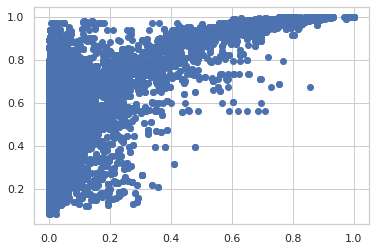

In [18]:

plt.scatter(df.dockQ,df.mm)


Text(0, 0.5, 'dockQ')

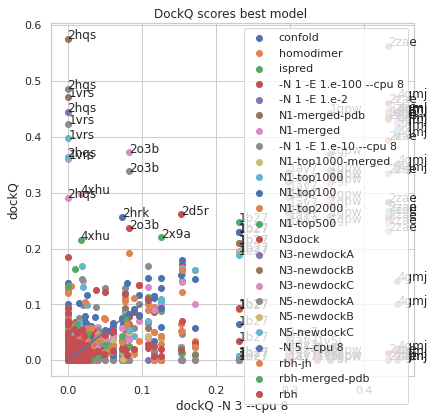

In [19]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
    if d=="trRosetta":continue   
    #if d=="confold":continue   
    #if d=="rbh-merged-pdb":continue   

    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4] # +d
        except:
            sstr=df_merged.name_y[i][0:4] #+d
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.1]
y=[0,0.1]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores best model ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'numcorrect')

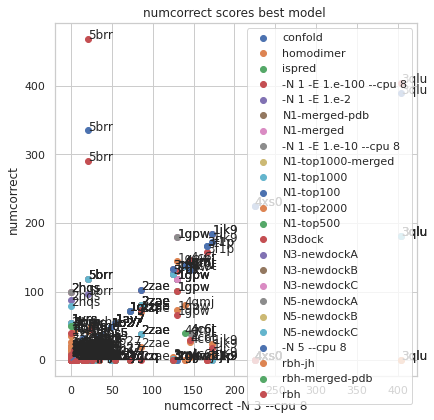

In [20]:
cutoff=5
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue 
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
        
    #if d=="confold":continue   
    #if d=="rbh-merged-pdb":continue   

    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.numcorrect_x,df_merged.numcorrect_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.numcorrect_x[i]> cutoff or df_merged.numcorrect_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.numcorrect_x[i], df_merged.numcorrect_y[i]))
x=[0,50]
y=[0,50]
plt.plot(x,y)
ax.legend()
ax.set_title("numcorrect scores best model ")
ax.set_xlabel("numcorrect "+str(datasets[0]))
ax.set_ylabel("numcorrect")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

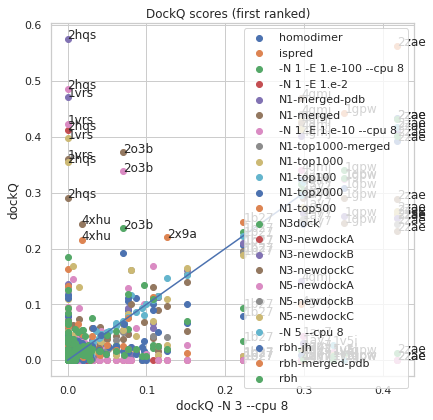

In [21]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue   
    if d=="confold":continue   
    #if d=="rbh-merged-pdb":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first[datasets[0]],data_first[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.3]
y=[0,0.3]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (first ranked)  ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

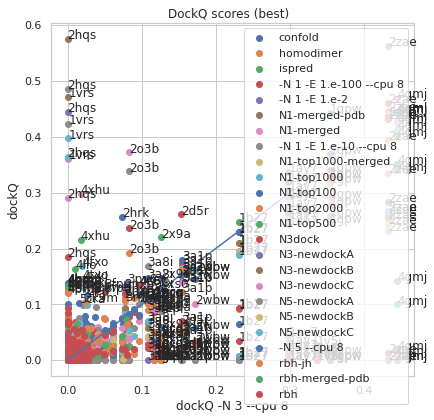

In [22]:
cutoff=0.1
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue   
    if d=="rbh merge pdb ":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
        
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.3]
y=[0,0.3]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

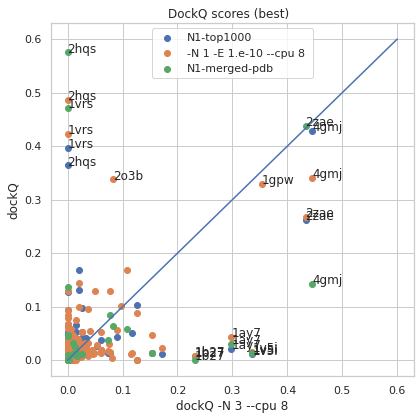

In [23]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["N1-top1000","-N 1 -E 1.e-10 --cpu 8 ","N1-merged-pdb"]:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue   
    if d=="rbh merge pdb ":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
        
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.6]
y=[0,0.6]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [24]:
data_max.keys()

dict_keys(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred', '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb', 'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged', 'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock', 'N3-newdockA', 'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB', 'N5-newdockC', '-N 5 --cpu 8', 'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1', 'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B', 'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1', 'PDBNEWDOCK-B--dockC2', 'PDBNEWDOC

Text(0, 0.5, 'dockQ trRosetta')

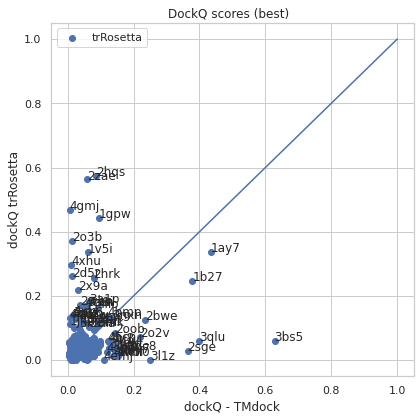

In [25]:
cutoff=0.1
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["TMdock-double"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ - TMdock")
ax.set_ylabel("dockQ "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ trRosetta')

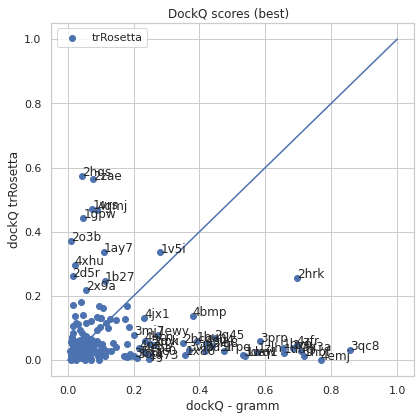

In [26]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ - gramm")
ax.set_ylabel("dockQ "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(20.200000000000003, 0.5, 'dockQ TMdock')

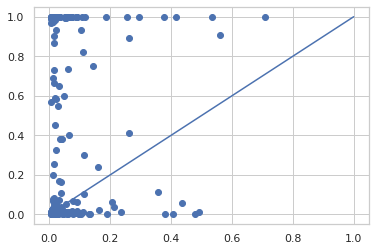

In [27]:
cutoff=0.1
#f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    #sns.jointplot(x="dockQ_x", y="dockQ_y", data=df_merged)
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (first model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(20.200000000000003, 0.5, 'dockQ TMdock-nohomology')

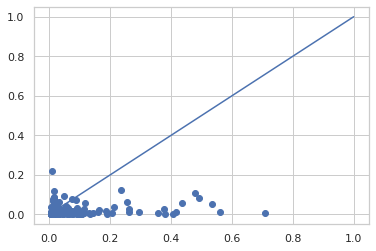

In [28]:
cutoff=0.1
#f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-nohomology"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    #sns.jointplot(x="dockQ_x", y="dockQ_y", data=df_merged)
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (first model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock-nohomology")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock')

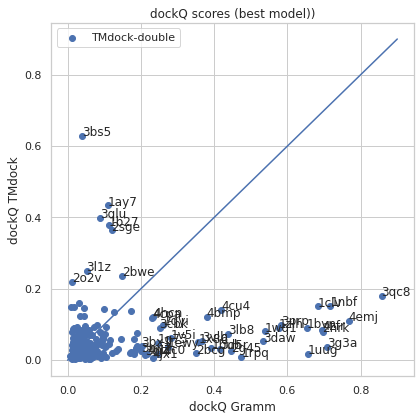

In [29]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (best model))" )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

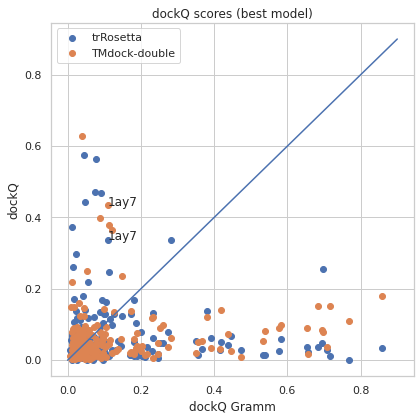

In [30]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta","TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        #if (sstr=="3qc8" or sstr=="2hqs" or sstr=="3bs5" ):
        if (sstr=="1ay7" ):
            #if (df_merged.dockQ_y[i]> cutoff and (df_merged.dockQ_y[i]>df_merged.dockQ_x[i])):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (best model)") 
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [31]:
df_merged = df_max[df_max["params"].isin(["trRosetta","gramm","TMdock-double"])]
df_merged.sort_values("dockQ")

name  lenA  lenB     msa   msaA   msaB  dockQ  \
JHparams  code                                                                 
trRosetta 3l1z  3l1z_u2_A-3l1z_u1_A   153   153  1390.0  48813  48813  0.000   
          4emj  4emj_u2_A-4emj_u1_A   403   403  6589.0  35770  35770  0.000   
          3fap  3fap_u2_A-3fap_u1_A   108   108  1208.0  35975  35975  0.000   
          3rj3  3rj3_u2_A-3rj3_u1_A   295   295   359.0   9332   9332  0.000   
          3oed  3oed_u2_A-3oed_u1_A   295   295   360.0   9332   9332  0.001   
...                             ...   ...   ...     ...    ...    ...    ...   
gramm     2hrk  2hrk_u1_A-2hrk_u2_A   181   121     0.0     0.     0.  0.696   
          3g3a  3g3a_u1_A-3g3a_u2_A   166   130     0.0     0.     0.  0.708   
          1nbf  1nbf_u1_A-1nbf_u2_A   340    78     0.0     0.     0.  0.717   
          4emj  4emj_u1_A-4emj_u2_A   403   106     0.0     0.     0.  0.768   
          3qc8  3qc8_u1_A-3qc8_u2_A   169    82     0.0     0.     0.  0.857   

                 fnat     iRMS      LRMS  ...  CODE     params      tmAB  \
JHparams  code                            ...                              
trRosetta 3l1z  0.000  261.906   529.224  ...  3l1z  trRosetta  0.776680   
          4emj  0.000  687.538  1470.821  ...  4emj  trRosetta  0.886965   
          3fap  0.000  187.525   397.703  ...  3fap  trRosetta  0.839040   
          3rj3  0.000  512.189  1048.671  ...  3rj3  trRosetta  0.635370   
          3oed  0.000  518.652  1068.903  ...  3oed  trRosetta  0.630830   
...               ...      ...       ...  ...   ...        ...       ...   
gramm     2hrk  0.978   13.721    37.969  ...  2hrk      gramm  1.000000   
          3g3a  0.787   11.568    27.296  ...  3g3a      gramm  1.000000   
          1nbf  0.649   20.191    45.946  ...  1nbf      gramm  1.000000   
          4emj  0.762    3.742    10.650  ...  4emj      gramm  1.000000   
          3qc8  0.977   11.047    18.799  ...  3qc8      gramm  1.000000   

                msaAB  tmAB_max  msaAB_max  tmAB_min  msaAB_min  numcorrect  \
JHparams  code                                                                
trRosetta 3l1z    NaN   0.83424      48813   0.72778      37715         0.0   
          4emj    NaN   0.90839      35770   0.86941     354953         0.0   
          3fap    NaN   0.87845      35975   0.80043       1487         0.0   
          3rj3    NaN   0.80210       9332   0.48427      54903         0.0   
          3oed    NaN   0.76749       9332   0.50462      41324         0.0   
...               ...       ...        ...       ...        ...         ...   
gramm     2hrk    NaN   1.00000         0.   1.00000         0.         0.0   
          3g3a    NaN   1.00000         0.   1.00000         0.         0.0   
          1nbf    NaN   1.00000         0.   1.00000         0.         0.0   
          4emj    NaN   1.00000         0.   1.00000         0.         0.0   
          3qc8    NaN   1.00000         0.   1.00000         0.         0.0   

                len  
JHparams  code       
trRosetta 3l1z  239  
          4emj  509  
          3fap  201  
          3rj3  421  
          3oed  426  
...             ...  
gramm     2hrk  302  
          3g3a  296  
          1nbf  418  
          4emj  509  
          3qc8  251  

[652 rows x 40 columns]

In [32]:
len(df_merged.loc[df_merged.dockQ>0.2]["CODE"].unique())

53

In [33]:
len(df_merged.loc[(df_merged.params=="trRosetta")&(df_merged.dockQ>0.2 )]["CODE"].unique())

13

In [34]:
len(df_merged.loc[(df_merged.params=="gramm")&(df_merged.dockQ>0.2 )]["CODE"].unique())

36

In [35]:
len(df_merged.loc[(df_merged.params=="TMdock-double")&(df_merged.dockQ>0.2 )]["CODE"].unique())

8

In [36]:
len(df_merged["CODE"].unique())

218

In [37]:
df.loc[df.params=="TMdock-double"].sort_values("dockQ")

name       JHparams  lenA  lenB  msa msaA msaB  dockQ  \
11703  1y64_u1_A-1y64_u2_A  TMdock-double   412   361  0.0   0.   0.  0.000   
12402  3hzi_u1_A-3hzi_u2_A  TMdock-double   410    70  0.0   0.   0.  0.000   
12404  3hzi_u1_A-3hzi_u2_A  TMdock-double   410    70  0.0   0.   0.  0.000   
11460  1jk9_u1_A-1jk9_u2_A  TMdock-double   218   154  0.0   0.   0.  0.000   
11458  1jk9_u1_A-1jk9_u2_A  TMdock-double   218   154  0.0   0.   0.  0.000   
...                    ...            ...   ...   ...  ...  ...  ...    ...   
12620  3qlu_u1_A-3qlu_u2_A  TMdock-double   384   374  0.0   0.   0.  0.398   
11213  1ay7_u1_A-1ay7_u2_A  TMdock-double    97    90  0.0   0.   0.  0.434   
12255  3bs5_u1_A-3bs5_u2_A  TMdock-double    84    76  0.0   0.   0.  0.539   
12251  3bs5_u1_A-3bs5_u2_A  TMdock-double    84    76  0.0   0.   0.  0.560   
12260  3bs5_u1_A-3bs5_u2_A  TMdock-double    84    76  0.0   0.   0.  0.628   

        fnat     iRMS  ...  CODE         params  tmAB  msaAB  tmAB_max  \
11703  0.000  135.286  ...  1y64  TMdock-double   1.0    NaN       1.0   
12402  0.000  140.378  ...  3hzi  TMdock-double   1.0    NaN       1.0   
12404  0.000  125.318  ...  3hzi  TMdock-double   1.0    NaN       1.0   
11460  0.000  180.465  ...  1jk9  TMdock-double   1.0    NaN       1.0   
11458  0.000  199.118  ...  1jk9  TMdock-double   1.0    NaN       1.0   
...      ...      ...  ...   ...            ...   ...    ...       ...   
12620  0.542    3.667  ...  3qlu  TMdock-double   1.0    NaN       1.0   
11213  0.417    2.576  ...  1ay7  TMdock-double   1.0    NaN       1.0   
12255  0.900    2.876  ...  3bs5  TMdock-double   1.0    NaN       1.0   
12251  0.700    2.688  ...  3bs5  TMdock-double   1.0    NaN       1.0   
12260  0.833    2.384  ...  3bs5  TMdock-double   1.0    NaN       1.0   

       msaAB_max  tmAB_min  msaAB_min  numcorrect  len  
11703         0.       1.0         0.       0.000  773  
12402         0.       1.0         0.       0.000  480  
12404         0.       1.0         0.       0.000  480  
11460         0.       1.0         0.     172.806  372  
11458         0.       1.0         0.     172.806  372  
...          ...       ...        ...         ...  ...  
12620         0.       1.0         0.     404.022  758  
11213         0.       1.0         0.      53.985  187  
12255         0.       1.0         0.      34.196  160  
12251         0.       1.0         0.      34.196  160  
12260         0.       1.0         0.      34.196  160  

[2160 rows x 42 columns]

In [38]:
df_merged.groupby(["CODE"]).median().sort_values("dockQ")


lenA   lenB     msa   dockQ   fnat      iRMS      LRMS  fnonnat  \
CODE                                                                     
1ycs  197.0  195.0     0.0  0.0090  0.000   64.5590  155.5760   1.0000   
3rj3  295.0  126.0     0.0  0.0090  0.000   56.4120  155.5220   1.0000   
2xwb  711.0  229.0     0.0  0.0100  0.000  121.5480  284.2610   1.0000   
2v55  388.0  180.0     0.0  0.0110  0.000   65.6380  133.8250   1.0000   
1te1  275.0  191.0     0.0  0.0110  0.000   96.5570  218.1660   1.0000   
...     ...    ...     ...     ...    ...       ...       ...      ...   
1b27  109.0   90.0     0.0  0.2470  0.160   32.7470   74.6080   1.0000   
2hrk  181.0  121.0     0.0  0.2570  0.326   26.7580   75.1980   1.0000   
1vrs  124.0  120.5  1045.5  0.2735  0.306  119.8405  249.2075   0.9905   
1v5i  276.0   78.0     0.0  0.2810  0.191   21.3190   69.6880   1.0000   
1ay7   97.0   90.0     0.0  0.3370  0.417   22.9850   72.0320   1.0000   

            mm      tmA  ...    auc   evalue    seqid  rank      tmAB  msaAB  \
CODE                     ...                                                   
1ycs  0.502560  1.00000  ...  0.000   134.00   66.667  10.0  0.669755    NaN   
3rj3  0.701670  1.00000  ...  0.000  9999.00    0.000  10.0  1.000000    NaN   
2xwb  0.756930  1.00000  ...  0.000   352.00   66.667  10.0  1.000000    NaN   
2v55  0.683750  1.00000  ...  0.000    69.00   66.667  10.0  1.000000    NaN   
1te1  0.590520  1.00000  ...  0.000   220.00  100.000  10.0  1.000000    NaN   
...        ...      ...  ...    ...      ...      ...   ...       ...    ...   
1b27  0.786140  1.00000  ...  0.460     4.30   50.000  10.0  1.000000    NaN   
2hrk  0.600000  1.00000  ...  0.000     0.36   19.718  10.0  1.000000    NaN   
1vrs  0.694125  0.99644  ...  0.245     3.00   38.462   6.0  0.817912    NaN   
1v5i  0.827360  1.00000  ...  0.160  9999.00    0.000  10.0  1.000000    NaN   
1ay7  0.742480  1.00000  ...  0.400  9999.00    0.000  10.0  1.000000    NaN   

      tmAB_max  tmAB_min  numcorrect    len  
CODE                                         
1ycs   1.00000  0.635710       0.000  392.0  
3rj3   1.00000  1.000000       0.000  421.0  
2xwb   1.00000  1.000000       0.000  940.0  
2v55   1.00000  1.000000       0.000  568.0  
1te1   1.00000  1.000000       0.000  466.0  
...        ...       ...         ...    ...  
1b27   1.00000  1.000000      49.025  199.0  
2hrk   1.00000  1.000000       0.000  302.0  
1vrs   0.99644  0.639385      26.994  241.0  
1v5i   1.00000  1.000000       1.000  354.0  
1ay7   1.00000  1.000000      53.985  187.0  

[218 rows x 33 columns]

Text(0, 0.5, 'dockQ TMdock')

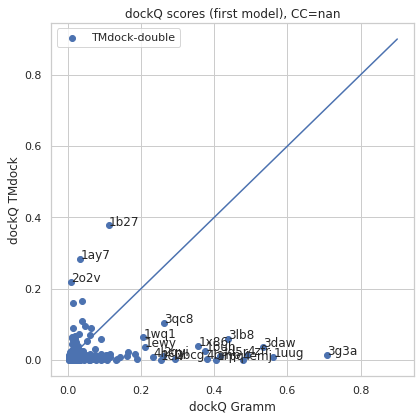

In [39]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (first model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock TMdock-double')

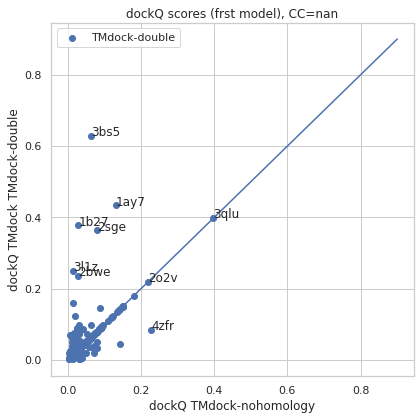

In [40]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["TMdock-nohomology"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ TMdock-nohomology")
ax.set_ylabel("dockQ TMdock "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock trRosetta')

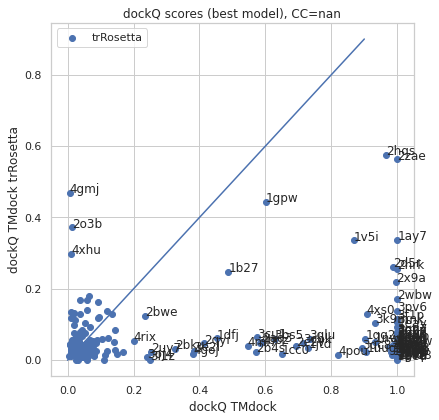

In [41]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["TMdock"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (best model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ TMdock")
ax.set_ylabel("dockQ TMdock "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDB')

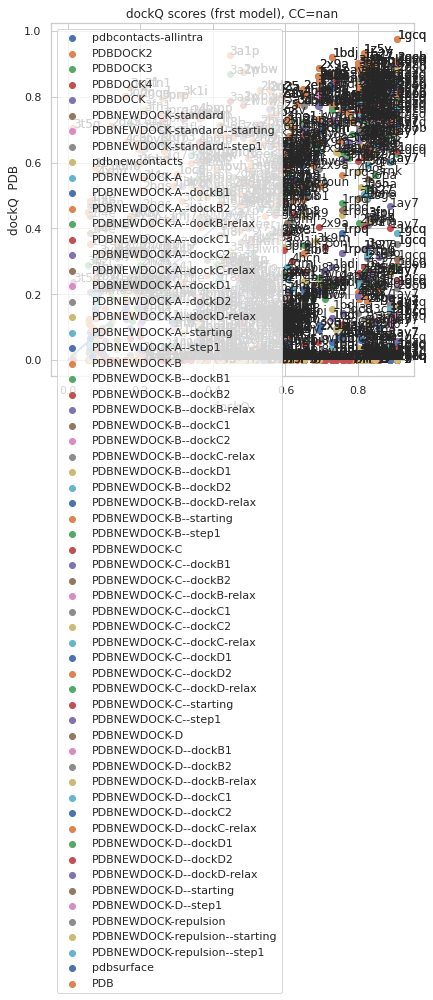

In [42]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDB|^pdb")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-repulsion--step1')

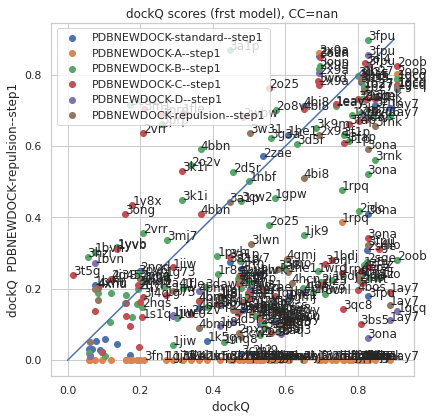

In [43]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile(".*step1.*")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-D')

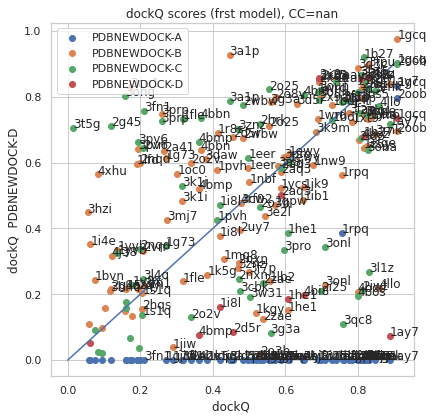

In [44]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDBNEWDOCK-[ABCD]$")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-D--dockB-relax')

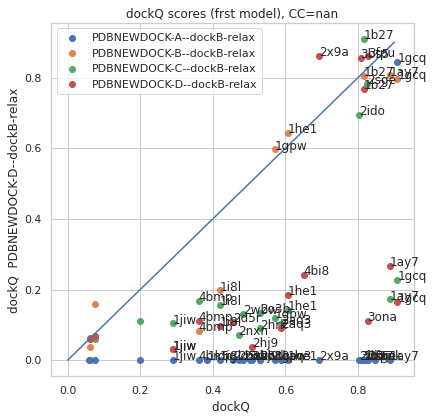

In [45]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile(".*dockB-relax.*")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-D--dockC-relax')

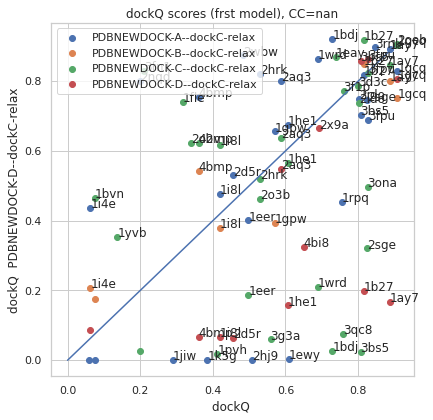

In [46]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile(".*dockC-relax.*")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-D--dockD-relax')

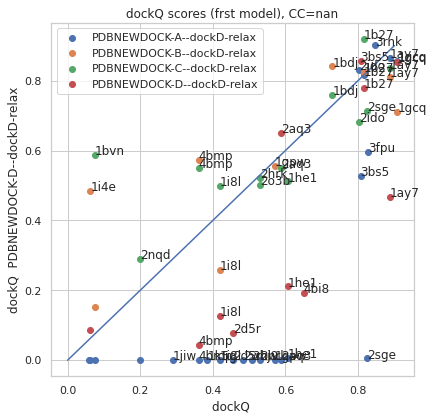

In [47]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile(".*dockD-relax.*")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-C')

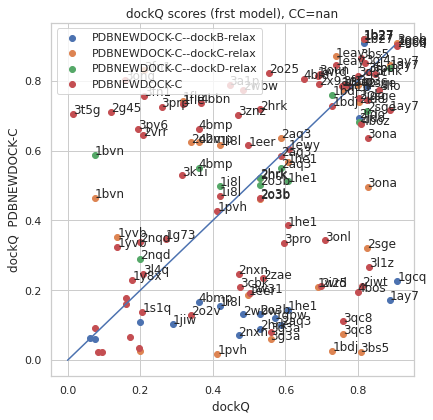

In [48]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDBNEWDOCK-C.*-relax.*")
pdbset=list(filter(r.match, datasets))+["PDBNEWDOCK-C"]

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-C--dockD-relax')

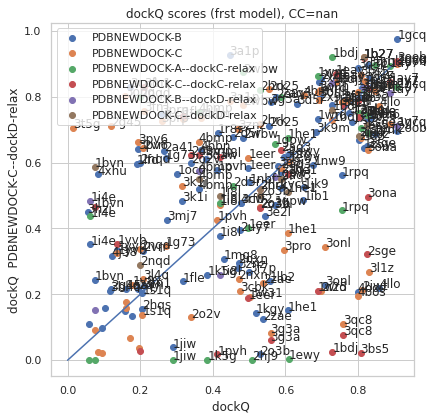

In [49]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDBNEWDOCK-C.*-relax.*")
pdbset=list(filter(r.match, datasets))+["PDBNEWDOCK-C"]
pdbset=["PDBNEWDOCK-B","PDBNEWDOCK-C","PDBNEWDOCK-A--dockC-relax",
        "PDBNEWDOCK-C--dockC-relax","PDBNEWDOCK-B--dockD-relax",
        "PDBNEWDOCK-C--dockD-relax"]

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-repulsion')

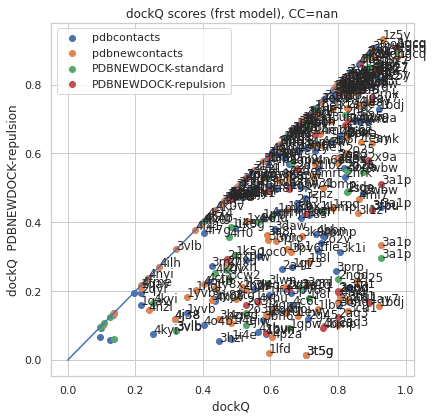

In [50]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDBNEWDOCK-C.*-relax.*")
pdbset=list(filter(r.match, datasets))+["PDBNEWDOCK-C"]
pdbset=["pdbcontacts","pdbnewcontacts","PDBNEWDOCK-standard","PDBNEWDOCK-repulsion"]

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    #if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["PDB"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [51]:
r=re.compile(".*relax.*")
#pdbset=list(filter(r.match, datasets))+['PDBNEWDOCK-A','PDBNEWDOCK-B', 'PDBNEWDOCK-C', 'PDBNEWDOCK-D',"pdbcontacts"]
pdbset=sorted(["PDB","PDBNEWDOCK-B","PDBNEWDOCK-C","PDBNEWDOCK-A--dockC-relax",
        "PDBNEWDOCK-C--dockC-relax","PDBNEWDOCK-B--dockD-relax",
        "PDBNEWDOCK-C--dockD-relax","pdbcontacts","pdbnewcontacts","PDBNEWDOCK-standard","PDBNEWDOCK-repulsion"])


smallset=["1ay7", "1b27", "1bvn", "1gcq", "1gpw", "1he1", "1i4e", "1i8l",
"1jiw", "1k5g", "1nql", "1vg0", "2aq3", "2b4s", "2d5r", "2grx",
"2hj9", "2hrk", "2ido", "2nqd", "2nxn", "2o3b", "2sge", "2wbw",
"2x9a", "2xwb", "2zae", "3a1p", "3a8i", "3bs5", "3buz", "3cw2",
"3cw2", "3fpu", "3lwn", "3ona", "3rnk", "3vlb", "3w31", "3wkt",
"4bi8", "4bmp", "4gmj", "4hcn", "4k0v", "4kyi", "4o4b", "4rf0",
"4xhu", "4yoc"]
codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
codes=smallset
codes=df_max.loc[(df_max.params=="PDBNEWDOCK-A--dockC-relax")&(df_max.params.isin(pdbset) )]["CODE"].unique()
codes=df_max.loc[(df_max.params=="PDBNEWDOCK-C")&(df_max.params.isin(pdbset) )]["CODE"].unique()

codes=smallset

In [52]:
cutoff=0.2
newdf=df_max.loc[df_max.dockQ>cutoff]
newdf=newdf.reset_index()

PDB
PDBNEWDOCK-A--dockC-relax
PDBNEWDOCK-B
PDBNEWDOCK-B--dockD-relax
PDBNEWDOCK-C
PDBNEWDOCK-C--dockC-relax
PDBNEWDOCK-C--dockD-relax
PDBNEWDOCK-repulsion
PDBNEWDOCK-standard
pdbcontacts
pdbnewcontacts


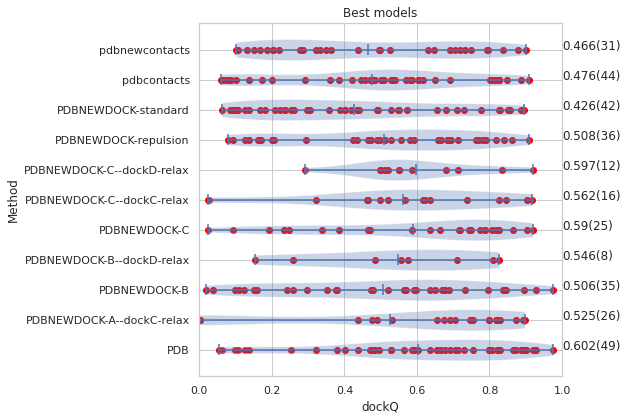

In [53]:
# FInd best method for each model.
#codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
#plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
#plt.scatter(best_df.dockQ,best_df.JHparams,color="red")


all_df=df_max.loc[(df_max.CODE.isin(codes))&(df_max.params.isin(pdbset))].reset_index()
plt.scatter(all_df.dockQ,all_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(all_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    #numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[all_df.JHparams[i]]==0:
        done[all_df.JHparams[i]]=1
        #ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[all_df.JHparams[i]],3))+"("+str(length[all_df.JHparams[i]])+")"
                    ,(1.0, all_df.JHparams[i]))


In [54]:
datasets

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       'N3-newdockA', 'N3-newdockB', 'N3-newdockC', 'N5-newdockA',
       'N5-newdockB', 'N5-newdockC', '-N 5 --cpu 8',
       'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3',
       'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard',
       'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1',
       'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1',
       'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax',
       'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2',
       'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1',
       'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax',
       'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B',
       'PDBNEWDOCK-B--dockB1', 'PDBNEWDOC

In [55]:
pdbset=[ 'N3dock',
       'N3-newdockA', 'N3-newdockB', 'N3-newdockC', 'N5-newdockA','N5-newdockB',
       'N5-newdockC', '-N 5 --cpu 8',"-N 3 --cpu 8"]
codes=df_max.loc[(df_max.params=="N3-newdockC")&(df_max.params.isin(pdbset) )]["CODE"].unique()
codes

array(['1ay7', '1b27', '1bvn', '1gcq', '1gpw', '1he1', '1i4e', '1i8l',
       '2aq3', '2b4s', '2d5r', '2hj9', '2hrk', '2ido', '2nqd', '2nxn',
       '2o3b', '2sge', '2wbw', '2x9a', '2zae', '3a1p', '3a8i', '3bs5',
       '3cw2', '3fpu', '3lwn', '3ona', '3rnk', '3w31', '4bi8', '4bmp',
       '4gmj', '4hcn', '4xhu'], dtype=object)

Text(0, 0.5, 'dockQ  -N 3 --cpu 8')

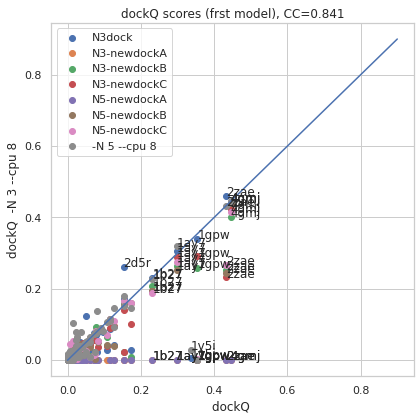

In [56]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="-N 3 --cpu 8":continue
    df_merged = pd.merge(data_max["-N 3 --cpu 8"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

-N 3 --cpu 8 35
-N 5 --cpu 8 35
N3-newdockA 34
N3-newdockB 30
N3-newdockC 35
N3dock 34
N5-newdockA 31
N5-newdockB 31
N5-newdockC 32


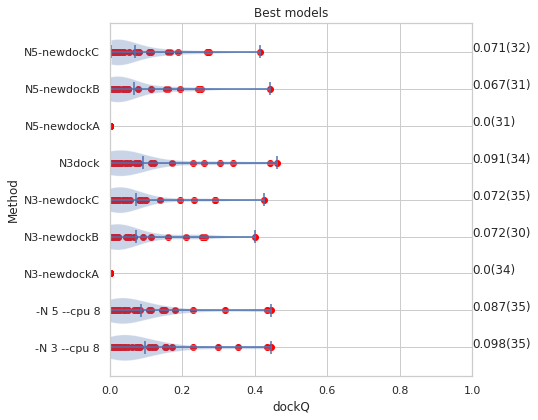

In [57]:
# FInd best method for each model.
#codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
#plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
#plt.scatter(best_df.dockQ,best_df.JHparams,color="red")


all_df=df_max.loc[(df_max.CODE.isin(codes))&(df_max.params.isin(pdbset))].reset_index()
plt.scatter(all_df.dockQ,all_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    print (d,len(data[i]))
    i+=1
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(all_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    #numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[all_df.JHparams[i]]==0:
        done[all_df.JHparams[i]]=1
        #ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[all_df.JHparams[i]],3))+"("+str(length[all_df.JHparams[i]])+")"
                    ,(1.0, all_df.JHparams[i]))


In [58]:
pdbset=sorted(["N1","N3"])

In [59]:
for d in pdbset:
    print (d,len(df_max.loc[(df_max.params==d)]["CODE"].unique()))

N1 0
N3 0


In [60]:
all_df

JHparams  code                 name  lenA  lenB     msa   msaA  \
0    -N 3 --cpu 8  1ay7  1ay7_u2_A-1ay7_u1_A    97    97  1060.0   2034   
1    -N 3 --cpu 8  1b27  1b27_u2_A-1b27_u1_A   109   109   733.0   2034   
2    -N 3 --cpu 8  1bvn  1bvn_u2_A-1bvn_u1_A   496   496    95.0  52623   
3    -N 3 --cpu 8  1gcq  1gcq_u2_A-1gcq_u1_A    66    66  1365.0  77704   
4    -N 3 --cpu 8  1gpw  1gpw_u2_A-1gpw_u1_A   252   252  7137.0  67629   
..            ...   ...                  ...   ...   ...     ...    ...   
292   N5-newdockC  4bi8  4bi8_u1_A-4bi8_u2_A   164    94    51.0    291   
293   N5-newdockC  4bmp  4bmp_u1_A-4bmp_u2_A   301   118  4607.0   9429   
294   N5-newdockC  4gmj  4gmj_u1_A-4gmj_u2_A   253   236  1189.0   6344   
295   N5-newdockC  4hcn  4hcn_u1_A-4hcn_u2_A   250    77     1.0     20   
296   N5-newdockC  4xhu  4xhu_u1_A-4xhu_u2_A   352    95   410.0   9970   

      msaB  dockQ   fnat  ...  CODE        params      tmAB  msaAB  tmAB_max  \
0     2034  0.298  0.278  ...  1ay7  -N 3 --cpu 8  0.828190    NaN   0.84625   
1     2034  0.231  0.160  ...  1b27  -N 3 --cpu 8  0.824750    NaN   0.85428   
2    52623  0.014  0.000  ...  1bvn  -N 3 --cpu 8  0.619740    NaN   0.70905   
3    77704  0.117  0.240  ...  1gcq  -N 3 --cpu 8  0.555390    NaN   0.63426   
4    67629  0.354  0.320  ...  1gpw  -N 3 --cpu 8  0.888935    NaN   0.89468   
..     ...    ...    ...  ...   ...           ...       ...    ...       ...   
292    382  0.026  0.000  ...  4bi8   N5-newdockC  0.695005    NaN   0.78100   
293  15729  0.004  0.000  ...  4bmp   N5-newdockC  0.811060    NaN   0.86858   
294   1653  0.414  0.634  ...  4gmj   N5-newdockC  0.831570    NaN   0.83593   
295  41925  0.014  0.000  ...  4hcn   N5-newdockC  0.467315    NaN   0.61756   
296    548  0.007  0.000  ...  4xhu   N5-newdockC  0.713510    NaN   0.72964   

     msaAB_max  tmAB_min  msaAB_min  numcorrect  len  
0         2034   0.81013       1485      53.985  187  
1         2034   0.79522       1484      49.025  199  
2        52623   0.53043        123       0.000  571  
3        77704   0.52080      77497      71.760  123  
4        67629   0.88319      58466     130.000  456  
..         ...       ...        ...         ...  ...  
292        382   0.60901        291       0.000  258  
293       9429   0.75354      15729       0.000  419  
294       6344   0.82721       1653     139.104  489  
295      41925   0.31707         20       0.000  327  
296       9970   0.69738        548       0.000  447  

[297 rows x 42 columns]

In [61]:
cutoff=0.2
newdf=df_max.loc[df_max.dockQ>cutoff]
newdf=newdf.reset_index()


In [62]:
datasets

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       'N3-newdockA', 'N3-newdockB', 'N3-newdockC', 'N5-newdockA',
       'N5-newdockB', 'N5-newdockC', '-N 5 --cpu 8',
       'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3',
       'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard',
       'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1',
       'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1',
       'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax',
       'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2',
       'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1',
       'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax',
       'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B',
       'PDBNEWDOCK-B--dockB1', 'PDBNEWDOC

In [63]:
r=re.compile(".*relax.*")
pdbset=list(filter(r.match, datasets))+['PDBNEWDOCK-A','PDBNEWDOCK-B', 'PDBNEWDOCK-C', 'PDBNEWDOCK-D',"pdbcontacts"]


smallset=["1ay7", "1b27", "1bvn", "1gcq", "1gpw", "1he1", "1i4e", "1i8l",
"1jiw", "1k5g", "1nql", "1vg0", "2aq3", "2b4s", "2d5r", "2grx",
"2hj9", "2hrk", "2ido", "2nqd", "2nxn", "2o3b", "2sge", "2wbw",
"2x9a", "2xwb", "2zae", "3a1p", "3a8i", "3bs5", "3buz", "3cw2",
"3cw2", "3fpu", "3lwn", "3ona", "3rnk", "3vlb", "3w31", "3wkt",
"4bi8", "4bmp", "4gmj", "4hcn", "4k0v", "4kyi", "4o4b", "4rf0",
"4xhu", "4yoc"]
codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
codes=smallset
codes=df_max.loc[(df_max.params=="PDBNEWDOCK-A")&(df_max.params.isin(pdbset) )]["CODE"].unique()


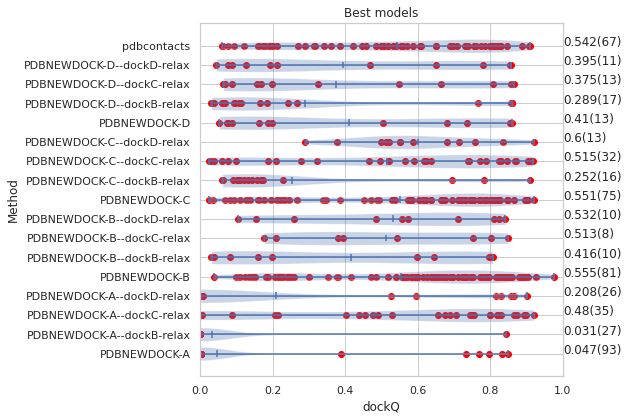

In [64]:
# FInd best method for each model.
#codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
#plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
#plt.scatter(best_df.dockQ,best_df.JHparams,color="red")


all_df=df_max.loc[(df_max.CODE.isin(codes))&(df_max.params.isin(pdbset))].reset_index()
plt.scatter(all_df.dockQ,all_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    #print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(all_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    #numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[all_df.JHparams[i]]==0:
        done[all_df.JHparams[i]]=1
        #ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[all_df.JHparams[i]],3))+"("+str(length[all_df.JHparams[i]])+")"
                    ,(1.0, all_df.JHparams[i]))


In [65]:
codes

array(['1ay7', '1b27', '1bdj', '1buh', '1bvn', '1cc0', '1eay', '1eer',
       '1ewy', '1fle', '1fq1', '1g6v', '1g73', '1gcq', '1gpw', '1he1',
       '1i4e', '1i8l', '1jiw', '1k5g', '1kgy', '1lb2', '1lfd', '1nql',
       '1qav', '1rpq', '1vg0', '1vrs', '1wrd', '1xt9', '1y8x', '1z5y',
       '2aq3', '2b4s', '2bwe', '2c2v', '2d5r', '2ejf', '2g45', '2grx',
       '2gwf', '2hj9', '2hrk', '2i25', '2ido', '2iwt', '2nqd', '2o25',
       '2o2v', '2oob', '2qyi', '2sge', '2wbw', '2wy7', '2wy8', '2x9a',
       '2xgy', '2zae', '3a1p', '3bs5', '3cu1', '3d3c', '3f1p', '3fap',
       '3fn1', '3fpu', '3g3a', '3k1i', '3l1z', '3oj4', '3ona', '3onl',
       '3qc8', '3rj3', '3rnk', '4bi8', '4bmp', '4bos', '4boz', '4c6t',
       '4jqw', '4m3k', '4ml7', '4pj2', '4pou', '4r62', '4txo', '4xkl',
       '4xs0', '4y5o', '4zfr', '5cra', '5eg3'], dtype=object)

In [66]:
all_df

JHparams  code                 name  lenA  lenB     msa msaA msaB  \
0    PDBNEWDOCK-A  1ay7  1ay7_u2_A-1ay7_u1_A    97    97  1060.0   0.   0.   
1    PDBNEWDOCK-A  1b27  1b27_u2_A-1b27_u1_A   109   109   733.0   0.   0.   
2    PDBNEWDOCK-A  1bdj  1bdj_u2_A-1bdj_u1_A   129   129  5651.0   0.   0.   
3    PDBNEWDOCK-A  1buh  1buh_u2_A-1buh_u1_A   291   291  1177.0   0.   0.   
4    PDBNEWDOCK-A  1bvn  1bvn_u1_A-1bvn_u2_A   496    75    95.0   0.   0.   
..            ...   ...                  ...   ...   ...     ...  ...  ...   
542   pdbcontacts  4bmp  4bmp_u2_A-4bmp_u1_A   301   301  4607.0   0.   0.   
543   pdbcontacts  4bos  4bos_u2_A-4bos_u1_A    77   176  1291.0   0.   0.   
544   pdbcontacts  4boz  4boz_u2_A-4boz_u1_A    77   176  1291.0   0.   0.   
545   pdbcontacts  4c6t  4c6t_u2_A-4c6t_u1_A   143   163   173.0   0.   0.   
546   pdbcontacts  5eg3  5eg3_u1_A-5eg3_u2_A   303   105   421.0   0.   0.   

     dockQ   fnat  ...  CODE        params      tmAB  msaAB  tmAB_max  \
0    0.000  0.000  ...  1ay7  PDBNEWDOCK-A  0.998225    NaN   0.99846   
1    0.000  0.000  ...  1b27  PDBNEWDOCK-A  0.996305    NaN   0.99634   
2    0.000  0.000  ...  1bdj  PDBNEWDOCK-A  0.991110    NaN   0.99125   
3    0.001  0.000  ...  1buh  PDBNEWDOCK-A  0.914960    NaN   0.97371   
4    0.000  0.000  ...  1bvn  PDBNEWDOCK-A  0.882520    NaN   0.88313   
..     ...    ...  ...   ...           ...       ...    ...       ...   
542  0.361  0.418  ...  4bmp   pdbcontacts  0.898250    NaN   0.95078   
543  0.799  0.743  ...  4bos   pdbcontacts  0.972910    NaN   0.98002   
544  0.808  0.782  ...  4boz   pdbcontacts  0.956835    NaN   0.95927   
545  0.160  0.410  ...  4c6t   pdbcontacts  0.961185    NaN   0.96206   
546  0.094  0.000  ...  5eg3   pdbcontacts  0.909250    NaN   0.91808   

     msaAB_max  tmAB_min  msaAB_min  numcorrect  len  
0           0.   0.99799         0.         0.0  187  
1           0.   0.99627         0.         0.0  199  
2           0.   0.99097         0.         0.0  247  
3           0.   0.85621         0.         0.0  363  
4           0.   0.88191         0.         0.0  571  
..         ...       ...        ...         ...  ...  
542         0.   0.86669         0.         0.0  419  
543         0.   0.96580         0.         0.0  253  
544         0.   0.95440         0.         0.0  253  
545         0.   0.96031         0.         0.0  306  
546         0.   0.90042         0.         0.0  408  

[547 rows x 42 columns]

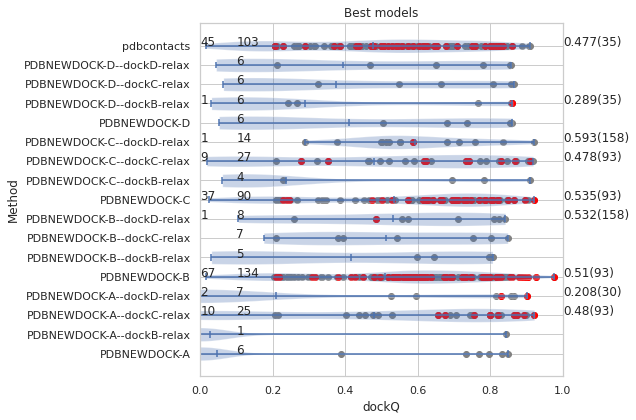

In [67]:
# FInd best method for each model.
codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    #print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(best_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[best_df.JHparams[i]]==0:
        done[best_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[best_df.JHparams[i]],3))+"("+str(length[good_df.JHparams[i]])+")"
                    ,(1.0, best_df.JHparams[i]))
for d in datasets:
    done[d]=0
for i, txt in enumerate(good_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(good_df.loc[good_df.JHparams==good_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[good_df.JHparams[i]]==0:
        done[good_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.1, good_df.JHparams[i]))
        #ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))
        #ax.annotate("("+str(length[good_df.JHparams[i]])+")",(1.2, good_df.JHparams[i]))


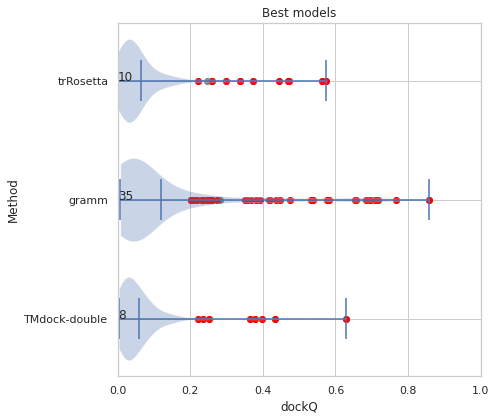

In [68]:
compareset=["trRosetta","gramm","TMdock-double"]
codes=df_max.loc[df_max.params.isin(compareset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(compareset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(compareset))].reset_index()
plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(compareset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    #print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(best_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[best_df.JHparams[i]]==0:
        done[best_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        #ax.annotate(str(round(average[best_df.JHparams[i]],3))+
        #            "("+str(length[good_df.JHparams[i]])+")"
        #            ,(1.0, best_df.JHparams[i]))
for d in datasets:
    done[d]=0
for i, txt in enumerate(good_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(good_df.loc[good_df.JHparams==good_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[good_df.JHparams[i]]==0:
        done[good_df.JHparams[i]]=1
        #ax.annotate(str(numhit),(.1, good_df.JHparams[i]))
        #ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))
        #ax.annotate("("+str(length[good_df.JHparams[i]])+")",(1.2, good_df.JHparams[i]))


In [69]:
best_df

index       JHparams  code                 name  lenA  lenB     msa  \
0    1157          gramm  3qc8  3qc8_u1_A-3qc8_u2_A   169    82     0.0   
1    1162          gramm  4emj  4emj_u1_A-4emj_u2_A   403   106     0.0   
2    1137          gramm  1nbf  1nbf_u1_A-1nbf_u2_A   340    78     0.0   
3    1152          gramm  3g3a  3g3a_u1_A-3g3a_u2_A   166   130     0.0   
4    1146          gramm  2hrk  2hrk_u1_A-2hrk_u2_A   181   121     0.0   
5    1166          gramm  4zfr  4zfr_u1_A-4zfr_u2_A   186    77     0.0   
6    1134          gramm  1clv  1clv_u1_A-1clv_u2_A   471    33     0.0   
7    1139          gramm  1uug  1uug_u1_A-1uug_u2_A   230    83     0.0   
8    1132          gramm  1bvn  1bvn_u1_A-1bvn_u2_A   496    75     0.0   
9    1115  TMdock-double  3bs5  3bs5_u1_A-3bs5_u2_A    84    76     0.0   
10   1156          gramm  3prp  3prp_u1_A-3prp_u2_A   184    77     0.0   
11   1143          gramm  1zlh  1zlh_u1_A-1zlh_u2_A   306    76     0.0   
12   1408      trRosetta  2hqs  2hqs_u2_A-2hqs_u1_A   398   398  2535.0   
13   1412      trRosetta  2zae  2zae_u2_A-2zae_u1_A   107   107  1125.0   
14   1141          gramm  1wq1  1wq1_u1_A-1wq1_u2_A   325   167     0.0   
15   1151          gramm  3daw  3daw_u1_A-3daw_u2_A   360   143     0.0   
16   1138          gramm  1rpq  1rpq_u1_A-1rpq_u2_A   174    22     0.0   
17   1406      trRosetta  1vrs  1vrs_u2_A-1vrs_u1_A   124   124  2091.0   
18   1413      trRosetta  4gmj  4gmj_u2_A-4gmj_u1_A   253   253  1189.0   
19   1145          gramm  2g45  2g45_u1_A-2g45_u2_A   114    77     0.0   
20   1404      trRosetta  1gpw  1gpw_u2_A-1gpw_u1_A   252   252  7203.0   
21   1153          gramm  3lb8  3lb8_u1_A-3lb8_u2_A   422   107     0.0   
22   1110  TMdock-double  1ay7  1ay7_u1_A-1ay7_u2_A    97    90     0.0   
23   1161          gramm  4cu4  4cu4_u1_A-4cu4_u2_A   706    22     0.0   
24   1150          gramm  3d5r  3d5r_u1_A-3d5r_u2_A   295    62     0.0   
25   1117  TMdock-double  3qlu  3qlu_u1_A-3qlu_u2_A   384   374     0.0   
26   1131          gramm  1buh  1buh_u1_A-1buh_u2_A   291    72     0.0   
27   1159          gramm  4bmp  4bmp_u1_A-4bmp_u2_A   301   118     0.0   
28   1111  TMdock-double  1b27  1b27_u1_A-1b27_u2_A   109    90     0.0   
29   1410      trRosetta  2o3b  2o3b_u2_A-2o3b_u1_A   240   240   456.0   
30   1158          gramm  3vlb  3vlb_u1_A-3vlb_u2_A   413   222     0.0   
31   1114  TMdock-double  2sge  2sge_u1_A-2sge_u2_A   186    57     0.0   
32   1142          gramm  1x86  1x86_u1_A-1x86_u2_A   353   181     0.0   
33   1144          gramm  2bcg  2bcg_u1_A-2bcg_u2_A   440   179     0.0   
34   1405      trRosetta  1v5i  1v5i_u2_A-1v5i_u1_A   276   276  1922.0   
35   1414      trRosetta  4xhu  4xhu_u2_A-4xhu_u1_A   352   352   410.0   
36   1135          gramm  1ewy  1ewy_u1_A-1ewy_u2_A   304    99     0.0   
37   1147          gramm  2qyi  2qyi_u1_A-2qyi_u2_A   224   180     0.0   
38   1407      trRosetta  2d5r  2d5r_u2_A-2d5r_u1_A   265   265   521.0   
39   1116  TMdock-double  3l1z  3l1z_u1_A-3l1z_u2_A   153    86     0.0   
40   1149          gramm  3cbk  3cbk_u1_A-3cbk_u2_A   257   111     0.0   
41   1133          gramm  1cc0  1cc0_u1_A-1cc0_u2_A   178   149     0.0   
42   1136          gramm  1g73  1g73_u1_A-1g73_u2_A   174    97     0.0   
43   1112  TMdock-double  2bwe  2bwe_u1_A-2bwe_u2_A    78    47     0.0   
44   1163          gramm  4hcn  4hcn_u1_A-4hcn_u2_A   250    77     0.0   
45   1164          gramm  4jx1  4jx1_u1_A-4jx1_u2_A   405   107     0.0   
46   1160          gramm  4cpa  4cpa_u1_A-4cpa_u2_A   308    40     0.0   
47   1411      trRosetta  2x9a  2x9a_u2_A-2x9a_u1_A   103   103     4.0   
48   1113  TMdock-double  2o2v  2o2v_u1_A-2o2v_u2_A   114    94     0.0   
49   1165          gramm  4nzl  4nzl_u1_A-4nzl_u2_A   219   100     0.0   
50   1155          gramm  3oj4  3oj4_u1_A-3oj4_u2_A   151    77     0.0   
51   1148          gramm  3bx1  3bx1_u1_A-3bx1_u2_A   270   182     0.0   
52   1154          gramm  3mj

In [70]:
codes

array(['1ay7', '1b27', '1bdj', '1buh', '1bvn', '1cc0', '1clv', '1dfj',
       '1eay', '1eer', '1ewy', '1fle', '1fq1', '1g6v', '1g73', '1gcq',
       '1gg2', '1gpw', '1he1', '1i2m', '1i4e', '1i8l', '1ib1', '1jiw',
       '1jk9', '1jtd', '1k5g', '1kgy', '1lb2', '1lfd', '1mq8', '1nbf',
       '1nql', '1nw9', '1oc0', '1pvh', '1qav', '1r8s', '1rpq', '1s1q',
       '1te1', '1tmq', '1uug', '1v5i', '1vg0', '1wq1', '1wrd', '1x86',
       '1xt9', '1y64', '1y8x', '1ycs', '1yu6', '1yvb', '1z5y', '1zlh',
       '2a41', '2a5d', '2a9k', '2abz', '2aq3', '2b4s', '2bcg', '2bcn',
       '2bku', '2bwe', '2c0l', '2c2v', '2ch4', '2d5r', '2ejf', '2g45',
       '2grx', '2gwf', '2hj9', '2hqs', '2hrk', '2i25', '2ido', '2iwt',
       '2nqd', '2nxn', '2o25', '2o2v', '2o3b', '2o8v', '2oob', '2qyi',
       '2sge', '2uy7', '2v55', '2vdb', '2vrr', '2wbw', '2wy7', '2wy8',
       '2x9a', '2xgy', '2xwb', '2zae', '3a1p', '3a8i', '3av0', '3bh6',
       '3bs5', '3buz', '3bx1', '3cbk', '3cu1', '3cw2', '3d3c', '3d5r',
      

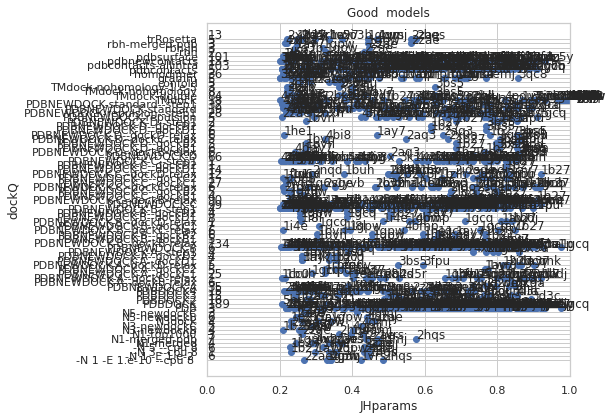

In [71]:

f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(newdf.dockQ,newdf.JHparams)
#cc=np.corrcoef(newdf.dockQ,newdf.len)
ax.set_title("Good  models")
ax.set_xlabel("JHparams")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
for d in datasets:
    done[d]=0
for i, txt in enumerate(newdf.name):
    #print (i,txt)
    sstr=txt[0:4]
    ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(newdf.loc[newdf.JHparams==newdf.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[newdf.JHparams[i]]==0:
        done[newdf.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, newdf.JHparams[i]))

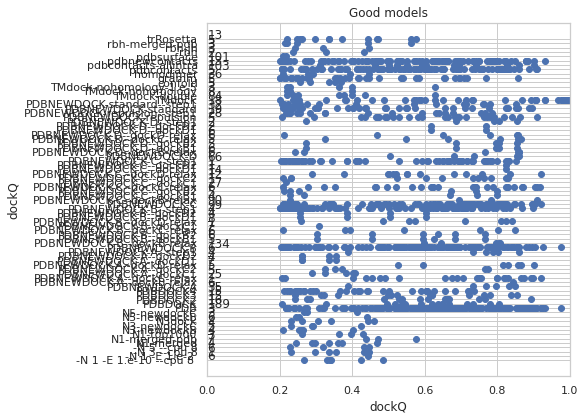

In [72]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(newdf.dockQ,newdf.JHparams)
#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Good models")
ax.set_xlabel("dockQ")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
for d in datasets:
    done[d]=0
for i, txt in enumerate(newdf.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(newdf.loc[newdf.JHparams==newdf.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[newdf.JHparams[i]]==0:
        done[newdf.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, newdf.JHparams[i]))

In [73]:
datasets

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       'N3-newdockA', 'N3-newdockB', 'N3-newdockC', 'N5-newdockA',
       'N5-newdockB', 'N5-newdockC', '-N 5 --cpu 8',
       'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3',
       'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard',
       'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1',
       'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1',
       'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax',
       'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2',
       'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1',
       'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax',
       'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B',
       'PDBNEWDOCK-B--dockB1', 'PDBNEWDOC

In [74]:
# here we find what method is best for each target

r = re.compile("^PDB.*|^TMd.*|^gramm|trRosetta|^pdb.*")
excludecolumns = list(filter(r.match, datasets)) # Read Note
print(excludecolumns)
excludecolumns+=["confold","rbh-merged-pdb"]
tempdf=newdf.loc[~newdf.JHparams.isin(excludecolumns)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

['gramm', 'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1', 'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B', 'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1', 'PDBNEWDOCK-B--dockC2', 'PDBNEWDOCK-B--dockC-relax', 'PDBNEWDOCK-B--dockD1', 'PDBNEWDOCK-B--dockD2', 'PDBNEWDOCK-B--dockD-relax', 'PDBNEWDOCK-B--starting', 'PDBNEWDOCK-B--step1', 'PDBNEWDOCK-C', 'PDBNEWDOCK-C--dockB1', 'PDBNEWDOCK-C--dockB2', 'PDBNEWDOCK-C--dockB-relax', 'PDBNEWDOCK-C--dockC1', 'PDBNEWDOCK-C--dockC2', 'PDBNEWDOCK-C--dockC-relax', 'PDBNEWDOCK-C--dockD1', 'PDBNEWDOCK-C-

index       JHparams  code                 name  lenA  lenB     msa  \
5       9   -N 3 --cpu 8  1gpw  1gpw_u2_A-1gpw_u1_A   252   252  7137.0   
6      10   -N 3 --cpu 8  1v5i  1v5i_u2_A-1v5i_u1_A   276   276  1922.0   
10      8   -N 3 --cpu 8  1b27  1b27_u2_A-1b27_u1_A   109   109   733.0   
7      13   -N 5 --cpu 8  1ay7  1ay7_u2_A-1ay7_u1_A    97    97  1060.0   
2      22      N1-merged  4gmj  4gmj_u2_A-4gmj_u1_A   253   253  1189.0   
4      20      N1-merged  2o3b  2o3b_u2_A-2o3b_u1_A   240   240   456.0   
8      23      N1-merged  4xhu  4xhu_u2_A-4xhu_u1_A   352   352   410.0   
0      25  N1-merged-pdb  2hqs  2hqs_u2_A-2hqs_u1_A   398   398  2368.0   
1      24  N1-merged-pdb  1vrs  1vrs_u2_A-1vrs_u1_A   124   124   836.0   
3      44         N3dock  2zae  2zae_u2_A-2zae_u1_A   107   107  1125.0   
9      43         N3dock  2d5r  2d5r_u2_A-2d5r_u1_A   265   265   521.0   

     msaA   msaB  dockQ  ...  CODE         params      tmAB  msaAB  tmAB_max  \
5   67629  67629  0.354  ...  1gpw   -N 3 --cpu 8  0.888935    NaN   0.89468   
6   54177  54177  0.336  ...  1v5i   -N 3 --cpu 8  0.826270    NaN   0.89294   
10   2034   2034  0.231  ...  1b27   -N 3 --cpu 8  0.824750    NaN   0.85428   
7    2034   2034  0.319  ...  1ay7   -N 5 --cpu 8  0.830380    NaN   0.84095   
2      0.     0.  0.469  ...  4gmj      N1-merged  0.803190    NaN   0.82588   
4      0.     0.  0.372  ...  2o3b      N1-merged  0.727490    NaN   0.83406   
8      0.     0.  0.298  ...  4xhu      N1-merged  0.829155    NaN   0.84232   
0      0.     0.  0.575  ...  2hqs  N1-merged-pdb  0.969605    NaN   0.97016   
1      0.     0.  0.472  ...  1vrs  N1-merged-pdb  0.989810    NaN   0.99288   
3    1659   1659  0.461  ...  2zae         N3dock  0.792020    NaN   0.79343   
9    6154   6154  0.261  ...  2d5r         N3dock  0.774685    NaN   0.87927   

    msaAB_max  tmAB_min  msaAB_min  numcorrect  len  
5       67629   0.88319      58466     130.000  456  
6       54177   0.75960      12066       1.000  354  
10       2034   0.79522       1484      49.025  199  
7        2034   0.81981       1485      53.985  187  
2          0.   0.78050         0.     137.151  489  
4          0.   0.62495         0.      29.008  384  
8          0.   0.81599         0.      19.910  447  
0          0.   0.96905         0.     100.035  507  
1          0.   0.98674         0.      53.988  241  
3        1659   0.79061       1521     103.041  200  
9        6154   0.68937       1771      17.996  386  

[11 rows x 43 columns]

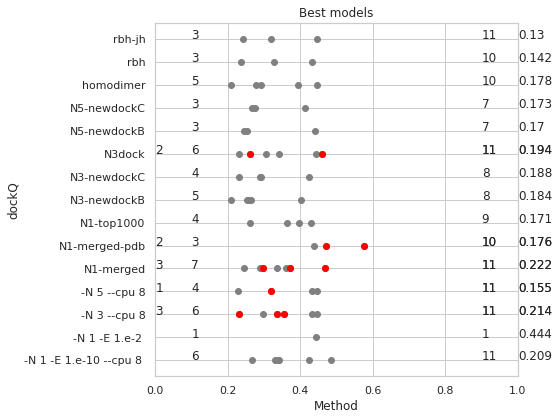

In [75]:
# FInd best method for each model.
codes=best_df["code"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
good_df=newdf.loc[(newdf.code.isin(codes))&(~newdf.JHparams.isin(excludecolumns))].reset_index()
plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_xlabel("Method")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
for d in datasets:
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
for i, txt in enumerate(best_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[best_df.JHparams[i]]==0:
        done[best_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[best_df.JHparams[i]],3)),(1.0, best_df.JHparams[i]))
        ax.annotate(str(length[best_df.JHparams[i]]),(.9, best_df.JHparams[i]))
for d in datasets:
    done[d]=0
for i, txt in enumerate(good_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(good_df.loc[good_df.JHparams==good_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[good_df.JHparams[i]]==0:
        done[good_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.1, good_df.JHparams[i]))
        ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))
        ax.annotate(str(length[good_df.JHparams[i]]),(.9, good_df.JHparams[i]))


In [76]:
df.sort_values('dockQ', ascending=False).drop_duplicates(["code"])

name       JHparams  lenA  lenB    msa msaA msaB  dockQ  \
15912  1qav_u1_A-1qav_u2_A         TMdock   113    88    0.0   0.   0.  1.000   
16062  1ycs_u1_A-1ycs_u2_A         TMdock   197   195    0.0   0.   0.  1.000   
16612  3bx1_u1_A-3bx1_u2_A         TMdock   270   182    0.0   0.   0.  1.000   
16082  1yvb_u1_A-1yvb_u2_A         TMdock   237   109    0.0   0.   0.  1.000   
15902  1pvh_u1_A-1pvh_u2_A         TMdock   209   160    0.0   0.   0.  1.000   
...                    ...            ...   ...   ...    ...  ...  ...    ...   
17343  4lsx_u1_A-4lsx_u2_A         TMdock   744   187    0.0   0.   0.  0.070   
5728   4yoc_u1_A-4yoc_u2_A       PDBDOCK4   905   530  333.0   0.   0.  0.054   
13093  4ol0_u1_A-4ol0_u2_A  TMdock-double   890   206    0.0   0.   0.  0.041   
2841   4rws_u1_A-4rws_u2_A          gramm   434    72    0.0   0.   0.  0.021   
2878   4v2c_u1_A-4v2c_u2_A          gramm   324   107    0.0   0.   0.  0.019   

        fnat    iRMS  ...  CODE         params     tmAB  msaAB  tmAB_max  \
15912  1.000   0.001  ...  1qav         TMdock  1.00000    NaN   1.00000   
16062  1.000   0.000  ...  1ycs         TMdock  1.00000    NaN   1.00000   
16612  1.000   0.006  ...  3bx1         TMdock  1.00000    NaN   1.00000   
16082  1.000   0.000  ...  1yvb         TMdock  1.00000    NaN   1.00000   
15902  1.000   0.000  ...  1pvh         TMdock  1.00000    NaN   1.00000   
...      ...     ...  ...   ...            ...      ...    ...       ...   
17343  0.156  19.070  ...  4lsx         TMdock  1.00000    NaN   1.00000   
5728   0.159  65.047  ...  4yoc       PDBDOCK4  0.25367    NaN   0.32173   
13093  0.000  12.041  ...  4ol0  TMdock-double  1.00000    NaN   1.00000   
2841   0.000  13.383  ...  4rws          gramm  1.00000    NaN   1.00000   
2878   0.000  14.698  ...  4v2c          gramm  1.00000    NaN   1.00000   

       msaAB_max  tmAB_min  msaAB_min  numcorrect   len  
15912         0.   1.00000         0.        0.96   201  
16062         0.   1.00000         0.        0.00   392  
16612         0.   1.00000         0.        0.00   452  
16082         0.   1.00000         0.        0.00   346  
15902         0.   1.00000         0.        0.00   369  
...          ...       ...        ...         ...   ...  
17343         0.   1.00000         0.       13.91   931  
5728          0.   0.18561         0.        0.00  1435  
13093         0.   1.00000         0.        0.00  1096  
2841          0.   1.00000         0.        0.00   506  
2878          0.   1.00000         0.        0.00   431  

[218 rows x 42 columns]

In [77]:
df.loc[(df.dockQ>cutoff) & (~df.JHparams.isin(excludecolumns))].groupby("name").max()


JHparams  lenA  lenB     msa   msaA   msaB  dockQ  \
name                                                                         
1ay7_u1_A-1ay7_u2_A        rbh-jh    97    90  1060.0   1485   2034  0.319   
1ay7_u2_A-1ay7_u1_A     homodimer    90    97  1060.0   2034   1485  0.260   
1b27_u1_A-1b27_u2_A     homodimer   109    90   733.0   1484   2034  0.230   
1b27_u2_A-1b27_u1_A     homodimer    90   109   733.0   2034   1484  0.231   
1gpw_u1_A-1gpw_u2_A        rbh-jh   252   204  7137.0  58466   7554  0.351   
1gpw_u2_A-1gpw_u1_A        rbh-jh   204   252  7137.0   7554  58466  0.354   
1v5i_u1_A-1v5i_u2_A  -N 3 --cpu 8   276    78  1922.0  54177  12066  0.336   
1vrs_u1_A-1vrs_u2_A    N1-top1000   124   117   836.0   1396   1245  0.472   
1vrs_u2_A-1vrs_u1_A    N1-top1000   117   124  2091.0   1245   1396  0.295   
2d5r_u2_A-2d5r_u1_A        N3dock   121   265   521.0   1771   6154  0.261   
2hqs_u1_A-2hqs_u2_A    N1-top1000   398   109  2396.0   9156   4788  0.575   
2hqs_u2_A-2hqs_u1_A    N1-top1000   109   398  2396.0   4788   9156  0.480   
2o3b_u1_A-2o3b_u2_A           rbh   240   144   100.0   1898     86  0.372   
2zae_u1_A-2zae_u2_A        rbh-jh   107    93  1125.0    183     78  0.433   
2zae_u2_A-2zae_u1_A        rbh-jh    93   107  1125.0     78    183  0.461   
4gmj_u1_A-4gmj_u2_A     homodimer   253   236  1189.0   6344   1653  0.469   
4gmj_u2_A-4gmj_u1_A     homodimer   236   253  1189.0   1653   6344  0.445   
4xhu_u1_A-4xhu_u2_A     N1-merged   352    95   211.0     0.     0.  0.244   
4xhu_u2_A-4xhu_u1_A     N1-merged    95   352   410.0     0.     0.  0.298   

                      fnat    iRMS    LRMS  ...  CODE        params      tmAB  \
name                                        ...                                 
1ay7_u1_A-1ay7_u2_A  0.306   4.002   9.104  ...  1ay7        rbh-jh  0.830380   
1ay7_u2_A-1ay7_u1_A  0.306   4.395  11.298  ...  1ay7     homodimer  0.817620   
1b27_u1_A-1b27_u2_A  0.160   4.793  10.176  ...  1b27     homodimer  0.825820   
1b27_u2_A-1b27_u1_A  0.160   5.319   9.542  ...  1b27     homodimer  0.810645   
1gpw_u1_A-1gpw_u2_A  0.320   4.776  11.778  ...  1gpw        rbh-jh  0.889680   
1gpw_u2_A-1gpw_u1_A  0.333   5.865   9.606  ...  1gpw        rbh-jh  0.894335   
1v5i_u1_A-1v5i_u2_A  0.191   3.748   5.851  ...  1v5i  -N 3 --cpu 8  0.818890   
1vrs_u1_A-1vrs_u2_A  0.449   2.953   9.785  ...  1vrs    N1-top1000  0.989810   
1vrs_u2_A-1vrs_u1_A  0.286   7.831  11.866  ...  1vrs    N1-top1000  0.897465   
2d5r_u2_A-2d5r_u1_A  0.203  10.074   7.537  ...  2d5r        N3dock  0.752890   
2hqs_u1_A-2hqs_u2_A  0.526   3.771  10.318  ...  2hqs    N1-top1000  0.969605   
2hqs_u2_A-2hqs_u1_A  0.368   2.806   7.435  ...  2hqs    N1-top1000  0.907610   
2o3b_u1_A-2o3b_u2_A  0.556   4.959   9.920  ...  2o3b           rbh  0.727490   
2zae_u1_A-2zae_u2_A  0.371   6.495   8.823  ...  2zae        rbh-jh  0.992575   
2zae_u2_A-2zae_u1_A  0.484   5.707   9.655  ...  2zae        rbh-jh  0.983450   
4gmj_u1_A-4gmj_u2_A  0.780   3.975  36.835  ...  4gmj     homodimer  0.836225   
4gmj_u2_A-4gmj_u1_A  0.780   4.201  14.643  ...  4gmj     homodimer  0.830570   
4xhu_u1_A-4xhu_u2_A  0.185   5.002   9.149  ...  4xhu     N1-merged  0.809280   
4xhu_u2_A-4xhu_u1_A  0.481   4.861  12.250  ...  4xhu     N1-merged  0.829155   

                     msaAB  tmAB_max  msaAB_max  tmAB_min  msaAB_min  \
name                                                                   
1ay7_u1_A-1ay7_u2_A    NaN   0.84625       2034   0.81981       1485   
1ay7_u2_A-1ay7_u1_A    NaN   0.84181       2034   0.79459       1485   
1b27_u1_A-1b27_u2_A    NaN   0.85658       2034   0.79542       1484   
1b27_u2_A-1b27_u1_A    NaN   0.83444       2034   0.78801       1484   
1gpw_u1_A-1gpw_u2_A    NaN   0.89229       7554   0.88822      58466   
1gpw_u2_A-1gpw_u1_A    NaN   0.89745       7554   0.89220      58466   
1v5i_u1_A-1v5i_u2_A    NaN   0.88557      54177   0.75221      12066   
1vrs_u1_A-1vrs_u2_A    NaN   0.99288

['gramm', 'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1', 'pdbnewcontacts', 'PDBNEWDOCK-A', 'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B', 'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1', 'PDBNEWDOCK-B--dockC2', 'PDBNEWDOCK-B--dockC-relax', 'PDBNEWDOCK-B--dockD1', 'PDBNEWDOCK-B--dockD2', 'PDBNEWDOCK-B--dockD-relax', 'PDBNEWDOCK-B--starting', 'PDBNEWDOCK-B--step1', 'PDBNEWDOCK-C', 'PDBNEWDOCK-C--dockB1', 'PDBNEWDOCK-C--dockB2', 'PDBNEWDOCK-C--dockB-relax', 'PDBNEWDOCK-C--dockC1', 'PDBNEWDOCK-C--dockC2', 'PDBNEWDOCK-C--dockC-relax', 'PDBNEWDOCK-C--dockD1', 'PDBNEWDOCK-C-

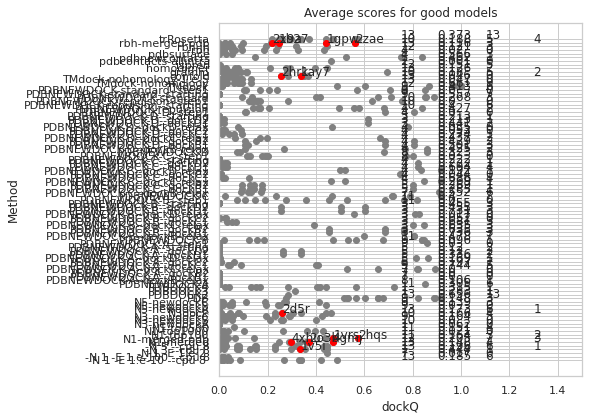

In [78]:
r = re.compile("^PDB.*|^TMd.*|^gramm|trRosetta|^pdb.*")
excludecolumns = list(filter(r.match, datasets)) # Read Note
print (excludecolumns)
includeTR=["pdbcontacts","PDBDOCK","TMdock-double"]
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best methods")

new_df=df.loc[(df.dockQ>cutoff) & (~df.JHparams.isin(excludecolumns))].sort_values('dockQ', ascending=False).drop_duplicates(["code"]).reset_index()
codes=new_df.CODE.unique()
#print(new_df)
#newdf.sort_values(["JHparams","dockQ","code"],inplace=True)

tempdf=df_max.loc[(df_max.CODE.isin(codes)) & (~df_max.params.isin(includeTR))].reset_index()
plt.scatter(tempdf.dockQ,tempdf.params,color="grey")
#print(tempdf[tempdf.params=="N1-top1000"])
plt.scatter(new_df.dockQ,new_df.params,color="red")
#print(new_df[new_df.params=="N1-top1000"])

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Average scores for good models")
ax.set_xlabel("dockQ")
ax.set_ylabel("Method")
ax.set(xlim=[0,1])
done={}
average={}
length={}
ax.set(xlim=[0,1.5])
for d in datasets: #~df.JHparams.isin(excludecolumns).unique():
    done[d]=0
    average[d]=df_max.loc[(df_max.CODE.isin(codes)) & (df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[(df_max.CODE.isin(codes)) & (df_max.params==d)]["dockQ"])
for i, txt in enumerate(tempdf.name):
    #print (i,txt, newdf.JHparams[i])
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(tempdf.loc[(tempdf.params==tempdf.params[i])&(tempdf.dockQ>cutoff)])
    
    #print (numhit,newdf.JHparams[i])
    if done[tempdf.params[i]]==0:
        done[tempdf.params[i]]=1
        ax.annotate(str(numhit),(1.1, tempdf.params[i]))
        #ax.annotate("0",(.1, tempdf.JHparams[i]))  
        ax.annotate(str(round(average[tempdf.params[i]],3)),(.9, tempdf.params[i]))          
        ax.annotate(str(round(length[tempdf.params[i]],3)),(.75, tempdf.params[i]))  
for d in datasets: #~df.JHparams.isin(excludecolumns).unique():
    done[d]=0
for i, txt in enumerate(new_df.name):
    #print (i,txt,newdf.dockQ[i], newdf.JHparams[i])
    sstr=txt[0:4]
    ax.annotate(sstr, (new_df.dockQ[i], new_df.params[i]))
    numhit=len(new_df.loc[new_df.params==new_df.params[i]])
    #numhit2=len(tempdf.loc[tempdf.JHparams==tempdf.params[i]])
    #print (numhit,newdf.JHparams[i])
    if done[new_df.params[i]]==0:
        done[new_df.params[i]]=1
        ax.annotate(str(numhit),(1.3, new_df.params[i]))  
        #ax.annotate(str(numhit2),(-0.1, new_df.JHparams[i]))


In [106]:
cutoff=0.1

In [107]:
JHsets=['-N 3 --cpu 8', 
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500',  '-N 5 --cpu 8']

cutoff=0.1

In [108]:
goodmodels=df_max.loc[(df_max.dockQ>cutoff)&(df_max.params.isin(JHsets)) ]["CODE"].unique()

/home/arnee/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/arnee/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


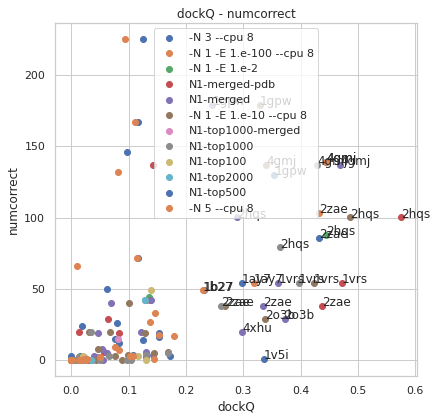

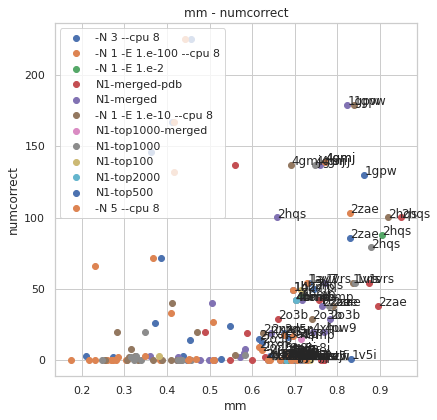

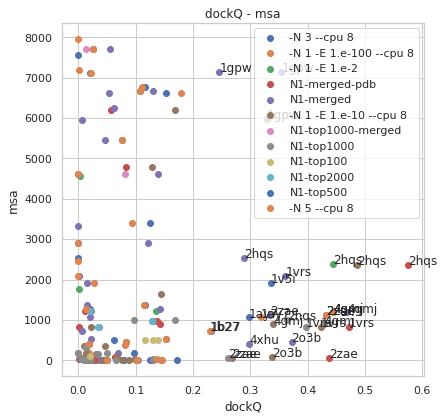

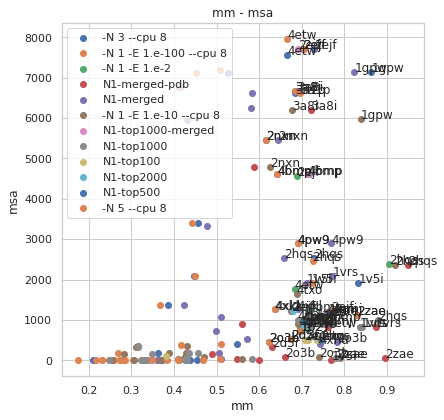

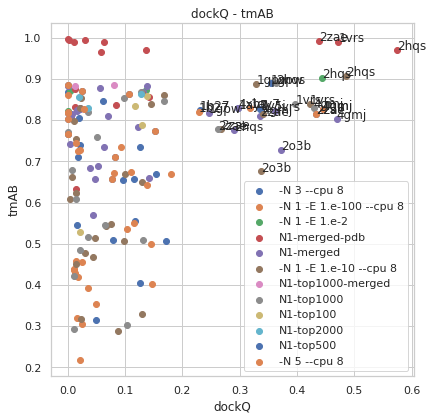

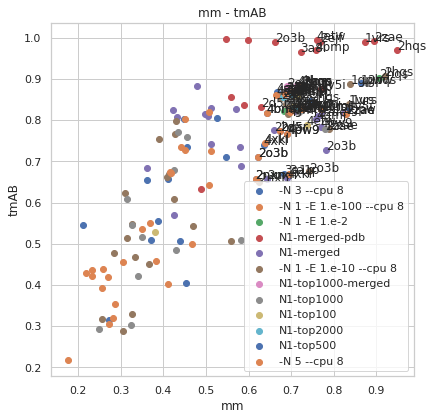

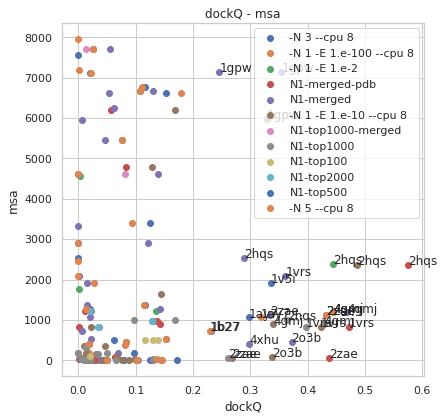

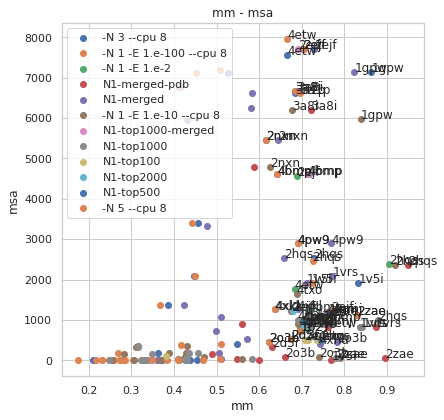

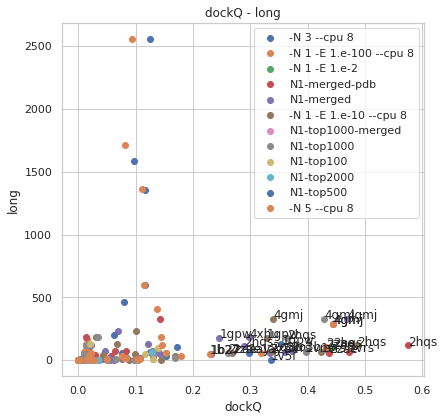

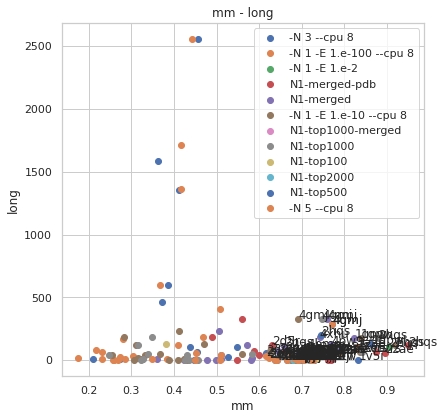

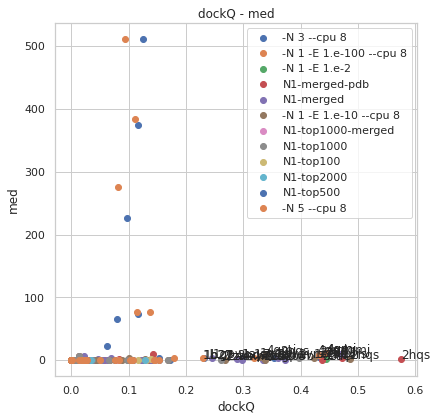

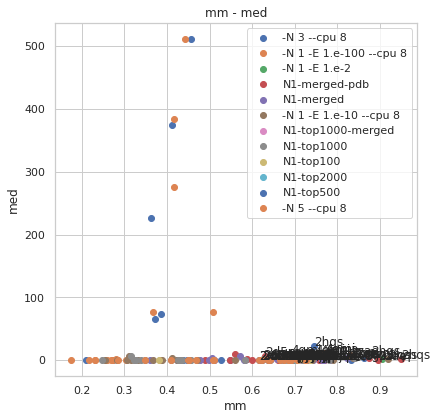

In [109]:
tempdf=df_max.loc[df_max.params.isin(JHsets)] 


tempdf=tempdf.loc[tempdf.CODE.isin(goodmodels)]
cf={"dockQ":0.2,"mm":0.6,"numcorrect":50}
for y in ["numcorrect","msa","tmAB","msa","long","med"]:
    for x in ["dockQ","mm","numcorrect"]:
        cutoff=cf[x]
        #print (Name)
         #if (Name != "lenA"):
        #    continue
        f, ax = plt.subplots(figsize=(6.5, 6.5))
        for d in JHsets:
            xdata=tempdf.loc[tempdf.params==d][x]
            ydata=tempdf.loc[tempdf.params==d][y]
            plt.scatter(xdata,ydata,label=d)
            cc=np.corrcoef(xdata,ydata)
            for i, txt in enumerate(tempdf.loc[tempdf.params==d].name):
                sstr=txt[0:4]
                if (xdata[i]>cutoff):
                    ax.annotate(sstr, (xdata[i], ydata[i]))
        ax.set_title(x + " - " + y )
        ax.set_xlabel(x)
        ax.set_ylabel(y)
        ax.legend()
    plt.close()

In [110]:
goodmodels

array(['1gpw', '1vrs', '2hqs', '2nxn', '2o3b', '2zae', '3a8i', '3fpu',
       '4bmp', '4c6t', '4gmj', '4txo', '1ay7', '1b27', '1gcq', '1v5i',
       '2d5r', '2wbw', '2x9a', '3a1p', '3f1p', '4xs0', '3pv6', '5cra',
       '4pw9', '4xhu', '4xkl', '2ejf', '4etw'], dtype=object)

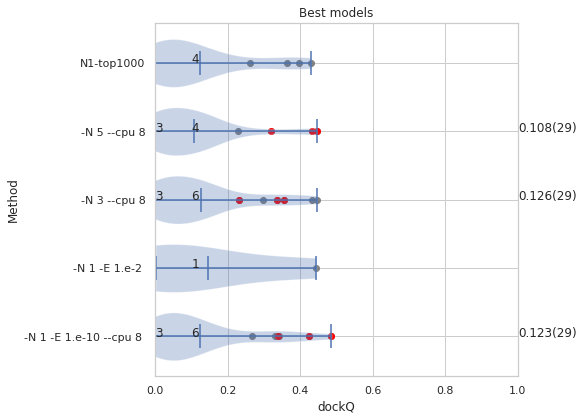

In [111]:
pdbset=['-N 3 --cpu 8',
 '-N 1 -E 1.e-2 ',
 '-N 1 -E 1.e-10 --cpu 8 ',
 'N1-top1000',
 '-N 5 --cpu 8']
codes=goodmodels
# FInd best method for each model.
#codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    #print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(best_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[best_df.JHparams[i]]==0:
        done[best_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[best_df.JHparams[i]],3))+"("+str(length[good_df.JHparams[i]])+")"
                    ,(1.0, best_df.JHparams[i]))
for d in datasets:
    done[d]=0
for i, txt in enumerate(good_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(good_df.loc[good_df.JHparams==good_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[good_df.JHparams[i]]==0:
        done[good_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.1, good_df.JHparams[i]))
        #ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))
        #ax.annotate("("+str(length[good_df.JHparams[i]])+")",(1.2, good_df.JHparams[i]))


No handles with labels found to put in legend.


Text(0, 0.5, 'dockQ')

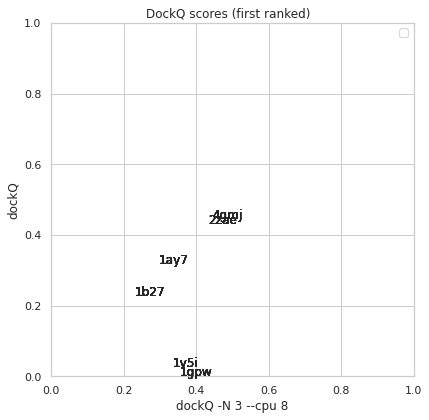

In [112]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in JHsets:
  
    #if d!="N1-merged":continue   
    #print (d)
    #df_merged = pd.merge(data_first[datasets[0]],data_first[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    #plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
#x=[0,0.3]
#y=[0,0.3]
#plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (first ranked)  ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [88]:
import sklearn
from sklearn.linear_model import LinearRegression

In [89]:
goodmodels

array(['1gpw', '1vrs', '2hqs', '2o3b', '2zae', '4gmj', '1ay7', '1b27',
       '1v5i', '4xhu'], dtype=object)

In [90]:
reg = LinearRegression()


In [91]:
ydata=df.dockQ

In [92]:
xdata=df[["lenA","lenB","msa","long","med","longA","medA","longB","medB"]]


In [93]:
reg.fit(xdata,ydata)

LinearRegression()

In [94]:

print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)


Intercept: 
 0.1365825085124826
Coefficients: 
 [-4.46638438e-04  1.32510189e-05  1.34534297e-05  6.81687179e-05
 -2.64689660e-04  3.14751140e-05 -1.51073094e-05 -2.48202139e-05
 -9.55751247e-05]


Text(0, 0.5, 'predicted dockQ')

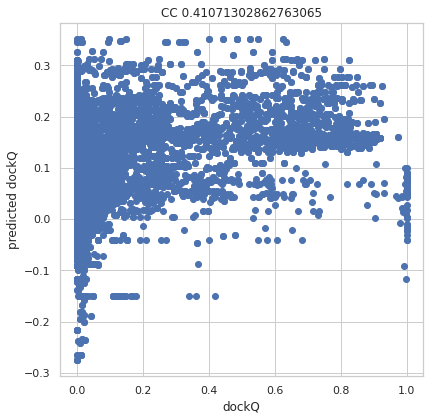

In [95]:
ypred = reg.predict(xdata)
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(ydata,ypred)
cc=np.corrcoef(ydata,ypred)
ax.set_title("CC" + " " + str(cc[0,1]))
ax.set_xlabel("dockQ")
ax.set_ylabel("predicted dockQ")
